# Homework 05 -Sentiment analysis airline  tweets opinions 

## Nicolás Echeverri Rojas

1). Take the airline opinion dataset (airline_tweets.csv) that was the subject of the Class 12

2). Divide the dataset into Train/Test: 80/20 percent fix the randomness!

3). Compare the different Methods:

a) TextBlob
   Microsoft Azure!!!

b) Train your own model with Sklearn algorithm, compare on the same subset!
try different algorithms (https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html , play with parameters they offer)

c) try to train your model on completely new datasets LABELED (https://www.kaggle.com/datasets?search=sentiment&sort=votes&tags=13302-Classification&page=3)

d) maybe improve your cleaning algorithm



https://github.com/mhemmg/Learning-Data-Mining-with-Python/blob/master/EXTRAS/classes/class_14/Homework_05.ipynb


## The homework is in class 14

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
pd.set_option('display.max_columns', None)


import matplotlib
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
#matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]
colors=["#ff0534","#c501e2","#1eff05","#2ef8a0","#c6e602","01c4e7", "#f82d97"]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=colors) 

## 1. Loading data

In [2]:
tweets = pd.read_csv("airline_tweets.csv")
tweets.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [3]:
tweets['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Las muestras están desbalanceadas, de tal manera que se debe de tener cuidado en las métricas a usar

## 2. EDA

In [5]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Columnas útiles:

- airline_sentiment: clasificación del tweet, sin nulos

- airline_sentiment_confidence: ,sin nulos

- negativereason: razón de la calificación si es negativa

- negativereason_confidence

- retweet_count: cantidad de retweets del tweet

- airline: nombre de la aerolinea,sin nulos

- text: texto del tweet

- tweet_created: hora en que se creo el tweet



In [6]:
tweets.groupby(by=['airline'])['tweet_id'].count()

airline
American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: tweet_id, dtype: int64

In [7]:
airline_by_sentiment = tweets.groupby(by=['airline', 'airline_sentiment'])[['tweet_id']].count().unstack()

In [8]:
airline_by_sentiment.columns = airline_by_sentiment.columns.droplevel()

In [9]:
airline_by_sentiment

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

In [10]:
airline_by_sentiment['total'] = airline_by_sentiment.sum(axis=1)

In [11]:
airline_by_sentiment['negative rate'] = airline_by_sentiment['negative']/airline_by_sentiment['total'] 

airline_by_sentiment['neutral rate'] = airline_by_sentiment['neutral']/airline_by_sentiment['total'] 

airline_by_sentiment['positive rate'] = airline_by_sentiment['positive']/airline_by_sentiment['total'] 


<AxesSubplot:title={'center':'Number of tweets by sentiment'}, xlabel='airline'>

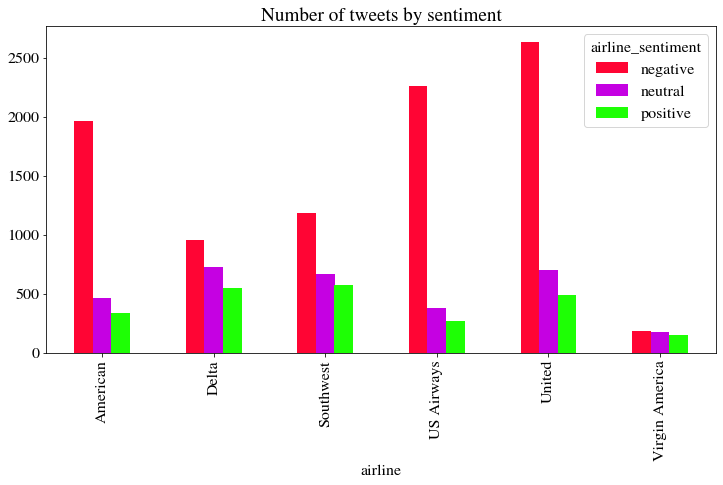

In [12]:
airline_by_sentiment[['negative','neutral','positive']].plot(kind= 'bar', figsize=(12,6),
                                                             title = 'Number of tweets by sentiment')

<AxesSubplot:title={'center':'Number rate of tweets by sentiment'}, xlabel='airline'>

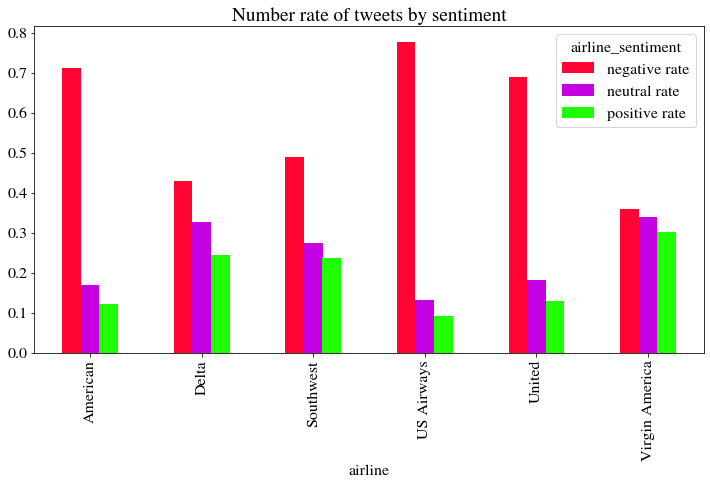

In [13]:
airline_by_sentiment[['negative rate','neutral rate','positive rate']].plot(kind= 'bar', figsize=(12,6),
                                                                            title = 'Number rate of tweets by sentiment')

Se observa que la mayor tasa de tweets negativos se da en la aerolinea US airways mientras que la menor tasa se da en Virgin America

In [14]:
tweets['name'].value_counts().head(5)

JetBlueNews    63
kbosspotter    32
_mhertz        29
otisday        28
throthra       27
Name: name, dtype: int64

In [15]:
tweets.query("name == 'JetBlueNews' ")['airline_sentiment'].value_counts()

neutral     57
positive     5
negative     1
Name: airline_sentiment, dtype: int64

In [16]:
tweets.query("name == 'kbosspotter' ")['airline_sentiment'].value_counts()

neutral     22
positive     6
negative     4
Name: airline_sentiment, dtype: int64

In [17]:
name = '_mhertz'
tweets.query("name == @name ")['airline_sentiment'].value_counts()

negative    27
neutral      2
Name: airline_sentiment, dtype: int64

La persona que más tweets realiza negativamente es _mhertz

In [18]:
for idx in range(20):
    print(tweets['text'][idx])

@VirginAmerica What @dhepburn said.
@VirginAmerica plus you've added commercials to the experience... tacky.
@VirginAmerica I didn't today... Must mean I need to take another trip!
@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
@VirginAmerica and it's a really big bad thing about it
@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
@VirginAmerica Really missed a prime opportunity for Men Without Hats parody, there. https://t.co/mWpG7grEZP
@virginamerica Well, I didn't…but NOW I DO! :-D
@VirginAmerica it was amazing, and arrived an hour early. You're too good to me.
@VirginAmerica did you know that suicide is the second leading cause of death among teens 10-24
@VirginAmerica I &lt;3 pretty graphics. so much better than minimal iconography. :D
@V

## 3. Limpieza de tweets


In [4]:
import spacy
nlp = spacy.load('en_core_web_sm')
#es_core_news_sm: spanish core

## 3.1 Limpieza preliminar

In [5]:
def first_cleaning(example_tweet):
    
    #convertiendo a minúsculas
    example_tweet = example_tweet.lower()
    
    #eliminando correos
    pattern  = re.compile(r'@\w+')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )    

    #eliminando palabras de hashtacks
    pattern  = re.compile(r'#\w+')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )    
    
    
    #cambiando n't por not
    pattern  = re.compile(r"(n\'t)")
    example_tweet = re.sub(pattern = pattern, repl= ' not',string = example_tweet )
    
    #cambiando 've por have
    pattern  = re.compile(r"(\'ve)")
    example_tweet = re.sub(pattern = pattern, repl= ' have',string = example_tweet )

    
    #eliminando caracteres especiales
    pattern = re.compile(r'[^A-Za-z0-9]+')
    example_tweet  = re.sub(pattern = pattern, repl= ' ',string = example_tweet )

    
    #eliminando sitios web 
    pattern  = re.compile(r'(htt).+')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )
    pattern  = re.compile(r'(www).+')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )
    
    #eliminando números
    pattern  = re.compile(r'\w*\d\w*')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )
    pattern  = re.compile(r'\d+')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )

    #eliminando elementos con solo una letra
    '''
    It's a word boundary, a single letter, a space, and a word boundary.
    It's doubled up so it can match a single character
    at the start or end of the string z_ and _z leaving no space,
    and a character in the middle _z_ leaving one space.
    
    '''
    pattern  = re.compile('(\\b[A-Za-z] \\b|\\b [A-Za-z]\\b)')
    example_tweet = re.sub(pattern = pattern, repl= '',string = example_tweet )
    
    #eliminando más de un espacio
    pattern  = re.compile(r'\s+')
    example_tweet = re.sub(pattern = pattern, repl= ' ',string = example_tweet )
    
    
    return example_tweet.strip() #strip: para eliminar los espacios al inicio y al final

In [6]:
cleaning_tweets = tweets['text'].apply(first_cleaning)
tweets['cleaning_tweets'] = cleaning_tweets

### Observando los tweets y los tweets luego de la limpieza

In [7]:
for i in range(len(cleaning_tweets)):
    print(tweets.iloc[i]['text'])
    print(tweets.iloc[i]['cleaning_tweets'])
    print('\n')

@VirginAmerica What @dhepburn said.
what said


@VirginAmerica plus you've added commercials to the experience... tacky.
plus you have added commercials to the experience tacky


@VirginAmerica I didn't today... Must mean I need to take another trip!
did not today must mean need to take another trip


@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse


@VirginAmerica and it's a really big bad thing about it
and it really big bad thing about it


@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thing about flying VA
seriously would pay flight for seats that did not have this playing it really the only bad thing about flying va


@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)
yes nearly every time fly vx this ear

@VirginAmerica I need to register a service dog for a first class ticket from SFO &gt; Dulles. The phone queue is an hour or longer. Pls advise
need to register service dog for first class ticket from sfo gt dulles the phone queue is an hour or longer pls advise


@virginamerica you ROCK for making it so I can watch #Oscars on my flight!! #redcarpet #oscars #oscars2015
you rock for making it so can watch on my flight


@VirginAmerica, @reallytallchris dropped a track on you... https://t.co/zv2pt6TRK9
dropped track on you


@VirginAmerica always!!! Xoxo
always xoxo


@VirginAmerica why can't we book seats on your flights when we buy them or even during check in? Creates so much anxiety! #frustrated
why ca not we book seats on your flights when we buy them or even during check in creates so much anxiety


@VirginAmerica You'd think paying an extra $100 bucks RT for luggage might afford you hiring an extra hand at @sfo #lame
you think paying an extra bucks rt for luggage might afford you 

@VirginAmerica Results Handily Exceed Forecasts - @NYTimes http://t.co/gonmRwEM6I
results handily exceed forecasts


@VirginAmerica I applied for a position in @flyLAXairport ,and I was wondering if you guys received my application.
applied for position in and was wondering if you guys received my application


@VirginAmerica achieves a second year of profitability despite revenue pressure ... - @CAPA_Aviation http://t.co/zSuZTNAIJq
achieves second year of profitability despite revenue pressure


@VirginAmerica gives positive outlook, but sees increased competition - @Reuters http://t.co/jEu7Od3eYJ
gives positive outlook but sees increased competition


@VirginAmerica I'm trying to check into my 10:50AM CT flight tmm on the desktop website and it's not working (some sort of caching bug) SOS
trying to check into my ct flight tmm on the desktop website and it not working some sort of caching bug sos


@VirginAmerica weather delays &gt; next few weeks ;) #JFK #BOS #DCA
weather delays gt n

can we make every vx plane with why should austin be the only one getting nerd love


@VirginAmerica please add more frequency to PDX Portland
please add more frequency to pdx portland


@VirginAmerica Congrats VX on the new route! ✈️🎉
congrats vx on the new route


@VirginAmerica I tried that. You offered to charge me an additional $1k for a new ticket or be stranded until Thurs. 1st time, last time.
tried that you offered to charge me an additional for new ticket or be stranded until thurs time last time


@VirginAmerica @AmericanAir can u help with flights to get a 2y old battling cancer who needs treatment in 🇺🇸 @FreyaBevan_Fund 💗 🎀 💗
can help with flights to get old battling cancer who needs treatment in


@VirginAmerica Never had a bad experience before, but this one took the cake. Now extortion for carry on items as well?
never had bad experience before but this one took the cake now extortion for carry on items as well


@VirginAmerica Had to spend 5 hours worrying that items i

@united thx for update
thx for update


@united thank you !
thank you


@united dm these nuts
dm these nuts


@united Had to explain to a very over eager flight attendant trying to ask about my vision that my @ccicanine was not a guide dog!
had to explain to very over eager flight attendant trying to ask about my vision that my was not guide dog


@united what's the point of asking for details about a #servicedog when you book if your flight crew doesn't read them? (Continued)
what the point of asking for details about when you book if your flight crew does not read them continued


@united I tried but no one was available in bogota and everyone was rude in Houston. I was stuck for 35 hours because of you guys
tried but no one was available in bogota and everyone was rude in houston was stuck for hours because of you guys


@united #worst2unitedflightsever UA 236 LAS to IAD 2/24 mechanical problems again - took off - had to land for fix - delayed again #wtfodds!
ua las to iad mechanica


@united yes, but still now answers. Many have not had their luggage for 3 days! Unacceptable!!
yes but still now answers many have not had their luggage for days unacceptable


@united what is that going to do for you? Nothing just like you always do
what is that going to do for you nothing just like you always do


@united I sent in my feedback.  Thank you.
sent in my feedback thank you


@united plus what about food? And taxis?
plus what about food and taxis


@united you are offering us 8 rooms for 32 people #FAIL
you are offering us rooms for people


@united 32 people getting pretty tired about no action on solving the problem plus missing a day of vacation and skiing
people getting pretty tired about no action on solving the problem plus missing day of vacation and skiing


@united The bright side would be keeping the promise that was made to me. Hope you're having a good night. Thanks.
the bright side would be keeping the promise that was made to me hope you re having good nigh



@united Greetings. UA Club member here. Any idea if I can use the Air Canada Lounge at YVR. Flying UA tomorrow.
greetings ua club member here any idea if can use the air canada lounge at yvr flying ua tomorrow


@united how is Mexico not international from the us?
how is mexico not international from the us


@united diverted and missed our connecting flight. Was just told that my bag is on it's way to MSY. If you only had people that cared
diverted and missed our connecting flight was just told that my bag is on it way to msy if you only had people that cared


@united Male agnt in LAS threatens Canadian cust when cust takes pic of him at gate after agents announce can't help rebook. #friendlyskies?
male agnt in las threatens canadian cust when cust takes pic of him at gate after agents announce ca not help rebook


@united @Apollochplayers we just want to go home tonight - why did you Cancelled Flight the last leg of our reserv. w/out our permission??! #PH6RPS
we just want to go ho

nice your app says us delayed by weather pilot says waiting on fuel one in ur control one not


@united Please than Robin at EWR Premiere Desk for helping me get on a an earlier flight. She did the work.  Huge thanks.
please than robin at ewr premiere desk for helping me get on an earlier flight she did the work huge thanks


@united Ok thank you, do you provide complimentary hotel accommodations since I'll have to stay overnight?
ok thank you do you provide complimentary hotel accommodations since ll have to stay overnight


@united I was originally trying to share details but the link Jimmy Samartzis Vice President - Customer Experience sent me expired.
was originally trying to share details but the link jimmy samartzis vice president customer experience sent me expired


@united really? 3 hr delay, 4 gate changes, &amp; you boarded us, sent us back up, &amp; boarded us again.  Won't change our flight. Can we go now?
really hr delay gate changes amp you boarded us sent us back up amp

jh thanks so much for reaching out was able to get assistance after waiting for minutes


@united 3866 is at a stand still! No pilot or paperwork for fix over 25mins! Problem was fixed 30mins ago. Flight is as is delayed!
is at stand still no pilot or paperwork for fix over problem was fixed ago flight is as is delayed


@united please see dm!!
please see dm


@united. Is it reasonable to wait 45 mins for the bag you made me check because the flight staff couldn't police the overhead bins?
is it reasonable to wait mins for the bag you made me check because the flight staff could not police the overhead bins


@united Please msg me a # for customer service. I will have an invoice for my dry cleaning but won't be able take wet clothes to the airport
please msg me for customer service will have an invoice for my dry cleaning but wo not be able take wet clothes to the airport


@united AN HOUR DELAY BECAUSE YOU CAN'T PRINT A PIECE OF PAPER!
an hour delay because you ca not print piece of p

@united I attempted to book a ticket 3 times and kept getting a 'error' message. I hope you didn't still charge me.
attempted to book ticket times and kept getting error message hope you did not still charge me


@united … But friendly efficient air attendants in coach #UA992 http://t.co/49pV3KcHNR
but friendly efficient air attendants in coach


@united Coach interior on UA 992 looked like it was salvaged from the 80s. Tiny unusable video, no power &amp; lifevests on the floor #UA992 …
coach interior on ua looked like it was salvaged from the tiny unusable video no power amp lifevests on the floor


@united Now about two dozen back in line to see a single CSR for reFlight Booking Problems final leg. (Kiosks on fritz.)
now about two dozen back in line to see single csr for reflight booking problems final leg kiosks on fritz


@united on plane to Newark now. I was checked in as Rebecca Levi. My bag is under her name too.
on plane to newark now was checked in as rebecca levi my bag is un

on tonight and told delayed due to late flight crew no idea where crew coming from your staff unhelpful any ideas


@united, take a look at status of 683, sitting at ORD ... This ain't cool, yo.
take look at status of sitting at ord this ai not cool yo


@united bummer but thank you for the quick response
bummer but thank you for the quick response


@united I didn't have time to take my wet clothes/suit back to the airport and wasn't going to pay for another cab to do so.
did not have time to take my wet clothes suit back to the airport and was not going to pay for another cab to do so


@united didn't realize my bag/ contents were wet until I got to my hotel. Sent my suit/shirts out to be dry cleaned. Mtgs start tomorrow.
did not realize my bag contents were wet until got to my hotel sent my suit shirts out to be dry cleaned mtgs start tomorrow


@united You load our plane at ORD knowing pilots are 2 hrs Late Flight, then discover plane needs to be fueled? #WTF #united #incompetent
y

have you read your own same day travel change policy


@united your b737-800w  literally the smallest seats I have ever have, my dad got stuck In the tiny bathroom ad well #disspointed #premier1k
your literally the smallest seats have ever have my dad got stuck in the tiny bathroom ad well


@united AND WE GOT ZERO VOUCHERS FOR HOTEL OR CAB. I expect some SERIOUS mileage credits.
and we got zero vouchers for hotel or cab expect some serious mileage credits


@united nope all set. Thx for checking.
nope all set thx for checking


@united +the plane.
the plane


@united my flight was already Cancelled Flightled this morning because of a "snow storm in Denver". And now I'm in DC waiting for a pilot to get on+
my flight was already cancelled flightled this morning because of snow storm in denver and now in dc waiting for pilot to get on


@united still sucks. I don't understand why you have two cust service agents for a long line at Houston international b gate #unitedsucks
still sucks do 

@united will do. Just need to get CVG.... and my bag too. Thanks
will do just need to get cvg and my bag too thanks


@united read the thread. I booked 1st class , now seated at 38E even though United Twtr account confirmed Eco Premium.
read the thread booked class now seated at even though united twtr account confirmed eco premium


@united Hi there bag ID is UA6016053916 can you update me and explain why is occurred when I arrived 4 hours before flight!
hi there bag id is can you update me and explain why is occurred when arrived hours before flight


@united doesn't purchasing ticket with a united card give me priority boarding ?
does not purchasing ticket with united card give me priority boarding


@united hi yes need a free hotel stay in Honalulu due to 4 hour delayUA53, since we will miss our second flight to Kauai
hi yes need free hotel stay in honalulu due to hour since we will miss our second flight to kauai


@united so what's the solution?
so what the solution


@united is 

flight no luck on


@united Do you have plans for an iPad app?  The iPhone app is great, but on the  iPad you have to flip the iPad.  Is there a beta? Tks.
do you have plans for an ipad app the iphone app is great but on the ipad you have to flip the ipad is there beta tks


@united I tried.   We were hung up on, twice. After speaking with someone, then put on hold for 45 minutes.  No resolution.
tried we were hung up on twice after speaking with someone then put on hold for minutes no resolution


@united I'm not sure it will have "next time"...
not sure it will have next time


@united now the weight restriction? 'We'll try to get as many of you as we can on this plane'
now the weight restriction we ll try to get as many of you as we can on this plane


@united Thank you but the person in Houston could only get me a flight routing through Newark, NJ and I'm going to SFO
thank you but the person in houston could only get me flight routing through newark nj and going to sfo


@united y

@united please get me off this plane #UA57
please get me off this plane


@united yes. On a nonstop to Memphis tomorrow morning. With the snow coming in I got my fingers crossed it will go.
yes on nonstop to memphis tomorrow morning with the snow coming in got my fingers crossed it will go


@united traveling with 3 young kids!! Chose our original flights for a reason.
traveling with young kids chose our original flights for reason


@united have since dropped to 2 layovers but still not acceptable.
have since dropped to layovers but still not acceptable


@united our 1 layover itinerary was swapped for a 3 layover itinerary - really?!?
our layover itinerary was swapped for layover itinerary really


@united your app says flight UA936 to #ZRH departed 2:45hrs Late Flight, but 5 hours Late Flightr we are still seating inside the plane in #IAD.  #failed
your app says flight to departed late flight but hours late flightr we are still seating inside the plane in


@united not completely.  

instead had to wait on plane from ottawa that never came now back home and have to try again tomorrow suitcase still lost


@united i'm glad u can solve the prob. But my experience remains - will not fly again on #United
glad can solve the prob but my experience remains will not fly again on


@united u Cancelled Flighted my flight from IAD to JAX. Was supposed to use plane from BNA but u used that plane for another destination instead. 1/2
cancelled flighted my flight from iad to jax was supposed to use plane from bna but used that plane for another destination instead


@United appreciate the early arrival of UA1002, but any chance ORD will ever bring the bags out?
appreciate the early arrival of but any chance ord will ever bring the bags out


@united - it is possible to make a ticket change via Twitter? Traveling internationally and can't make calls... Thanks in advance!
it is possible to make ticket change via twitter traveling internationally and ca not make calls thanks in adva



@united how much does a ski bag cost to check?  Bag contains 1 pair is skis and one pair of poles
how much does ski bag cost to check bag contains pair is skis and one pair of poles


@united Wasn't frustrating! Well, not in any way reLate Flightd to y'all, anyway. Impressed that I made it.
was not frustrating well not in any way relate flightd to all anyway impressed that made it


@united  no thanks
no thanks


@united I got it now. Wouldn't let me log on with my email. Thx. Here's hoping for dtw-ase without issue today
got it now would not let me log on with my email thx here hoping for dtw ase without issue today


@united oh, the Wi-Fi router is on top of the fuselage! ;)
oh the wi fi router is on top of the fuselage


@united on SFO-&gt;AUS UA343 2/17, IS9JX1; my seat appears to have had a mite problem. Dr recently confirmed over 50 bug bites were mites
on sfo gt aus my seat appears to have had mite problem dr recently confirmed over bug bites were mites


@United come on, reop

@united THAT'S the tweet u choose to answer, to tell me you're not liable?! #youretheworst #neveragain
that the tweet choose to answer to tell me you re not liable


@united y not? You're the reason we're in Houston and not NYC tonight. It took the plane an hour to take off - no explanations or sorry.
not you re the reason we re in houston and not nyc tonight it took the plane an hour to take off no explanations or sorry


@united awesome thank you very much for the help
awesome thank you very much for the help


@united you need to follow me so I can dm you to give you the info
you need to follow me so can dm you to give you the info


@united @airlines. Agents arguing about check bag announcement. Looked for room until seat 20, gave up and walked back to seat 7.Unnecessary
agents arguing about check bag announcement looked for room until seat gave up and walked back to seat unnecessary


@united yea I saw that I'm moving to China and have 5-6 bags will pay whatever but wanted to make

@united as a million mile flier I'm embarrassed to ask how long ago his launched?
as million mile flier embarrassed to ask how long ago his launched


@united Can't beat the storm out of town if you wait to issue the policy until too Late Flight.  NWS issued storm warning already...
ca not beat the storm out of town if you wait to issue the policy until too late flight nws issued storm warning already


@United @Skywest do it again!   I will now miss one or probably both our Aspen events. #Fail
do it again will now miss one or probably both our aspen events


@united don't need your apologies, need my bag. Took 56 minutes from landing to get it. Unacceptable.
do not need your apologies need my bag took minutes from landing to get it unacceptable


@united add wifi, entertainment and the old seats and i’ll come back.
add wifi entertainment and the old seats and ll come back


@united so we fly into SFO and Honululu gets pushed back 3.5 hours and now it looks like more delays.  I beg of 

love being told you would issue refund when you could not get us out of the way of hurricane to have it denied


@united Without baggage for 5 days and can't get an update from Houston airport since Monday. Worst service ever!
without baggage for days and ca not get an update from houston airport since monday worst service ever


@united yes to three different checkers along the walk to the plane. Overkill
yes to three different checkers along the walk to the plane overkill


@united Bummer. Might have to go with @AmericanAir card instead. TY for response though.
bummer might have to go with card instead ty for response though


“@united: @LRuns4Cupcakes Please DM details, we'd like to help if you need assistance. ^KP” @ClarkHoward #Another #Airlines #Issues
please dm details we like to help if you need assistance kp


@united or I'm sure her business will go else where for airline travel. Her name is Kathryn Sotelo
or sure her business will go else where for airline travel her name is

maybe on my return trip


@united your staff at LaGuardia and Lagos, Nigeria were unprofessional, uncaring and not helpful. Ou
your staff at laguardia and lagos nigeria were unprofessional uncaring and not helpful ou


@united i got it at the gate, thanks for checking!
got it at the gate thanks for checking


@united U kept passengers waiting all night 4 a plane that was being put out of service.  Leaving everyone stranded for night. #inexcusable
kept passengers waiting all night plane that was being put out of service leaving everyone stranded for night


@united I especially like how you upgraded three of your crew members to first class instead of passengers. #keepitclassy #customerservice
especially like how you upgraded three of your crew members to first class instead of passengers


@united hello. I got off a flight a few months ago and constantly think about your peanuts. Is there anyway you could send me some?
hello got off flight few months ago and constantly think about your

@united how can you never got a flight from austin to Houston in time for a connection ever? Ever!
how can you never got flight from austin to houston in time for connection ever ever


@united got it right with the safety demonstration! Corporate but funny, reserved but NOT CORNY  as a… http://t.co/lwOtKIEKGU
got it right with the safety demonstration corporate but funny reserved but not corny as


@united now sitting on the tarmac for a half hour after landing because your jetway is broken. #2daysofunitedfailures #1thingafteranother
now sitting on the tarmac for half hour after landing because your jetway is broken


@united look at the Twitter history - as usual service non existent
look at the twitter history as usual service non existent


@united thanks for the reply. I have been in contact with Customer Care to get clarification on this issue.
thanks for the reply have been in contact with customer care to get clarification on this issue


@united I will give it a couple more we

yes from on instagram


@united @perfectomobile You really shouldn't use the word 'crashing.' Just sayin'.
you really should not use the word crashing just sayin


@united airlines delayed our flight on the way to Chicago and leaving Chicago. Next time @Delta it is.
airlines delayed our flight on the way to chicago and leaving chicago next time it is


@united They inquire and then do nothing about it...pretend they’re interested. Responded to your DM and no response back...
they inquire and then do nothing about it pretend they re interested responded to your dm and no response back


@united need assistance to change flight to get to an ailing parent..
have flight leaving Tuesday need to change ASAP to sooner #custserv
need assistance to change flight to get to an ailing parent have flight leaving tuesday need to change asap to sooner


@united I must stop my relationship with you. You've become greedy and heartless and our long term relationship is over
must stop my relationship wit



@united UA5029 from RIC, UA507 from ORD, &amp; UA423 from DEN -ALL DELAYED for non-weather issues. Way to go, youre batting 1.000! But no hotels
from ric from ord amp from den all delayed for non weather issues way to go youre batting but no hotels


@united I would have made it if you hadn't already booked me on another flight and Cancelled Flighted my original reservation.
would have made it if you had not already booked me on another flight and cancelled flighted my original reservation


@united @staralliance how can I book reward travel in August?? Everything is blacked out.
how can book reward travel in august everything is blacked out


@united did I win :)
did win


@united Trying to change a flight booked just 6 hours ago but online system is charging me $200 fee per passenger... could you please help?
trying to change flight booked just hours ago but online system is charging me fee per passenger could you please help


@united I have submitted my complaint. I need to be co

meals can be more creative than noodles peas and zukes non vegan yogurt is not acceptable for vegan can you do better


@united well, thanks for not charging me for switching my two Cancelled Flightled flights anyway. That was pretty nice. #stillmakingmepoorthough
well thanks for not charging me for switching my two cancelled flightled flights anyway that was pretty nice


@united well it IS John Hughes' birthday. But I will stick w the plane &amp; hold off on trains &amp; automobiles. Gate workers are doing well.
well it is john hughes birthday but will stick the plane amp hold off on trains amp automobiles gate workers are doing well


@united - my son left his tablet on plane.  Am out of country and can not call easily.  Is there an email to contact?
my son left his tablet on plane am out of country and can not call easily is there an email to contact


I will, if you can show me where this new program is beneficial to your longstanding loyal consumers... @united
will if you can sho


@united Can I add miles from my January Air China flight to my MileagePlus account?
can add miles from my january air china flight to my mileageplus account


. @united you know your updates every 6 hours telling me you don't know where my bags are is also equally irritating. #ColtsMissingBags
you know your updates every hours telling me you do not know where my bags are is also equally irritating


@united you are lightyears ahead of the security control at Newark airport. They wasted 40 precious mins w bad efficiency. #frightening
you are lightyears ahead of the security control at newark airport they wasted precious mins bad efficiency


@united Great, thank you!
great thank you


@united I submitted a status match last week and have not heard back. Im a delta customer looking to switch to United. Please assist.
submitted status match last week and have not heard back im delta customer looking to switch to united please assist


@united 1627 to Montego Bay going back to gate bc 1pe

@United is it possible to upfare to P a segment where I have a GPU waitlisted?
is it possible to upfare to segment where have gpu waitlisted


@United Bringing your "A" game with premium cabin dining. Nice! https://t.co/zgOQoxjBQY
bringing your game with premium cabin dining nice


@united you already have vomit so you are halfway there
you already have vomit so you are halfway there


@united is amazing how hard is to talk with customer service! !!
is amazing how hard is to talk with customer service


@united fair enough, but it stinks to be the passenger on the plane that leaves the gate then sits on the tarmac for an hour before takeoff
fair enough but it stinks to be the passenger on the plane that leaves the gate then sits on the tarmac for an hour before takeoff


@united they held the flight for our group of nearly 20 people.
they held the flight for our group of nearly people


@united you guys suck. You delay flights but can't hold the connectors 10 minutes??? #WorstAirlineEv


@united Supposedly, they're out for delivery. I'll believe it when I see it.
supposedly they re out for delivery ll believe it when see it


@united Thank you. Yes, I was hoping to speak with someone directly, but appreciate the link nonetheless. :)
thank you yes was hoping to speak with someone directly but appreciate the link nonetheless


@united Sure did! Only waited about 15min. Yay!
sure did only waited about yay


@united Hi JH, my experience with United has been entirely disgusting but yes, I'd like assistance in getting compensated for my bag.
hi jh my experience with united has been entirely disgusting but yes like assistance in getting compensated for my bag


@united took this picture on Thursday. #awesome http://t.co/IVGpZSjtkW
took this picture on thursday


@united probably wouldn't be doing it had someone returned my call or email. Case number 8273993
probably would not be doing it had someone returned my call or email case number


@united I can't even fit my name on 

got my bags hours late flightr and an offer of to go pick them up taxi costs one way spent for the inconvenience


@SouthwestAir thx but I'll be expecting a credit for this leg.
thx but ll be expecting credit for this leg


@SouthwestAir sure, please follow me so I can do so?
sure please follow me so can do so


@SouthwestAir  appreciate y'all getting the gate issue figured GRR. Plenty open gates, yet we sit and wait on tarmac
appreciate all getting the gate issue figured grr plenty open gates yet we sit and wait on tarmac


@SouthwestAir sent!
sent


@SouthwestAir 20 minutes on hold waiting is ridiculous......
minutes on hold waiting is ridiculous


@SouthwestAir have u seen any of the messages the past hour ?
have seen any of the messages the past hour


@SouthwestAir I'm following now
following now


@SouthwestAir  THANK YOU for your awesome flights. Sweetheart got screwed on @FlyFrontier, managed to scramble and get a SW plane today. !!!
thank you for your awesome flights sweethear

@SouthwestAir /I really love your customer service Lou Ann in Phx rocks. Thanks SW. #be Ourguest
really love your customer service lou ann in phx rocks thanks sw ourguest


See you in ATL! “@SouthwestAir: Congrats to our #DestinationDragons winners! Ready, Atlanta? http://t.co/AY1GIdcfa4 http://t.co/yC7V2s0iOd”
see you in atl congrats to our winners ready atlanta


@SouthwestAir if I am enrolled in the ATL companion pass offer and booked 3 flights already before May 17 when can I start using the pass?
if am enrolled in the atl companion pass offer and booked flights already before may when can start using the pass


@SouthwestAir very disappointed in your customer service right now. definitely not feeling the luv. what's worse, 2nd time this winter.
very disappointed in your customer service right now definitely not feeling the luv what worse time this winter


@SouthwestAir will do - if you follow back I can DM that info
will do if you follow back can dm that info


@SouthwestAir Kati

@SouthwestAir Password reset email is incredibly slow to arrive today. Checked spam folder, too. Web site says a few minutes, but 15? :|
password reset email is incredibly slow to arrive today checked spam folder too web site says few minutes but


@SouthwestAir @ClinicPolly 
Thank you-- I may have already responded but was 8UXZJ2
thank you may have already responded but was


@SouthwestAir I've had TERRIBLE service in three airports in 10 hours. Glad they don't care we kind of need to be home. #SellMyPointsSoon
have had terrible service in three airports in hours glad they do not care we kind of need to be home


@SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help!
thanks confirmation number just dmed appreciate any help


@SouthwestAir on hold for 15+ min...no estimated answer time. Any help here?
on hold for min no estimated answer time any help here


@SouthwestAir I'm going to start charging you for the consistent body pat downs. Starting to feel like a piece 

just sent it


@SouthwestAir if you have a rules you should probably apply them all the times not just sometimes. #shouldhaveflownjetblue
if you have rules you should probably apply them all the times not just sometimes


@SouthwestAir your hold music sounds like it's from Super Mario Bros for gameboy color
your hold music sounds like it from super mario bros for gameboy color


@SouthwestAir props to your LAS employees working C11 gate. Because of them I am not opposed to flying through or to LAS in the future! 👏👏👏
props to your las employees working gate because of them am not opposed to flying through or to las in the future


@SouthwestAir baggage delivery at BWI very delayed and unnecessarily chaotic. Disappointing after a long trip! From a frequent traveler
baggage delivery at bwi very delayed and unnecessarily chaotic disappointing after long trip from frequent traveler


@SouthwestAir most other carriers were flying out way past SW Cancelled Flightlation. @AlaskaAir and @JetBlu


@SouthwestAir yep after two hours and thirty minutes
yep after two hours and thirty minutes


@SouthwestAir hey... Why don't you add the intl number to your error when checking in. Going on 6 hrs looking for a way to checkin. #cancun
hey why do not you add the intl number to your error when checking in going on hrs looking for way to checkin


.@SouthwestAir  I finally hung up after 2 hours and was not able to get the flight I needed. #stuckintampa 😞
finally hung up after hours and was not able to get the flight needed


@SouthwestAir My wife needs help. She is stranded in Chicago and can't get out until Monday. They won't find her bag because volume too high
my wife needs help she is stranded in chicago and ca not get out until monday they wo not find her bag because volume too high


@SouthwestAir I was on hold for two hours and finally hung up. I was able to do what I needed to without customer service eventually.
was on hold for two hours and finally hung up was able to do what ne

where are our pilots plane is here flight says it still on time but we should of been off the ground minutes ago


@SouthwestAir Had a great trip this past week to Vegas for work; and had this pic over the Southwest on Southwest! http://t.co/a3YCFlaLxV
had great trip this past week to vegas for work and had this pic over the southwest on southwest


@SouthwestAir - I get that weather delays are not in your hands, but is there nothing else you can offer for the massive inconvenience?
get that weather delays are not in your hands but is there nothing else you can offer for the massive inconvenience


@SouthwestAir answered. My options are a refund or a resched for Monday (I'd miss work). So I'm paying hundreds for a @USAirways flight tmw.
answered my options are refund or resched for monday miss work so paying hundreds for flight tmw


@SouthwestAir on hold for over an hour twice?  Terrible.
on hold for over an hour twice terrible


@SouthwestAir my flight is Cancelled Flightled due to w

needs make me whole used my tkt back phx due rude sna agent jacquie plitt flew cabo


@SouthwestAir 8 mins!!! http://t.co/bbZiJWFDL3
mins


@SouthwestAir  is there a route to flight from Mexico City to Chicago midway using your services?
is there route to flight from mexico city to chicago midway using your services


@SouthwestAir Flight 3056. Only an hour long but one of the best flights I've ever had. Kudos to flight crew and airline in general.
flight only an hour long but one of the best flights have ever had kudos to flight crew and airline in general


@SouthwestAir how many are left?!
how many are left


@southwestAir SWA agent Jacquie Plitt @Orangecounty SNA rudely tells me You're not going 2 CABO today or manana back 2 PHX flew @USAirways
swa agent jacquie plitt sna rudely tells me you re not going cabo today or manana back phx flew


@SouthwestAir, thanks for being so good to us #military folk. It's cold in #StLouis but I sure enjoyed my flight. http://t.co/RcdH183Q1J
thanks

@SouthwestAir Your crew on 4028 tonight was outstanding. God bless them and the medically trained passengers on board.
your crew on tonight was outstanding god bless them and the medically trained passengers on board


@SouthwestAir Weather seriously cannot even be the only excuse at this point because it was awful service in the summer too. Over it.
weather seriously cannot even be the only excuse at this point because it was awful service in the summer too over it


@SouthwestAir is seriously THE WORST. I don't remember the last time I or someone I knew had a flight that wasn't delayed / Cancelled Flightled / etc!
is seriously the worst do not remember the last time or someone knew had flight that was not delayed cancelled flightled etc


@SouthwestAir Is there any way to get entry to the Las Vegas event to see @Imaginedragons perform? #DestinationDragons
is there any way to get entry to the las vegas event to see perform


@SouthwestAir...give the crew of SWA 4007 a high five from t


@SouthwestAir nothing express about your express bag drop at Phoenix Sky Harbor
nothing express about your express bag drop at phoenix sky harbor


@SouthwestAir is it possible to book a refundable trip? Willing to pay extra. This would be for a domestic round trip flight
is it possible to book refundable trip willing to pay extra this would be for domestic round trip flight


@SouthwestAir used to exclusively fly SW, but Late Flightly, direct flights &amp; cheaper costs have me switched. 😔 why...so... few...direct...flights?
used to exclusively fly sw but late flightly direct flights amp cheaper costs have me switched why so few direct flights


@SouthwestAir would you be willing to help me surprise my bestfriend with tickets to go see @Imaginedragons? #DestinationDragons Gracias!
would you be willing to help me surprise my bestfriend with tickets to go see gracias


@SouthwestAir MAC computer left on BWI to LA flight on 14th.  Reward for recovery; info important to owner.#HELP #pass

5 hour delay = shortly?“@SouthwestAir: @brendanpshannon Brendan, we are so sorry to keep you waiting. We'll have you in the air shortly!^RS”
hour delay shortly brendan we are so sorry to keep you waiting we ll have you in the air shortly rs


@SouthwestAir Are you announcing any more winners to the #DestinationDragons @Imaginedragons  show @VelourLive in UTAH this weekend? #Lucky
are you announcing any more winners to the show in utah this weekend


@SouthwestAir thanks, already subscribe and have a RR Account. Had received a promo code last month but has since expired. Any new offers?
thanks already subscribe and have rr account had received promo code last month but has since expired any new offers


@SouthwestAir thank you kindly.
thank you kindly


@SouthwestAir step 1: be less shot. Step 2: acknowledge customers other places than Twitter. Step 3: don't suck so much
step be less shot step acknowledge customers other places than twitter step do not suck so much


@SouthwestAir so wh


@SouthwestAir much respect!
much respect


@SouthwestAir it's not letting me DM you !!
it not letting me dm you


@SouthwestAir @Imaginedragons when are we gonna know I have a math test tomoro and I can't concentrate😭😭 #DestinationDragons
when are we gonna know have math test tomoro and ca not concentrate


@SouthwestAir Thank you!  #thankful #feelingtheluv
thank you


@SouthwestAir Im just praying you get me home alive
im just praying you get me home alive


@SouthwestAir I hope you're happy! You have officially become the next @AmericanAir #ProfitBeforePeople IMO you will be bankrupt by 2020
hope you re happy you have officially become the next imo you will be bankrupt by


@SouthwestAir what's up with these delays?! Throw some priority boarding my way &amp; I'll forgive you!! 👍 #southwest #southwestairlines
what up with these delays throw some priority boarding my way amp ll forgive you


@SouthwestAir I got it added thank you! :)
got it added thank you


@SouthwestAir Great, thank

can have my bags back ding


@SouthwestAir yeah bruh its bool y'all niggaz just need to hire some more workers or something cause next time imma be forced ta disrespect.
yeah bruh its bool all niggaz just need to hire some more workers or something cause next time imma be forced ta disrespect


@SouthwestAir always when I fly SW. #loyalRRmember
always when fly sw


@SouthwestAir thank you, someone finally answered and was able to change my flight that was Cancelled Flighted bc of ice. Thank you for response
thank you someone finally answered and was able to change my flight that was cancelled flighted bc of ice thank you for response


@SouthwestAir Trying to add my dog on the flight but can't get through.
trying to add my dog on the flight but ca not get through


@SouthwestAir I need to request a refund on my flight that was Cancelled Flightled this morning due to the weather.
need to request refund on my flight that was cancelled flightled this morning due to the weather


@Southwes

@SouthwestAir Flight Cancelled Flightled, reFlight Booking Problems online has not worked, on my second round of hold (3 hrs now). Any other options?
flight cancelled flightled reflight booking problems online has not worked on my second round of hold hrs now any other options


@SouthwestAir kudos to the #RSW CS crew for re-routing PAX to alleviate Over sale due to down graded EQP 800 now 500
kudos to the cs crew for re routing pax to alleviate over sale due to down graded eqp now


@SouthwestAir trying to fly out of Nashville tomorrow. How is it looking?
trying to fly out of nashville tomorrow how is it looking


@SouthwestAir do you think the flights out of Nashville will be Cancelled Flighted tomorrow?
do you think the flights out of nashville will be cancelled flighted tomorrow


@SouthwestAir do you not try to get customers to their destinations? No help to get on another airline if you had no flights for 3 days?
do you not try to get customers to their destinations no help to ge

@JetBlue customer service says since my wife setup a family account that she now can't join mine for a year???  Help me fix please.
customer service says since my wife setup family account that she now ca not join mine for year help me fix please


@JetBlue full to capacity. I also pid extra for these seats. Perhaps the crew could be more helpful.
full to capacity also pid extra for these seats perhaps the crew could be more helpful


@JetBlue we have. Twice. They said they can't dim those lights. But they did on our first flight.
we have twice they said they ca not dim those lights but they did on our first flight


“@JetBlue: @maatkare67 We hope you're still our bae! @TatianaKing @thewayoftheid”haa man
we hope you re still our bae haa man


@JetBlue its domestic I just wanted more of an idea so I don't get surprised.
its domestic just wanted more of an idea so do not get surprised


@JetBlue That makes two of us! Lol #Blushing
that makes two of us lol


@JetBlue would a storage conta

“@JetBlue: Our fleet's on fleek. http://t.co/3kVkd8yRxa” + lol wow
our fleet on fleek


@JetBlue with 3 kids and 11 days 340 + doesn't work and it's months in advance
with kids and days does not work and it months in advance


*On the brink of bankruptcy. “@JetBlue: Our fleet's on fleek. http://t.co/01ldxn3QqQ”
on the brink of bankruptcy our fleet on fleek


@JetBlue ....you haven't got me just yet

Can a 1 way LAX-NYC cost me under 190?
you have not got me just yet can way lax nyc cost me under


X__x RT @JetBlue: Our fleet's on fleek. http://t.co/xxppZo88j1
rt our fleet on fleek


@JetBlue Or...

....how about a 1way LAX-NYC(area) under 190?! Is this possible ?
or how about lax nyc area under is this possible


“@JetBlue: Our fleet's on fleek. http://t.co/CXTTxV2lMP” 😒
our fleet on fleek


“@JetBlue: Our fleet's on fleek. http://t.co/ar0VayLmFc” Really Jet Blue? Lmao
our fleet on fleek


Lovely! RT @JetBlue: Our fleet’s on fleek. http://t.co/Hi6Fl1AX9E
lovely rt our fleet on fleek




love you guys


@JetBlue the amount of money I spent on hotels for a WEEK bc of flight Cancelled Flightlation, another flight doesn't make up for the money lost.
the amount of money spent on hotels for week bc of flight cancelled flightlation another flight does not make up for the money lost


@JetBlue being told JFK had a 5 hour delay this AM which is reason for my delay now. It can't be that hard to notify with 12 hours notice
being told jfk had hour delay this am which is reason for my delay now it ca not be that hard to notify with hours notice


@JetBlue by far the worst airline in terms of service at jfk.
by far the worst airline in terms of service at jfk


Keep Waiting, time does not cost anything for @JetBlue hundreds people how payed thousand dollars with no feedback http://t.co/Ji2pg4gom9
keep waiting time does not cost anything for hundreds people how payed thousand dollars with no feedback


@JetBlue you're still the best
you re still the best


@JetBlue @ABCNetwork pleas

@JetBlue Promo Watch Phone $33 at Amazon check http://t.co/leNaOwFyvU
promo watch phone at amazon check


@JetBlue, your hold music sucks.
your hold music sucks


@JetBlue Customer of the year? http://t.co/epqqONHO2H
customer of the year


@JetBlue JFK T5 north check in. 3 bag drop ladies, 1 has been checking in someone for the entire time; another doing check ins too.
jfk north check in bag drop ladies has been checking in someone for the entire time another doing check ins too


@JetBlue no excuse though for 3 gate changes though.
no excuse though for gate changes though


@JetBlue if someone had bothered to inform us that the airport closed, that would have helped.
if someone had bothered to inform us that the airport closed that would have helped


@JetBlue get me home! Flight 2016 from buf to Bos is missing a captain!? Really!?
get me home flight from buf to bos is missing captain really


@JetBlue nope. This 8:45am flight is now not leaving until almost 5pm. 5! I can't believe I 

thanks can you change the music in the boarding gates


@JetBlue what crew? No one here is helping.
what crew no one here is helping


@JetBlue The Opal Dragon book The Dragon (ALI) has woven his murdering ways from the Philippines to Australia http://t.co/ltwhmOL1Dr
the opal dragon book the dragon ali has woven his murdering ways from the philippines to australia


@JetBlue If this is customer service, then please call me.
if this is customer service then please call me


@JetBlue no, we are at a hotel.  Also, Jetblue lost my daughters luggage.  How do you lose luggage if the plane never actually left!!!
no we are at hotel also jetblue lost my daughters luggage how do you lose luggage if the plane never actually left


@JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on ride home.
thanks for your prompt response know you put safety first unfortunately will hit freezing rain sleet on ride home


@JetBlue ok!!! That's supe

actually flight not


@JetBlue BOS to DCA 1098 at 7:16 pm.
bos to dca at pm


@JetBlue I've been in pricing for 8 years to know that 70 bucks a seat is criminal. 20-30 I understand. #pricing #flying #jetblue #pricewise
have been in pricing for years to know that bucks seat is criminal understand


@JetBlue *cough* #awkward!
cough


@JetBlue you guys need live chat.
you guys need live chat


@JetBlue it was but obviously it wasn't linked as there is nothing there when I tried to book with it.
it was but obviously it was not linked as there is nothing there when tried to book with it


@JetBlue Awesome! Thank you! ;)
awesome thank you


@JetBlue Can I bring a compact folding chair like this in a checked bag? http://t.co/9nivw9ftZw
can bring compact folding chair like this in checked bag


@JetBlue quick ? Why is a person traveling w  a mosaic not get the green tag? Doesn't make sense I end up waitin 4 my sons bag anyway :/
quick why is person traveling mosaic not get the green tag does n

@JetBlue looks like their inflatable car seats got left on the plane, so I guess they'll be back sometime!! #savethoseseats
looks like their inflatable car seats got left on the plane so guess they ll be back sometime


@JetBlue imma need the hook up tho
imma need the hook up tho


@JetBlue thanks!
thanks


@JetBlue so what about California
so what about california


@JetBlue Thanks. Which day of the week is the direct?  The flights I saw went thru JFK   ☀️
thanks which day of the week is the direct the flights saw went thru jfk


@JetBlue Hawaii what deals u have for me
hawaii what deals have for me


@JetBlue Thank you.
thank you


@JetBlue Jan 5? That's not summer http://t.co/TpzhjX7Hbt
jan that not summer


@JetBlue y'all got prices for the low??
all got prices for the low


@JetBlue - looking forward to it when we finally take off.
looking forward to it when we finally take off


@JetBlue No, the flight wasn't until 9:51pm, but it's already been delayed.
no the flight was not unti

the pilot just stated that after years of flying he has never experienced anything like this


@JetBlue we now have to get off of the plane and wait another 1-2 hours for someone at the @BuffaloAirport to read the temp. #tired
we now have to get off of the plane and wait another hours for someone at the to read the temp


@JetBlue flight 2302 from JFK to BUF.
flight from jfk to buf


@JetBlue thank you very very much!! 💙💙
thank you very very much


@JetBlue Awww thank you B6! Glad to hear it!  Made my day! &amp; one last question do you have any idea what tail is operating flt 606 2maro? :)
a


@JetBlue I appreciate the quick response but how can no one go outside to check temp so we can leave in BUF #currentlysittingontarmac
appreciate the quick response but how can no one go outside to check temp so we can leave in buf


@JetBlue after 40 mins they tell us they can't check temperature for at least 2 more hours. So it's back to the gate to wait. #mosiacfail
after mins they tell us the

good morning sunshine


@JetBlue where's my selfie?
where my selfie


@JetBlue's CEO battles to appease passengers and Wall Street - @TheVDT http://t.co/h6cE3mWCqj
ceo battles to appease passengers and wall street


@JetBlue Airways Reveals 'Bluemanity' Livery - TravelPulse http://t.co/fTTfyFMvCO
airways reveals bluemanity livery travelpulse


@JetBlue unveils new 'Bluemanity' livery - USA TODAY http://t.co/ueGgKN79zA
unveils new bluemanity livery usa today


@JetBlue Marks 15th Year With 'Bluemanity' Plane Design - http://t.co/E5NaxBUe4s http://t.co/KlxivnbCYh
marks year with bluemanity plane design


@JetBlue haha thanks Jetblue👌☺️
haha thanks jetblue


@JetBlue could I get a free flight to Vegas since it's my bday😏☺️
could get free flight to vegas since it my bday


@JetBlue im flying with you from mi-boston and then icelandair to iceland, 8 hours between. can we check our bags all the way?
im flying with you from mi boston and then icelandair to iceland hours between can we check o

thank you seattle and here we come


@JetBlue @Cayman_Islands  I know that bar :)  Wish I was there now!
know that bar wish was there now


@JetBlue had a great flight to Orlando from Hartford a few weeks ago! Was great to get out on time and arrive early!
had great flight to orlando from hartford few weeks ago was great to get out on time and arrive early


@JetBlue to Increase Charter Service to Cuba - #Travel Agent http://t.co/lYQrb4HCYU
to increase charter service to cuba agent


@JetBlue you guys continue to impress. Your crew @ MCO gate 4helped our family with seat issues. #professional
you guys continue to impress your crew mco gate our family with seat issues


@JetBlue loving the free #wifi and #legroom ✈️ #SeattleBound
loving the free and


@JetBlue you are missing the point. The flight left an hour Late Flight. Why are you allowed to be that Late Flight, and still charge me $50 and 10hrs?
you are missing the point the flight left an hour late flight why are you allowed to be

@JetBlue what is the name of this tailfin? http://t.co/qxV45MV0Ug
what is the name of this tailfin


@JetBlue's new CEO Robin Hayes battles to appease passengers and Wall Street - Business In Savannah http://t.co/KKAY8XaPs1
new ceo robin hayes battles to appease passengers and wall street business in savannah


“@JetBlue: We’re looking for our next #FlyingItForward flier from DC Tell us where you'd fly &amp; why http://t.co/MCSI0dzpnz” @geekandahalf
we re looking for our next flier from dc tell us where you fly amp why


@JetBlue Haha you're doing everything right! Don't change a thing! Slash this Twitter engagement just makes you even cooler! #bestairline
haha you re doing everything right do not change thing slash this twitter engagement just makes you even cooler


@JetBlue thank you. Just sent msg.
thank you just sent msg


@JetBlue I did get the email. Thought i wasn't supposed to reply to those😂
did get the email thought was not supposed to reply to those


@JetBlue I applied for

will never travel us airways again flew in from la to dc last night and for the time on this airline my bags did not arrive


@USAirways haha no worries you guys are the best!  +1 for spelling my name correctly
haha no worries you guys are the best for spelling my name correctly


@USAirways like they will call me? I'v been trying since yesterday and no one is answering...
like they will call me been trying since yesterday and no one is answering


@USAirways your CSR in PHL suck.   Flt 3883 gets cx'd,  i get rebooked to the next day?  On standby for 4011. Not hopeful.
your csr in phl suck flt gets cx get rebooked to the next day on standby for not hopeful


@USAirways HELLO!! Is anyone behind your twitter account? #badcustomerservice
hello is anyone behind your twitter account


@USAirways I keep getting hung up on. PLEASE respond so I can book a ticket with you. I won't be able to buy one unless I speak to someone!
keep getting hung up on please respond so can book ticket with you wo

@USAirways @AmericanAir Day 3 &amp; still no luggage Chkd http://t.co/MbLTALr4BS STATUS=AWAITING ASGMNT TO DRIVER Since yest 10:15am
day amp still no luggage chkd


@USAirways Flight 830 CLT to Phl. I was 1st on list.Someone else got spot. Rude employee in coach. Wouldt give ID. Said he was cute red head
flight clt to phl was on list someone else got spot rude employee in coach wouldt give id said he was cute red head


@USAirways asked her why needed to take yellow tag off. She said, "because I told you to!" Expect a personal apology from her- unacceptable!
asked her why needed to take yellow tag off she said because told you to expect personal apology from her unacceptable


@USAirways , since jan 22 have been on 10 flights. Why the disrespect in CLT, flt #2063 at 2:50pm on 18feb to DCA? just asked herba question
since jan have been on flights why the disrespect in clt flt at on to dca just asked herba question


@USAirways nah it's for my flight next week.. inside my Chairman 7-day 

@USAirways Are you not even going to acknowledge that you bumped me from a flight (NOT BECAUSE OF WEATHER I AM IN ARIZONA)
are you not even going to acknowledge that you bumped me from flight not because of weather am in arizona


@USAirways Your "moveup" policy really sucks. United has a 24 hour policy for this with status. I was wanting to move up from 5am to 7am...
your moveup policy really sucks united has hour policy for this with status was wanting to move up from to


Great management of @USAirways twitter account. Thank you.
great management of twitter account thank you


@USAirways why is it impossible to change / buy preferred seats via your app?
why is it impossible to change buy preferred seats via your app


@USAirways I am good. I just did not understand the terminology.  but the merger brings new verbiage
am good just did not understand the terminology but the merger brings new verbiage


@USAirways can you priv chat to help chairman reroute
can you priv chat to help cha

@USAirways thank you for putting me on a flight that will be leaving Late Flightr than the original flight I was booked on.
thank you for putting me on flight that will be leaving late flightr than the original flight was booked on


@USAirways and I would have been willing to give him the benefit of the doubt and say we misunderstood each other until he went on a
and would have been willing to give him the benefit of the doubt and say we misunderstood each other until he went on


@USAirways look out for flying rocks this time! It's a bird it's a plane! Nah never mind it's just a rock...
look out for flying rocks this time it bird it plane nah never mind it just rock


@USAirways doesn't take into account the $450 it cost 2 rent a car 2 drive home
does not take into account the it cost rent car drive home


@USAirways even if I was the single most unreasonable human being on planet earth, there is no excuse for his treatment of me.
even if was the single most unreasonable human being 

thanx but this is not my first rodeo done amp done yesterday no results or comm unless count status bags lost amp claim filed


@USAirways @acnewsguy can you give me a # for US Air in philly to talk to a real person? Acarl4@hotmail.com
can you give me for us air in philly to talk to real person com


@USAirways would have been nice to be offered in flight credit. Especially since I'm staring at empty overhead room.
would have been nice to be offered in flight credit especially since staring at empty overhead room


@USAirways or how about power outlets at your seat if you're gonna keep us siting here forever?
or how about power outlets at your seat if you re gonna keep us siting here forever


@USAirways I would appreciate a call regarding a HORRIBLE experience I had with a gate agent. Was on hold for 39 min and then hung on me.
would appreciate call regarding horrible experience had with gate agent was on hold for min and then hung on me


@USAirways I understand that, and when I'm at

you would rather while plane get exposed to nasty contagious virus then work wth me to get my flight changed to late flightr date


@USAirways &amp; @AmericanAir what are your weight restrictions for carry on luggage? Can find measurements but not weight restrictions. TIA
amp what are your weight restrictions for carry on luggage can find measurements but not weight restrictions tia


@USAirways i worked with you and bought my own rental car when you failed to get me to the location i paid to get to and now....
worked with you and bought my own rental car when you failed to get me to the location paid to get to and now


@USAirways I've been on hold for 30 minutes and counting. #unacceptable
have been on hold for minutes and counting


@USAirways Discovered our flight was Cancelled Flightled yesterday at 3:30PM - @americanairlnes finally notified us our flight was Cancelled Flighted at 0316 AM
discovered our flight was cancelled flightled yesterday at finally notified us our flight was


@USAirways do you have an email??
do you have an email


@USAirways - had to call to find out I was re-booked tomorrow, why ask for my number an email for day of info
had to call to find out was re booked tomorrow why ask for my number an email for day of info


@USAirways   US AIRWAYS DON'T CARE FOR CUSTOMERS. Worst experience today with US airways.. Myself, wife and toddler
us airways do not care for customers worst experience today with us airways myself wife and toddler


@USAirways thanks to the whole team for an on-time flight despite inclement weather http://t.co/eQePkkPSXM
thanks to the whole team for an on time flight despite inclement weather


@USAirways your rude staff said" I don't care that we are out of market place food you're going on vacation and I have to work" nice huh
your rude staff said do not care that we are out of market place food you re going on vacation and have to work nice huh


@USAirways what happens to frequent flyer miles earned once merger is comple

@USAirways any way to tell our gate we are going? Stuck on tarmack, int'l flt FLT 878 going to ELM Gate F6
any way to tell our gate we are going stuck on tarmack int flt flt going to elm gate


@USAirways sucks. Delayed my mom's flight 2X, Cancelled Flightled it, delayed her flight again today,all for mech. issues.She had 2 sleep in airport!
sucks delayed my mom flight cancelled flightled it delayed her flight again today all for mech issues she had sleep in airport


@USAirways when your routing system goes down which grounds all your long haul flights you should think about a #failover plan
when your routing system goes down which grounds all your long haul flights you should think about plan


@USAirways @Truthh4 they didn't give you the wifi password? Smh
they did not give you the wifi password smh


@USAirways @AmericanAir Sitting at the gate on Flight 719 for an hour due to computers being down. What backup plan is in place for this??
sitting at the gate on flight for an hour due

@USAirways 1 hour and counting on hold :( why? http://t.co/clOB5qwMXR
hour and counting on hold why


@USAirways  you Cancelled Flighted &amp; rescheduled my flight &amp; still getting updates &amp; can't find my current flight on my account http://t.co/8Je1h3666w
you cancelled flighted amp rescheduled my flight amp still getting updates amp ca not find my current flight on my account


@USAirways now after an hour on the plane and knowing of a maint issue ahead of time they just announced another 30 mins. Y r we on plane?
now after an hour on the plane and knowing of maint issue ahead of time they just announced another mins we on plane


@USAirways according to @wtop DCA seems to be recovering nicely from yesterday's snow so why are you Cancelled Flightling flights out there?
according to dca seems to be recovering nicely from yesterday snow so why are you cancelled flightling flights out there


@USAirways Cancelled Flightled flight this AM. There was avail flight to PHL today u sai

pretty upset drove from philly to


@USAirways is the @comcast of airlines #2hrs35minOnHold
is the of airlines


@USAirways No thank you. @AmericanAir was responsive &amp; I found alternate travel home.
no thank you was responsive amp found alternate travel home


@USAirways luggage and contents destroyed both on outbound trip last week&amp;inbound lastnight in philadelphia #Careless
luggage and contents destroyed both on outbound trip last week amp inbound lastnight in philadelphia


@USAirways all these planes sitting here and no one going home. #usairwaysfail http://t.co/jN3V3k3qGv
all these planes sitting here and no one going home


@USAirways @JosephTReis Dont bother. They dont pick up the phone. Worst customer service going
dont bother they dont pick up the phone worst customer service going


@USAirways overloads small plane with extra baggage and then. Has to take them off... Poor execution #4435, 75 minute delay...
overloads small plane with extra baggage and then has to take

took me hours to book flights yesterday due to system errors between you and paid extra due to time lapse


@USAirways on hold with 800-428-4322. Flight from DSM to DCA was Cancelled Flighted (4473). Know when it will fly?
on hold with flight from dsm to dca was cancelled flighted know when it will fly


@USAirways - almost 2 hrs 30 mins on hold - any idea how much longer?
almost hrs mins on hold any idea how much longer


@USAirways This was a real life exercise in crisis management which @USAirways failed miserably. Some compensation would go a long way.
this was real life exercise in crisis management which failed miserably some compensation would go long way


@USAirways Ten hrs Late Flightr and still here on Army cots @ airport waiting for 11am flight. #poorlyhandled #usairheads http://t.co/18fMr06mn6
ten hrs late flightr and still here on army cots airport waiting for flight


@USAirways "good news. We've located the crew and made contact with them". flight was supposed to leave 

@USAirways you guys suck at JFK tonight -- oh this MORNING!!!
you guys suck at jfk tonight oh this morning


@USAirways 2 hours on hold. Still no answer. Horrible.
hours on hold still no answer horrible


@USAirways @KieranMahan needs two nights at a hotel in phoenix until he can get back to Philly because of plane equipment, crazy!
needs two nights at hotel in phoenix until he can get back to philly because of plane equipment crazy


@USAirways tough night, two 90 minute calls, on hold, delayed here in Phoenix for two days because of one aircraft not ready? Not acceptable
tough night two minute calls on hold delayed here in phoenix for two days because of one aircraft not ready not acceptable


@USAirways have been on hold for 58 minutes - need help USAIR - why won't you help?
have been on hold for minutes need help usair why wo not you help


@USAirways we appreciate auto rescheduling our Cancelled Flightled flight-- but you have nothing sooner than Tuesday? can fly into alternate lo

been on hold way to long is this the best level of service you can provide one hour is too long


@USAirways thank you!!!
thank you


@USAirways Sitting in a cesspool of germs on the ground in #PHL for 2 hours now.
sitting in cesspool of germs on the ground in for hours now


@USAirways hour 4 at the gate.
hour at the gate


@USAirways don't think you guys could mess things up any more.. Never flying with you again!
do not think you guys could mess things up any more never flying with you again


@USAirways waited for 3 hours NO LUGGAGE line too long left airport when flight Cancelled Flighted WHERE does luggage GO? On hold for 1 hour so far
waited for hours no luggage line too long left airport when flight cancelled flighted where does luggage go on hold for hour so far


@USAirways so you strand my bag in Philly last Sat and strand me in Philly this Sat. thanks for the bullshit.
so you strand my bag in philly last sat and strand me in philly this sat thanks for the bullshit


@USAirw



@USAirways @AmericanAir Flight SF to NYC only made it to Philly. Ur customer service is telling me no refund for the last leg? #offensive
flight sf to nyc only made it to philly ur customer service is telling me no refund for the last leg


@USAirways can you DM me please?
can you dm me please


@USAirways need seat assignments for one leg of family's return flight - can you please help via Twitter PM?
need seat assignments for one leg of family return flight can you please help via twitter pm


@USAirways thank you! You have always been so good to me. I will follow up.
thank you you have always been so good to me will follow up


@USAirways No Problem - he was the only person in the airport who would help :)
no problem he was the only person in the airport who would help


@USAirways Okee doke
okee doke


@USAirways thank you! It's # 1875 from BWI, keep seeing different stats, from delayed to awaiting take off to delayed...
thank you it from bwi keep seeing different stats from dela

@USAirways I'm glad you're sorry that I'm homeless for the night. Makes me feel secure.
glad you re sorry that homeless for the night makes me feel secure


@USAirways but in the meantime I'll be sleeping on a park bench on dadeland st.  Thanks guys!
but in the meantime ll be sleeping on park bench on dadeland st thanks guys


@USAirways ah, and I was only given one shuttle voucher, so if I do ever get back to the airport you'll be getting the bill
ah and was only given one shuttle voucher so if do ever get back to the airport you ll be getting the bill


@USAirways wonder if this misery is considered a damage in a breach of contract lawsuit #lawyerup
wonder if this misery is considered damage in breach of contract lawsuit


@USAirways but wait! They are booked, along with all other hotels nearby. I was sent anyway, to the hotel managers disbelief.
but wait they are booked along with all other hotels nearby was sent anyway to the hotel managers disbelief


@USAirways but don't worry! T



@USAirways  2 hours on hold and issue still not resolved. hope to make my flight in 12 hours. for every minute of talk = 20 minutes of hold
hours on hold and issue still not resolved hope to make my flight in hours for every minute of talk minutes of hold


@USAirways connection made. Thanks again this week. #daddyshome
connection made thanks again this week


@USAirways worst customer service experience ever today. Get it together.
worst customer service experience ever today get it together


@USAirways I know some folks have to use your airlines but doesn't customer service ever matter? I really hate to complain but it's brutal!
know some folks have to use your airlines but does not customer service ever matter really hate to complain but it brutal


@USAirways im on the plane not sure what you mean. We are sitting here. It's just one story of failure after another when I fly you guys
im on the plane not sure what you mean we are sitting here it just one story of failure after ano

flight now cancelled flightled have been rebooked on flight if on time take off ll have spent extra hours at dca


@USAirways We've been sitting on this plane for almost an hour, waiting for it to be fueled. Shouldn't that have been done b4 we got on????
we have been sitting on this plane for almost an hour waiting for it to be fueled should not that have been done we got on


@USAirways Thank you
thank you


@USAirways can I get a free mimosa to compensate my flight delay (yet again) thx
can get free mimosa to compensate my flight delay yet again thx


@USAirways Reservation agent on the phone did a great job.
reservation agent on the phone did great job


@USAirways get ur act together, start treating ur passengers w/ kinder, have more sanitized planes. Take a page from @Delta perhaps.
get ur act together start treating ur passengers kinder have more sanitized planes take page from perhaps


@USAirways is a joke. Stop losing my luggage!
is joke stop losing my luggage


@USAirways can

is setting themselves up for lawsuit no way we should sit on plane for an hour and half


@USAirways Thks US #1786 2/19 PHL to FLL. Overall 1st class has improved with more food now on PHL to FLL and most crews are super.
thks us phl to fll overall class has improved with more food now on phl to fll and most crews are super


@USAirways I want to not sit on a plane from DCA to LGA for an hour and a half which is longer than my flight.
want to not sit on plane from dca to lga for an hour and half which is longer than my flight


@USAirways this is so unacceptable. I'm going for the day. Now most of my day will be sitting on your plane. Not to mention there is no air
this is so unacceptable going for the day now most of my day will be sitting on your plane not to mention there is no air


@USAirways is moving the plane to the end of the runway for us to sit on it for an hour and a half. They didn't even let us off.
is moving the plane to the end of the runway for us to sit on it for an h

@USAirways still in yuma waiting for 2702 to go. Looks like I might miss 2696 to MontereyRegionalAirport need options please
still in yuma waiting for to go looks like might miss to montereyregionalairport need options please


“@USAirways: @alan_bledsoe Thanks for your feedback, Alan.” Thx, but  no help as I watch a flt Lve w/open seats and I wait 3hrs for nxt flt
thanks for your feedback alan thx but no help as watch flt lve open seats and wait for nxt flt


@usairways I don't think the US site allows that (unlike http://t.co/etfjqIwUvt). Can I use a US credit if I held on http://t.co/etfjqIwUvt?
do not think the us site allows that unlike


@USAirways lol me too
lol me too


@USAirways still waiting on a response
still waiting on response


@USAirways - who do I call to use credit fm. prev. cxl tix that can't be rebooked online?Rep I called quoted me $1k higher than the website.
who do call to use credit fm prev cxl tix that ca not be rebooked online rep called quoted me higher than

have called to resolve my dividend miles issue for week to no avail please advise asap


@USAirways they finally answered. They were rude and didn't help me at all.
they finally answered they were rude and did not help me at all


@USAirways @AmericanAir no, don't leave me!!!
no do not leave me


@USAirways #success made flight , please thank the crew of 556 great time recovery
made flight please thank the crew of great time recovery


@USAirways I have 2d and 3d embossed badges and patches superior to the ones you are currently using. 
http://t.co/3fq3XElbOn
have and embossed badges and patches superior to the ones you are currently using


@USAirways - so far so good this week. SAV to CLT boarded BEFORE the departure time (first time in 4 weeks). Perhaps an on time departure?!
so far so good this week sav to clt boarded before the departure time first time in weeks perhaps an on time departure


@USAirways is this accurate? Safety guide shown no MP3 player usage during takeoff and la

we appreciate the for roberto dm confirmation code so we can forward ur kind words confirmation code


@USAirways Finally back on board.  Door was closed only to be reopened because we need fuel. You think someone wd have thought of it earlier
finally back on board door was closed only to be reopened because we need fuel you think someone wd have thought of it earlier


@USAirways Secondary screenings, a piece of the plane missing... Anything you want to tell us?
secondary screenings piece of the plane missing anything you want to tell us


@USAirways  sitting on Tarmac in #PIT for 30 min. No announcement. Just sitting.
sitting on tarmac in for min no announcement just sitting


@USAirways my TSA precheck isn't showing up on my boarding pass for my flight tomorrow...help!? #USAirways #TSAPreCheck
my tsa precheck is not showing up on my boarding pass for my flight tomorrow help


@USAirways I appreciate that you actually monitor Twitter, so please  pass along my feedback. I've tried cal

you ca not even track my bag to see where it is it like it disappeared


@USAirways Can't get ahold of anyone to speak to about missing miles. It's been over a month since travel &amp; I've submitted twice online
ca not get ahold of anyone to speak to about missing miles it been over month since travel amp have submitted twice online


@USAirways I been sitting on this plane for 40 minutes, and they are saying another 15 minutes something about paper work. This sucks !!
been sitting on this plane for minutes and they are saying another minutes something about paper work this sucks


@USAirways is there gonna be a better day to call? I've called on 3 separate occasions the past couple of weeks and never get to a person.
is there gonna be better day to call have called on separate occasions the past couple of weeks and never get to person


@USAirways I spent more on the room &amp; transportation then I did the whole flight
spent more on the room amp transportation then did the whole fli

lack of communication with other offices the customer amp yall never update ur systems guys are established this mess


@USAirways u guys get too much $$$ and too many customers  to be fucking up as badly as u do
guys get too much and too many customers to be fucking up as badly as do


@USAirways @AmericanAir @SVLLINDIA provides you the best logistics experience for people all over India.
#Mumbai #Surat #NaviMumbai
provides you the best logistics experience for people all over india


@USAirways after last night in Charlotte NC I'm seriously debating never flying you again. 50 minute on the Tarmac, connection leaves.
after last night in charlotte nc seriously debating never flying you again minute on the tarmac connection leaves


@USAirways hi!  Could you protect me on US 445 just in case? Still on ground with no checked luggage, but still a chance I can make original
hi could you protect me on us just in case still on ground with no checked luggage but still chance can make original

my daughter is stranded in charlotte because us airways cancelled flightled her flight tonight completely dissatisfied with


@usairways Thanks to Kevin and team at F38ish at PHL for some great service recovery tonight. Appreciate it.
thanks to kevin and team at at phl for some great service recovery tonight appreciate it


@USAirways Commitment to excellence is 2b praised. Can get you to the wrong city 2 days Late Flight or the right one 3 days Late Flight. #customerservice
commitment to excellence is praised can get you to the wrong city days late flight or the right one days late flight


@USAirways car services to and from the hotel, food, hotel cost bc of Cancelled Flightlations fall on the customer with last minute notifications
car services to and from the hotel food hotel cost bc of cancelled flightlations fall on the customer with last minute notifications


@USAirways I'm amazed at the lack of communication with the passengers.
amazed at the lack of communication with the pas



@USAirways No I missed the funeral so I had to take a train back to Newark
no missed the funeral so had to take train back to newark


@USAirways what is the baggage allowance on flights from Glasgow to the US?  Thanks
what is the baggage allowance on flights from glasgow to the us thanks


@USAirways @AmericanAir what a joke of a company today reminded me why I never book with you
what joke of company today reminded me why never book with you


@USAirways — I had exceptional service on flight #403 from IND to PHX!!
had exceptional service on flight from ind to phx


@USAirways it's be nice to take a flight and have some level of consistency / service from the flight attendants. Quality control???
it be nice to take flight and have some level of consistency service from the flight attendants quality control


@USAirways Travelling from pwm to atl on Sunday That flight got Cancelled Flightled and my new flight is Cancelled Flightled and got disconnected when reFlight Booking Problems


@USAirways I have been on hold with your Gold reservations line for OVER 3 HOURS now. Flight Cancelled Flightled. Trying to rebook.
have been on hold with your gold reservations line for over hours now flight cancelled flightled trying to rebook


.@USAirways we have no choice but to pay another $50 to go to the airport in the hopes that we will be treated better by a rep.
we have no choice but to pay another to go to the airport in the hopes that we will be treated better by rep


@USAirways reservations had me on hold for 2 hours only to hang up...smh 😕
reservations had me on hold for hours only to hang up smh


@USAirways @AmericanAir How r u supposed to change flights when u can't get thru to reservations? #OneHourOnHold
how supposed to change flights when ca not get thru to reservations


@USAirways how's us 1797 looking today?
how us looking today


@AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #se

@DeltaAssist what I have to say is more than 140 characters! Plus you don't follow me
what have to say is more than characters plus you do not follow me


@AmericanAir why would I even consider continuing your point program when I received no perks or continued bad customer service? #senseless
why would even consider continuing your point program when received no perks or continued bad customer service


@AmericanAir we've already made other arrangements ourselves.
we have already made other arrangements ourselves


@AmericanAir thanks for getting back to me. But I will find other airlines in the future.
thanks for getting back to me but will find other airlines in the future


@AmericanAir why would I pay $200 to reactivate my points that are only useful for certain flights that aren't even worth $200?
why would pay to reactivate my points that are only useful for certain flights that are not even worth


@AmericanAir stranded for 24 hours in MIA, Patrick casimir has been the ONLY AA 

do not worry ll be sending letter with what expect from you for compensation fly twice week you guys for now


@AmericanAir thanks!!
thanks


@AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx
thanks keep me updated just hope make either of my connections to killeen tx


@AmericanAir I have been on hold w/customer service line for 68 minutes.  This after I was on phone with an agent for 35 min b/f call droped
have been on hold customer service line for minutes this after was on phone with an agent for min call droped


@AmericanAir I tried to book a rwrd and was told I couldnt. Bought tix on USAir (now AA-no choice) didn't bother to + AAdv# with this svc...
tried to book rwrd and was told couldnt bought tix on usair now aa no choice did not bother to aadv with this svc


@AmericanAir did you know that suicide is the second leading cause of death among teens 10-24?
did you know that suicide is the second leading cause of death among teens


@Amer

stop sending me back to customer relations have hand written letter to them send in letter called them no help


@AmericanAir Is large Wichita Falls Airport not receiving any arrivals? I have called and no one answers. I been waiting for 1 day
is large wichita falls airport not receiving any arrivals have called and no one answers been waiting for day


@AmericanAir 
Can you tell me what that means? I work and just need an estimated time of arrival please? I need my laptop for work. Thanks
can you tell me what that means work and just need an estimated time of arrival please need my laptop for work thanks


@AmericanAir Waiting an hour now for a pilot AA3688. Is there a pilot in the house at DFW?
waiting an hour now for pilot is there pilot in the house at dfw


@AmericanAir Kudos to the captain and crew for handling fustrated people while dealing with the preventable issues and shortcomings by maint
kudos to the captain and crew for handling fustrated people while dealing with the pre

@AmericanAir there is a fat man stuck in your airplanes bathroom
there is fat man stuck in your airplanes bathroom


@AmericanAir Connection is US2065
connection is


@AmericanAir I am dealing with the reFlight Booking Problems agent in the Miami airport now
am dealing with the reflight booking problems agent in the miami airport now


@AmericanAir simply amazing. Smiles for miles.Thank u for my upgrade tomorrow for ORD.We are spending a lot of time together next few weeks!
simply amazing smiles for miles thank for my upgrade tomorrow for ord we are spending lot of time together next few weeks


@AmericanAir what's the status of flight 3494 XNA to DFW. I'm getting different reports?
what the status of flight xna to dfw getting different reports


@AmericanAir Thank you for the quick customer service today. #RefundProcedureNotTooPainful I know that Winter Weather is not your fault.
thank you for the quick customer service today know that winter weather is not your fault


@AmericanAir I

Lol great answer.. “@AmericanAir: @JayFranceschi Our agents are checking in passengers as quickly as possible. We appreciate your patience.”
lol great answer our agents are checking in passengers as quickly as possible we appreciate your patience


@AmericanAir Super Spring Tides and “Tide of The Century” Drawing tourists to French and U.K coasts:
http://t.co/gXdqORtsS0
super spring tides and tide of the century drawing tourists to french and coasts


@AmericanAir Ps, I was right.
ps was right


@AmericanAir yes it is in Dulles and I need it delivered to the Embassy Suites in Herndon, VA. I'm still in Chicago from the fiasco in LAX
yes it is in dulles and need it delivered to the embassy suites in herndon va still in chicago from the fiasco in lax


@AmericanAir what's the point? So I can wait for another 6 weeks. U r one of the only airlines that refuses to handle complaints by phone
what the point so can wait for another weeks one of the only airlines that refuses to handle complaint

@AmericanAir pity that a machine replied, or perhaps my story not unusual. Expected better response given article in in-flight magazine.
pity that machine replied or perhaps my story not unusual expected better response given article in in flight magazine


@AmericanAir i have been rebooked for the 7am flight. My questions is, why do some people get hotel and the others don't like myself?
have been rebooked for the flight my questions is why do some people get hotel and the others do not like myself


@AmericanAir I responded. Your info different than your customer service line
responded your info different than your customer service line


@AmericanAir done
done


@AmericanAir will not help us on the phone, at the gate or in checkin. I book travel for clients and cannot believe the lack of service
will not help us on the phone at the gate or in checkin book travel for clients and cannot believe the lack of service


@AmericanAir no no no, YOU DM me, I pay you money and you want to me 


@AmericanAir "sorry you were disappointed" #outoftouchwithreality #people have kids and jobs
sorry you were disappointed have kids and jobs


@AmericanAir @nrosenb1 It's not allowing me to book available seats
it not allowing me to book available seats


@AmericanAir seriously, all flights from Detroit to Dallas are Cancelled Flightled 2 days in a row. I want to get home &amp; see my wife &amp; kids.
seriously all flights from detroit to dallas are cancelled flightled days in row want to get home amp see my wife amp kids


@AmericanAir of delays and trapped on planes with no water or air. Never ever ever again. #neveragain #aafail
of delays and trapped on planes with no water or air never ever ever again


@AmericanAir LITERALLY just told me they'd rather have an empty seat than my mom get to come earlier &amp; take me to Dr. appointment. WOW
literally just told me they rather have an empty seat than my mom get to come earlier amp take me to dr appointment wow


@AmericanAir we have p

advised gas and pilot of my flight too bad no one took action


@AmericanAir @USAirways need to be reported to the @BBB_media for their complete disregard for paying customers! #DoNotFlyWithThem
need to be reported to the for their complete disregard for paying customers


@AmericanAir anything in particular I should ask for.   Will they want me to document my mileage plus status!
anything in particular should ask for will they want me to document my mileage plus status


@AmericanAir how about you give us a number to call instead of the empty email since you are not working on it
how about you give us number to call instead of the empty email since you are not working on it


@AmericanAir I have been checking consistently, and called multiple times. As a loyal AA customer, I'm disappointed.
have been checking consistently and called multiple times as loyal aa customer disappointed


@AmericanAir congrats on your call center customer service! A guy named Fidencio answered and he went a

@AmericanAir I still can't get through to change my flight. This is really important plz help!
still ca not get through to change my flight this is really important plz help


@AmericanAir 3127. Just landed in LIT.
just landed in lit


@AmericanAir I ended up emailing my #Complaint to customer.relations@aa.com, hope that works. #TravelProblems
ended up emailing my to customer relations com hope that works


@AmericanAir for tomorrow some sites show flight 1642 from ewr Cancelled Flightled, is it?
for tomorrow some sites show flight from ewr cancelled flightled is it


@AmericanAir are pets allowed in first class?
are pets allowed in first class


@AmericanAir can lie to you about where your lost bag is, but we are suppose to trust them with our lives thousands of feet in the air...
can lie to you about where your lost bag is but we are suppose to trust them with our lives thousands of feet in the air


@AmericanAir Can't help now as all seats have been taken.  There has to be a way to 

hello question how many balloons do you think it will take to life up one of your planes


@AmericanAir need2know if Ill be able to reach IND today.Rather stay in MAF that fly to DFW &amp; find out I can't travel http://t.co/gVgKHbx1RB
if ill be able to reach ind today rather stay in maf that fly to dfw amp find out ca not travel


@AmericanAir I'm trying my hardest to not get frustrated, but I am getting no response on email or by phone. AA owes me $500. How do I claim
trying my hardest to not get frustrated but am getting no response on email or by phone aa owes me how do claim


@AmericanAir hi there flight from Dallas just Cancelled Flightled going to LA. Can u pls help rebook me?
hi there flight from dallas just cancelled flightled going to la can pls help rebook me


@AmericanAir 2nd time in 4 days that my flight has been delayed and my gate agent hasn't said anything! Thanks for the memories. #NeverAgain
time in days that my flight has been delayed and my gate agent has not said

@AmericanAir HELP! Attempting to Cancelled Flight a flight but can't get thru 800 number. Call gets dropped when saying Agent. flight is 2/24.
help attempting to cancelled flight flight but ca not get thru number call gets dropped when saying agent flight is


@AmericanAir okay. I just sent it.
okay just sent it


@AmericanAir @EdPlotts don't bother trying to get anywhere with their customer service team either as take 2+ months and counting to reply
do not bother trying to get anywhere with their customer service team either as take months and counting to reply


@AmericanAir thanks.....
thanks


@AmericanAir seriously, you treat your passengers like shit.
seriously you treat your passengers like shit


@americanair 30 minutes since landing - flight 1531 from Miami and no luggage- what's the delay
minutes since landing flight from miami and no luggage what the delay


@AmericanAir got it, so it's just paying extra not to sit in the way back. Awesome. Never again.
got it so it just pay

@AmericanAir because your plane's toilet wasn't working and they needed gas. This is flight 1081 leaving Dulles going to LAX. Do some...
because your plane toilet was not working and they needed gas this is flight leaving dulles going to lax do some


@AmericanAir you're not finding it bc @united  rebooked us on your airline when they realized they couldn't get us home - and we're at ORD
you re not finding it bc rebooked us on your airline when they realized they could not get us home and we re at ord


@AmericanAir is 2513 and 1555 on time or Cancelled Flightled?
is and on time or cancelled flightled


@AmericanAir Thank you.
thank you


@AmericanAir boarded flight 2334 at 8:30am.  Now 11:40.  Still sitting on runway.  Lots o fun
boarded flight at now still sitting on runway lots fun


@AmericanAir Funny you should say that. I have been monitoring since January 1st. No change in availability. #fakeawards #LUVisbetter
funny you should say that have been monitoring since january no chan

use the app you say


@AmericanAir there is two hour wait
there is two hour wait


@AmericanAir can't get thru to anyone on phone
ca not get thru to anyone on phone


@AmericanAir  when do you anticipate decisions for Cancelled Flightlations at DFW tomorrow morning? Need to rearrange hotel reservations, etc. ASAP!
when do you anticipate decisions for cancelled flightlations at dfw tomorrow morning need to rearrange hotel reservations etc asap


@AmericanAir I saw it finally come through on the mobile app. However it's for tomorrow and I have meetings tonight that I'm trying to make.
saw it finally come through on the mobile app however it for tomorrow and have meetings tonight that trying to make


@AmericanAir I've been calling your 1800 # all morning to change my name for an upcoming trip but am not able to get through. Please advise!
have been calling your all morning to change my name for an upcoming trip but am not able to get through please advise


@AmericanAir @USAirways "but I

rudestaff incompetentmanagers


@AmericanAir I just sent a DM
just sent dm


@AmericanAir @Eleonora7 good luck I've been waiting a week
good luck have been waiting week


@AmericanAir tisk tisk. Rude flight attendants yet again. I can't hang my suit up because I didn't buy first class? @Delta when will I learn
tisk tisk rude flight attendants yet again ca not hang my suit up because did not buy first class when will learn


@AmericanAir that would be appreciated. Just please don't send me to the same page with long form &amp; limited characters.
Direct email?
that would be appreciated just please do not send me to the same page with long form amp limited characters direct email


@AmericanAir this is the biggest joke of #customerservice I've ever seen from a  ✈️ brand http://t.co/XHSUUpHeZe
this is the biggest joke of have ever seen from brand


@AmericanAir it would be awfully nice if you could send an alert when my flight is Cancelled Flighted. No text, no email, no love...
it would 


@AmericanAir not only did you Cancelled Flight our flight from JFK and delay us by 29 hours, you've now lost 2 of our bags. Worst airline ever.
not only did you cancelled flight our flight from jfk and delay us by hours you have now lost of our bags worst airline ever


@AmericanAir Flight AAL65 declared state of emergency? Squawking 7700...
flight declared state of emergency squawking


@AmericanAir just want to thank you guys for the 27 hour delay for flight AA106 from JFK due to staff shortage and not weather✈️
just want to thank you guys for the hour delay for flight from jfk due to staff shortage and not weather


@AmericanAir you delayed me for 15 hours in Chicago and still managed to lose my bag! Really not happy
you delayed me for hours in chicago and still managed to lose my bag really not happy


@AmericanAir Your rubbish at Social Media! In the air two hours Late Flight but that's better than being Cancelled Flightled!
your rubbish at social media in the air two hours late 

yep was in one of my other camera memory card


@AmericanAir is terrible, my flights Cancelled Flighted and i've been on hold for the past 4 hours. Never again.
is terrible my flights cancelled flighted and have been on hold for the past hours never again


@AmericanAir I certainly hope my LA /PBI on 25 th has a NEW plane . The seats on Feb 11 th flight ( in reverse) God awful
certainly hope my la pbi on th has new plane the seats on feb th flight in reverse god awful


@AmericanAir 20 HS students from Ithaca NY stuck in Miami flts xld u won't rebook to get kids home use carrier alliance #rulesshouldbend
hs students from ithaca ny stuck in miami flts xld wo not rebook to get kids home use carrier alliance


@AmericanAir Hands down the worst airline to travel with. Really really fucking bad.
hands down the worst airline to travel with really really fucking bad


@AmericanAir can you use the aa credit platinum select world mastercard for Alaska flights?  Or just american?
can you use the

@AmericanAir done. I hope you can offer something.
done hope you can offer something


@AmericanAir that 2 hr wait became a 4 hr one. And y'all claimed to have sent an email. Yeah, that never happened. #FlyDelta
that hr wait became hr one and all claimed to have sent an email yeah that never happened


@AmericanAir it's been 2 hrs of wait on the phone a) worst customer services b) trying to know where my suitcase Is and way MORE 😤#ANGRY
it been hrs of wait on the phone worst customer services trying to know where my suitcase is and way more


@AmericanAir why don't you take care of @Cowboycerrone flight screw ups
why do not you take care of flight screw ups


@AmericanAir wht n 👎 experience w/aa reservations #service Tried to be patient with rep and she just disconnects me aa do u record conv.?
wht experience aa reservations tried to be patient with rep and she just disconnects me aa do record conv


@AmericanAir Any info for Cancelled Flightled flight 1046 tomorrow morning out of DFW?

@AmericanAir @DuaneNClark  ever think about being prepared and bringing in more people? Does anyone have any business sense at AA?
ever think about being prepared and bringing in more people does anyone have any business sense at aa


@AmericanAir why do I have to wait for 2 hours to talk to someone when you changed my flight?
why do have to wait for hours to talk to someone when you changed my flight


@AmericanAir due to gate agents I missed my connecting flight to Mexico City...not a happy customer AA- let's correct this
due to gate agents missed my connecting flight to mexico city not happy customer aa let correct this


@AmericanAir she doesn't have Twitter.
she does not have twitter


@AmericanAir at some point u need to tell passengers what is going on. At Jfk waiting to get on flight it is a mess.
at some point need to tell passengers what is going on at jfk waiting to get on flight it is mess


@AmericanAir its not that, it's the rude agent who wouldn't listen to anything I wo

@AmericanAir on hold for 3 hours...got an agent, immediately txfd me to change cncdld flight...told it would be 1 min, 80 min Late Flightr, waiting
on hold for hours got an agent immediately txfd me to change cncdld flight told it would be min min late flightr waiting


@AmericanAir Awesome customer service on #390 from rdu. They snuck my wife a warm cookie. Thx!
awesome customer service on from rdu they snuck my wife warm cookie thx


@AmericanAir flight attendants on AA2402 were spectacular.Fed the ENTIRE cabin then food from coach. Why do you keep serving this vile food
flight attendants on were spectacular fed the entire cabin then food from coach why do you keep serving this vile food


@AmericanAir @CineDrones I just wish that a team member would pick up the phone at this point, let alone be courteous or helpful 😳
just wish that team member would pick up the phone at this point let alone be courteous or helpful


@americanair seriously, pls pls bring more people up to help us! Th

no profit maximization is your top priority nothing else even registers for you dinosaurs


@AmericanAir 8:30 departure?  Sure. Is there a catering strike at JFK?  @FoxNews @CNBC @BloombergRadio http://t.co/HPgXYZRW8o
departure sure is there catering strike at jfk


@AmericanAir @derekc21 , so what would be a file number that works , needs to be 10 characters , email me derek.austin@century21.ca  easier
so what would be file number that works needs to be characters email me derek austin ca easier


@AmericanAir @manuel_c "here for you" as in, yeah, we'll tweet platitudes at you so you'll think our Twitter bot cares? Or....
here for you as in yeah we ll tweet platitudes at you so you ll think our twitter bot cares or


@AmericanAir #flight293 was supposed to depart at 745 and at 815 we still have not boarded.
was supposed to depart at and at we still have not boarded


@AmericanAir You have the worst customer service of any airlines I've ever encountered. Flat out awful
you have the wor

am going to be stuck in florida for days because would not hold my connecting flight to lga


@AmericanAir yes, I will do just that as soon as I have a moment to gather my thoughts.
yes will do just that as soon as have moment to gather my thoughts


@AmericanAir I even went to ticket counter and got no help
even went to ticket counter and got no help


@AmericanAir Just learned my flight is Cancelled Flightled.can't get through by phone and don't see any option for assistance online. Any suggestions?
just learned my flight is cancelled flightled ca not get through by phone and do not see any option for assistance online any suggestions


@AmericanAir Got an email about an itinerary change, but can't seem to get to anyone on phone. New flight time doesn't work for me. Help?
got an email about an itinerary change but ca not seem to get to anyone on phone new flight time does not work for me help


@AmericanAir please help my flight appears Cancelled Flight 1503 from ft. Lauderdale to Da

delayed wow


@AmericanAir My flt AA375 for 02/23 got cncled and i cant get hold of a CSR so i can get alternate arrangement. Plz help
my flt for got cncled and cant get hold of csr so can get alternate arrangement plz help


@AmericanAir our flight was Cancelled Flightled and rebooked to United. You didn't give them accurate ticket number now we can't check in. #annoyed
our flight was cancelled flightled and rebooked to united you did not give them accurate ticket number now we ca not check in


@AmericanAir You guys are totally losing me. I've been an AA fan for years but telling me reps are busy and hanging up on me is really bad.
you guys are totally losing me have been an aa fan for years but telling me reps are busy and hanging up on me is really bad


@AmericanAir @NY_NJairports AA1224: 45 mins for Priority bags to arrive, now Late Flight for evening plans! Delta 20 min bag guarantee anyone? :(
mins for priority bags to arrive now late flight for evening plans delta min bag guar

@AmericanAir leave our luggage in the baggage claim without any previous information! That's not the deal!! http://t.co/oTTy5rYMzD
leave our luggage in the baggage claim without any previous information that not the deal


@AmericanAir  2 hours to be answered on a call?
hours to be answered on call


@AmericanAir Somehow between DFW and MIA I got bumped from 12B all the way to 41G on 2312? What's up with that?
somehow between dfw and mia got bumped from all the way to on what up with that


@AmericanAir #AmericanAirlines 1 1/2 hr wait for bags. If this is the a taste of the worlds largest airline, heaven help aviation
hr wait for bags if this is the taste of the worlds largest airline heaven help aviation


@AmericanAir @macario2 but you are Late Flight again!! Again and again! Where are the crew?
but you are late flight again again and again where are the crew


@AmericanAir 

Fantastic support by the Twitter team. I appreciate it. Thanks again.
fantastic support by the twitter team a



@americanair Help!  I need to speak to a live agent before I lose my online reservation being held.
help need to speak to live agent before lose my online reservation being held


@AmericanAir @_emmaclifford No. At JFK you sort of have to guess things out. It's a small airport, so whatever.
no at jfk you sort of have to guess things out it small airport so whatever


@AmericanAir is this how you let your employees treat your loyal customers? #attackingbabymomma #crazinessintherockies
is this how you let your employees treat your loyal customers


@AmericanAir  Mad love http://t.co/4ojrSDWPkK NYC-
mad love


@AmericanAir thanks for forcing me to check -in my carry - on luggage. That is exactly why I spent extra money on "travel size" toiletries
thanks for forcing me to check in my carry on luggage that is exactly why spent extra money on travel size toiletries


@AmericanAir @ejacqui If you updated the screens, then people would know the Late Flightst info, good or bad. And that would

#### Observando si existen valores nulos en la columna de texto limpio

In [8]:
tweets[tweets['cleaning_tweets'].isna()]

Empty DataFrame
Columns: [tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone, cleaning_tweets]
Index: []

## 3.2 Detección de Stop words y lematización

In [9]:
stop_words = spacy.lang.en.stop_words.STOP_WORDS
stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [10]:
#Eliminando stop words que pueden cambiar totalmente el sentido de la frase

stop_words.remove('not')
stop_words.remove('no')
stop_words.remove('nothing')
stop_words.remove('never')
stop_words.remove('neither')
stop_words.remove('last')
stop_words.remove('less')
stop_words.remove('cannot')
stop_words.remove('against')

In [11]:
def second_cleaning(text):
    
    #eliminando stop words y lematizando
    nlp_text = nlp(text)
    cleaned_text_list = [str(token.lemma_) for token in nlp_text if not token in stop_words ]
    
    return ' '.join(cleaned_text_list)  

In [12]:
cleaning_tweets_2 = tweets['cleaning_tweets'].apply(second_cleaning)
tweets['cleaning_tweets_2'] = cleaning_tweets_2

In [13]:
for i in range(len(cleaning_tweets_2)):
    print(tweets.iloc[i]['text'])
    print(tweets.iloc[i]['cleaning_tweets'])
    print(tweets.iloc[i]['cleaning_tweets_2'])
    print('\n')

@VirginAmerica What @dhepburn said.
what said
what say


@VirginAmerica plus you've added commercials to the experience... tacky.
plus you have added commercials to the experience tacky
plus you have add commercial to the experience tacky


@VirginAmerica I didn't today... Must mean I need to take another trip!
did not today must mean need to take another trip
do not today must mean need to take another trip


@VirginAmerica it's really aggressive to blast obnoxious "entertainment" in your guests' faces &amp; they have little recourse
it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse
it really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse


@VirginAmerica and it's a really big bad thing about it
and it really big bad thing about it
and it really big bad thing about it


@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.
it's really the only bad thi

@VirginAmerica Have a great week 🌞✈
have great week
have great week


@VirginAmerica come back to #PHL already. We need you to take us out of this horrible cold. #pleasecomeback http://t.co/gLXFwP6nQH
come back to already we need you to take us out of this horrible cold
come back to already we need you to take we out of this horrible cold


@VirginAmerica should I be concerned that I am about to fly on a plane that needs to be delayed due to a "tech stop"?
should be concerned that am about to fly on plane that needs to be delayed due to tech stop
should be concern that be about to fly on plane that need to be delay due to tech stop


@VirginAmerica is the best airline I have flown on.Easy to change your reservation,helpful representatives &amp; a comfortable flying experience
is the best airline have flown on easy to change your reservation helpful representatives amp comfortable flying experience
be the good airline have fly on easy to change your reservation helpful representative am

@VirginAmerica any plans to start flying direct from DAL to LAS?
any plans to start flying direct from dal to las
any plan to start fly direct from dal to las


@VirginAmerica BIG Love/gratitude.mpower w/ http://t.co/1AGR9knCpf weRin #OSCARS2105 VIPswagbags@ #AvalonHollywood http://t.co/ybMbGs0dHn
big love gratitude mpower
big love gratitude mpower


@VirginAmerica, you're doing a great job adding little luxuries/aesthetics that improve the air travel experience. Thank you. Keep it up!
you re doing great job adding little luxuries aesthetics that improve the air travel experience thank you keep it up
you re do great job add little luxury aesthetic that improve the air travel experience thank you keep it up


@VirginAmerica requested window seat and confirmed window but got stuck in middle seat. Not a good way to treat silver member😒
requested window seat and confirmed window but got stuck in middle seat not good way to treat silver member
request window seat and confirm window but got 


@VirginAmerica Your planes are really pretty. Just thought u should know that. :)
your planes are really pretty just thought should know that
your plane be really pretty just think should know that


@VirginAmerica when are you flying to hawaii
when are you flying to hawaii
when be you fly to hawaii


@VirginAmerica I'm pulling my hair out trying to book a flight with u. Your site doesn't work on iPhone or iPad.don't have a computer #help
pulling my hair out trying to book flight with your site does not work on iphone or ipad do not have computer
pull my hair out try to book flight with your site do not work on iphone or ipad do not have computer


@VirginAmerica thank you
thank you
thank you


@VirginAmerica Can I get some help with a support ticket? It's been 15 days.... Incident: 150202-000419 Thank you!
can get some help with support ticket it been days incident thank you
can get some help with support ticket it been day incident thank you


@VirginAmerica good to be home #texas #

do need to use chase united club pass for my old son or can he come in with I on my pass


@united and what am I suppose to do with that number?
and what am suppose to do with that number
and what be suppose to do with that number


@united thats weak. See ya 👋
Hey @VirginAmerica !!
thats weak see ya hey
that s weak see ya hey


@united I flew back w other company since United didnt have an earlier flight
flew back other company since united didnt have an earlier flight
fly back other company since united do not have an early flight


@united I lost a voucher that I was given in Miami aeroport on jan 26. I did not use it.
lost voucher that was given in miami aeroport on jan did not use it
lose voucher that be give in miami aeroport on jan do not use it


@united I am trying to book awards for September and need flights on @aegeanairlines but they will not show even w/ many award seats availab
am trying to book awards for september and need flights on but they will not show even many aw

you all should probably work on that


@united but then again, maybe the @BBBNE_SD_KS_IA would care more to hear what went on than whoever listens to issues you caused
but then again maybe the would care more to hear what went on than whoever listens to issues you caused
but then again maybe the would care more to hear what go on than whoever listen to issue you cause


@united I wonder if sharing all this on FB and insta would produce a number. 140 characters really limits my story telling.
wonder if sharing all this on fb and insta would produce number characters really limits my story telling
wonder if share all this on fb and insta would produce number character really limit my story tell


@united so you're telling me there is no number to call after being left in an airport because of a negligent pilot and staff?
so you re telling me there is no number to call after being left in an airport because of negligent pilot and staff
so you re tell I there be no number to call after be 

for an early flt think call is appropriate yes reviewed and nada avail until next day expect full refund
for an early flt think call be appropriate yes review and nada avail until next day expect full refund


@united i understand, thanks
understand thanks
understand thank


@united again I ask, who can I call to get this fixed? Tweeting me BS questions to stall only makes things worse. Phone number please.
again ask who can call to get this fixed tweeting me bs questions to stall only makes things worse phone number please
again ask who can call to get this fix tweet I bs question to stall only make thing bad phone number please


@united Yo yo yo stuck on the tarmac for over 2 hours at @fly2ohare ... Going to miss my ride at @flypdx help please! #HelpImStuck #United
yo yo yo stuck on the tarmac for over hours at going to miss my ride at help please
yo yo yo stick on the tarmac for over hour at go to miss my ride at help please


@united it's highly unprofessional for you to overbook 



@united @AmericanAir spent hundreds to rectify the situation and you guys go quiet
spent hundreds to rectify the situation and you guys go quiet
spend hundred to rectify the situation and you guy go quiet


@united UA276 sitting at EWR nearly an hour after sked.  Pilot says computers down but no clue when we will leave.  Can you help?
sitting at ewr nearly an hour after sked pilot says computers down but no clue when we will leave can you help
sit at ewr nearly an hour after ske pilot say computer down but no clue when we will leave can you help


@united @AmericanAir so that's it? It just ends there? Come on! I traveled for literally an extra day and a half because of this!
so that it it just ends there come on traveled for literally an extra day and half because of this
so that it it just end there come on travel for literally an extra day and half because of this


@united Made the upgrade list. Will fly 1st tomorrow (for 40 min) for the first time ever! 🙌 #StatusMatchPaidOff http


@united Lovely new plane from LGA to ORD but no power outlets?
lovely new plane from lga to ord but no power outlets
lovely new plane from lga to ord but no power outlet


@united but if i tweet the ID number, won't that reveal my home address to anyone on the web?
but if tweet the id number wo not that reveal my home address to anyone on the web
but if tweet the i d number will not that reveal my home address to anyone on the web


@united I filed a delayed bag report on Saturday! my flight was Cancelled Flightled and I never went anywhere!
filed delayed bag report on saturday my flight was cancelled flightled and never went anywhere
file delay bag report on saturday my flight be cancel flightle and never go anywhere


@united the person is currently bettween gates 71A and 73 in LAX
the person is currently bettween gates and in lax
the person be currently bettween gate and in lax


@united i need it there before she lands so she can have the EWR baggage claim file to have it sent but

@united thank you for listening to my compliant and doing the right thing. I appreciate you working with me
thank you for listening to my compliant and doing the right thing appreciate you working with me
thank you for listen to my compliant and do the right thing appreciate you work with I


@united we've been here since 3am and you've Cancelled Flightled our flight twice
we have been here since and you have cancelled flightled our flight twice
we have be here since and you have cancel flightle our flight twice


@united no chance I wait in ORD all afternoon for another flight after you screwed me. Hold 5396
no chance wait in ord all afternoon for another flight after you screwed me hold
no chance wait in ord all afternoon for another flight after you screw I hold


@united UA5396 can wait for me. I'm on the ground trying to get to the gate after we were moved to B. This is crap.
can wait for me on the ground trying to get to the gate after we were moved to this is crap
can wait for I



@united at this point I made it home on my own.
at this point made it home on my own
at this point make it home on my own


@united I DM'd child's birthdate and full name.
dm child birthdate and full name
dm child birthdate and full name


@united Thanks for looking into this and for getting back to me via DM. Glad to hear my bag is finally being delivered to me. Thanks again!
thanks for looking into this and for getting back to me via dm glad to hear my bag is finally being delivered to me thanks again
thank for look into this and for get back to I via dm glad to hear my bag be finally be deliver to I thank again


@united I would like to talk to a customer service agent about the service / non service I received on my last flight a a week or so a go.
J
would like to talk to customer service agent about the service non service received on my last flight week or so go
would like to talk to customer service agent about the service non service receive on my last flight week or so go




not to belabor my point but should not be able to put laptop bag above my seat why is it announced to leave it for rollers thx
not to belabor my point but should not be able to put laptop bag above my seat why be it announce to leave it for roller thx


@united maybemange the airline alittlebetter. Arrived at LAX and no GATE! #howisthatpossible always the same thing w/u
maybemange the airline alittlebetter arrived at lax and no gate always the same thing
maybemange the airline alittlebetter arrive at lax and no gate always the same thing


@united I just checked my united app and the most valuable use of this app has been removed. I can no longer see the status of my equipment?
just checked my united app and the most valuable use of this app has been removed can no longer see the status of my equipment
just check my united app and the most valuable use of this app have be remove can no long see the status of my equipment


@united even after running to gate from your connecting flight,

quick serious question any resources ratings showing the quality of service is better than place
quick serious question any resource rating show the quality of service be well than place


@united How do I get through @TSA to finally board UA 1534?
how do get through to finally board ua
how do get through to finally board ua


@united yes I have and I was calling in regards to speaking to someone about it even further, but unfortunately i was just bounced around.
yes have and was calling in regards to speaking to someone about it even further but unfortunately was just bounced around
yes have and be call in regard to speak to someone about it even far but unfortunately be just bounce around


@united Flight 472 from ORD couldn't let me know about this? Found out via app minutes before landing. Awful flight. http://t.co/DQJl8vZ2h2
flight from ord could not let me know about this found out via app minutes before landing awful flight
flight from ord could not let I know about this find ou

always happy to start my life with my new wife with hr travel delay due to maintenece and it would appear incompetence


@united is the airline of the Oscars but doesn't carry ABC on Direct TV?!?! Fail - now I can't watch the Oscars. #united
is the airline of the oscars but does not carry abc on direct tv fail now ca not watch the oscars
be the airline of the oscar but do not carry abc on direct tv fail now can not watch the oscar


@united this is it... Last time I fly #UnitedAirlines  you screw up every trip now will be stuck in ord and miss work.
this is it last time fly you screw up every trip now will be stuck in ord and miss work
this be it last time fly you screw up every trip now will be stick in ord and miss work


@united Didn't know that buying a seat in first class was just a 'request' to sit in first class! Very Interesting.
did not know that buying seat in first class was just request to sit in first class very interesting
do not know that buy seat in first class be just 

@united CDG-LAS 42 hours. And my luggage is in SFO. I've been wearing the same clothes for 42 hours. Thank you. #flythefriendlyskies
cdg las hours and my luggage is in sfo have been wearing the same clothes for hours thank you
cdg las hour and my luggage be in sfo have be wear the same clothe for hour thank you


@united this airline is a joke my friends been trapped in houston since 7am sat and have no flight in sight #unitedworstever #trappedhouston
this airline is joke my friends been trapped in houston since sat and have no flight in sight
this airline be joke my friend be trap in houston since sit and have no flight in sight


@united why do you hate your passengers?
why do you hate your passengers
why do you hate your passenger


@united how can a plane that has been sitting in a hanger all day have numerous mechanical problems. Doesn't anyone actually do maintenance
how can plane that has been sitting in hanger all day have numerous mechanical problems does not anyone actually d

is synonymous to with and you really do not know how to value the customer
be synonymous to with and you really do not know how to value the customer


@united I have to go back home! I have to use what the company has available. But it's unfair to stay more than 24 h traveling
have to go back home have to use what the company has available but it unfair to stay more than traveling
have to go back home have to use what the company have available but it unfair to stay more than travel


@united if I miss the #Oscars I'll never fly united again
if miss the ll never fly united again
if miss the ll never fly united again


@united is the stingiest airline. Nobody should model after them. #PTFO #cheap #bastards #stingy
is the stingiest airline nobody should model after them
be the stingy airline nobody should model after they


@united flight delayed...again...every time. "Maintenance issues"
flight delayed again every time maintenance issues
flight delay again every time maintenance issue




@united I was rebooked but had to take bus from Portland Maine to Boston. Told United does not cover the charge.
was rebooked but had to take bus from portland maine to boston told united does not cover the charge
be rebooke but have to take bus from portland maine to boston tell united do not cover the charge


@united there is a sector whereby it says $0 in both bags...no bag allowance at all in international flight?
there is sector whereby it says in both bags no bag allowance at all in international flight
there be sector whereby it say in both bag no bag allowance at all in international flight


@United You were doing so well until the PHL-SFO flight yesterday. Major miss. Unfriendly Premier cabin crew. Baggage cluster at SFO.
you were doing so well until the phl sfo flight yesterday major miss unfriendly premier cabin crew baggage cluster at sfo
you be do so well until the phl sfo flight yesterday major miss unfriendly premier cabin crew baggage cluster at sfo


@united Your b

thanks for the effort can get the earliest though will make complaint for refund as am losing one business day tomorrow
thank for the effort can get the early though will make complaint for refund as be lose one business day tomorrow


@united.  Pls hold UA2066 for 9 cnx pax frm UA6194.  All runners.  A 5 min hold will save 2 fam frm miscnx.  Pls. Twitter is watching.
pls hold for cnx pax frm all runners min hold will save fam frm miscnx pls twitter is watching
pls hold for cnx pax frm all runner min hold will save fam frm miscnx pls twitter be watch


@united no way one person is working entire security checkpoint in EWR 🆖
no way one person is working entire security checkpoint in ewr
no way one person be work entire security checkpoint in ewr


@united THANK YOU!
thank you
thank you


@united who authors this fiction? I just heard on radio we don't even have a jetway secured yet #UA5037 #CMH http://t.co/T78k7aBtWF
who authors this fiction just heard on radio we do not even have jetwa

it ca not be delivered it has to be held there for me to cross the border to pick up please do not try to deliver
it can not be deliver it have to be hold there for I to cross the border to pick up please do not try to deliver


@united My bag reference ID number is IND43728M. Thanks for looking at it.
my bag reference id number is thanks for looking at it
my bag reference i d number be thank for look at it


@united one lady helping the 12 of us with luggage
one lady helping the of us with luggage
one lady help the of we with luggage


@united flighted delayed for hours. 10pm arrival to Vegas is now 4am. Did you seriously lose my luggage???
flighted delayed for hours arrival to vegas is now did you seriously lose my luggage
flight delay for hour arrival to vegas be now do you seriously lose my luggage


@united met with agent. All taken care of. Thx for reply
met with agent all taken care of thx for reply
meet with agent all take care of thx for reply


@united @suntoshi I still like 

@united can you make sure I’m on the upgrade list for 2/23 EWR-PDX using my GPU priority? Got a weird email about it.
can you make sure on the upgrade list for ewr pdx using my gpu priority got weird email about it
can you make sure on the upgrade list for ewr pdx use my gpu priority get weird email about it


@united so is that two seats avail so far for us.
so is that two seats avail so far for us
so be that two seat avail so far for we


@united has once again earned a place as the worst airline in the business
has once again earned place as the worst airline in the business
have once again earn place as the bad airline in the business


@united is flight number 1142 Denver to Las Vegas 1125 on Sunday feb 22 Cancelled Flighted ?
is flight number denver to las vegas on sunday feb cancelled flighted
be flight number denver to las vegas on sunday feb cancel flight


@united when I read it say ' in some cases' can you please define this for me, when for example would it not be the case?

your airline be again rate the bad in america so you have get your work cut out for you it bc you treat customer like garbage


@united what's the best way to get your tickets? Print off at home or go to check in desk?
what the best way to get your tickets print off at home or go to check in desk
what the good way to get your ticket print off at home or go to check in desk


@united Pay for my hotel.... I'm a broke student #help
pay for my hotel broke student
pay for my hotel break student


@united all 4 of us are on standby in Houston tomorrow for flights to Calgary. If you could get us on one or two of those that would help
all of us are on standby in houston tomorrow for flights to calgary if you could get us on one or two of those that would help
all of we be on standby in houston tomorrow for flight to calgary if you could get we on one or two of those that would help


@united what a nightmare!!  Both sides of my flights are a disaster!  At Houston getting attitude cuz I was sen

haven before and haven this time amp have check spam junk mail just in case nothing


@united sloppy stuff you don't see anymore - united has raised my expectations - this team was poor
sloppy stuff you do not see anymore united has raised my expectations this team was poor
sloppy stuff you do not see anymore united have raise my expectation this team be poor


@united how long does it take to get a response from your customer service about a complaint done through email?
how long does it take to get response from your customer service about complaint done through email
how long do it take to get response from your customer service about complaint do through email


@united no bag tagging, led to many people backing up the aisle to front with bags
no bag tagging led to many people backing up the aisle to front with bags
no bag tagging lead to many people back up the aisle to front with bag


@united cabin crew were huge offenders, stood as a conversational cluster blocking exiting pass

@united Total BS.have 1st class seats for connecting flight. Your crew Late Flight. We miss connection. Had next plane. Yet u don't honor it??
total bs have class seats for connecting flight your crew late flight we miss connection had next plane yet do not honor it
total b have class seat for connect flight your crew late flight we miss connection have next plane yet do not honor it


.@united too much info to share via tweet. Please send me your name and contact info. Happy to supply you with images and CS rep names.
too much info to share via tweet please send me your name and contact info happy to supply you with images and cs rep names
too much info to share via tweet please send I your name and contact info happy to supply you with image and cs rep name


@united once again your lack of customer service astounds me! You are the worst airline in the history of airlines! Train your staff!
once again your lack of customer service astounds me you are the worst airline in the history 

please call I at


@united lax29108m make it happen please else on a cruise with no luggage tomorrow
make it happen please else on cruise with no luggage tomorrow
make it happen please else on cruise with no luggage tomorrow


@united no I did not make connection.  Your stellar employee Vicky Thomas refused to board me even though 23 empty seats on plane
no did not make connection your stellar employee vicky thomas refused to board me even though empty seats on plane
no do not make connection your stellar employee vicky thomas refuse to board I even though empty seat on plane


@united Of course. That was the start of my trip 3 wks. ago. Its gone further downhill on my return.
of course that was the start of my trip wks ago its gone further downhill on my return
of course that be the start of my trip wks ago its go far downhill on my return


@united no u don't
no do not
no do not


@united how much longer will it take? It a guitar, not a royal commission!
how much longer will it take 

@united cross country flight SFO&gt;BOS. No wifi, not even a can of soda and this quality inflight entertainment #sad http://t.co/xhlc30MTfF
cross country flight sfo gt bos no wifi not even can of soda and this quality inflight entertainment
cross country flight sfo gt bo no wifi not even can of soda and this quality inflight entertainment


@united is really getting horrible. So much for tucking in my kids tonight. Delta transfers miles/status, right? http://t.co/H6HN33JJJE
is really getting horrible so much for tucking in my kids tonight delta transfers miles status right
be really get horrible so much for tuck in my kid tonight delta transfer mile status right


@united I just had an interview how long does it take before you hear back
just had an interview how long does it take before you hear back
just have an interview how long do it take before you hear back


@united I think problem resolution should be decided on your end. Especially if you'd like me to continue flying your ai


@united don't need your apologies, need my bag. Took 56 minutes from landing to get it. Unacceptable.
do not need your apologies need my bag took minutes from landing to get it unacceptable
do not need your apology need my bag take minute from land to get it unacceptable


@united add wifi, entertainment and the old seats and i’ll come back.
add wifi entertainment and the old seats and ll come back
add wifi entertainment and the old seat and ll come back


@united so we fly into SFO and Honululu gets pushed back 3.5 hours and now it looks like more delays.  I beg of you plz sort this out soon!
so we fly into sfo and honululu gets pushed back hours and now it looks like more delays beg of you plz sort this out soon
so we fly into sfo and honululu gets push back hour and now it look like more delay beg of you plz sort this out soon


@united : thanks! i will catch my conection! :)
thanks will catch my conection
thank will catch my conection


@United super lame that you charge $8 for tv

times my flight has been delayed and miss my next flight this time you have lost my baggage no clean clothes flight thx
time my flight have be delay and miss my next flight this time you have lose my baggage no clean clothe flight thx


@united I looked on the email chain and there is not one
looked on the email chain and there is not one
look on the email chain and there be not one


@united why the hell do my miles expire? Was really looking forward to accruing enough for a free flight in 10 years.
why the hell do my miles expire was really looking forward to accruing enough for free flight in years
why the hell do my mile expire be really look forward to accrue enough for free flight in year


@united thanks for more timely updates.
thanks for more timely updates
thank for more timely update


@united Do you also want the naming rights to my first child so I can fly home and visit with my mother and avoid more winter depression?
do you also want the naming rights to my first child s

thnx lo
thnx lo


@united yes. Houston Int'l, Bush.
yes houston int bush
yes houston int bush


@united Hi. My 2/23 flight from CUN-EWR shows a departure of 2:55pm on my United app.  Can you confirm?  Doesn't look correct.  Thanks.
hi my flight from cun ewr shows departure of on my united app can you confirm does not look correct thanks
hi my flight from cun ewr show departure of on my united app can you confirm do not look correct thank


@united flight from vegas to houston Cancelled Flighted this morning "due to operation" what does this mean!???? Thank god I woke up early today!
flight from vegas to houston cancelled flighted this morning due to operation what does this mean thank god woke up early today
flight from vegas to houston cancel flight this morning due to operation what do this mean thank god wake up early today


@united Will do! Thanks!
will do thanks
will do thank


@united education of that staff is needed - he also turned away other first class cabin passengers with


@united I'm counting on you, please don't let me down! #delayed #again #needtocatchmynextflight #alreadyrebookedonce
counting on you please do not let me down
count on you please do not let I down


@United why is it so impossible to actually get a passenger AND their luggage to their final destination?
why is it so impossible to actually get passenger and their luggage to their final destination
why be it so impossible to actually get passenger and their luggage to their final destination


@united -huge kudos to the FO of Sunday's flt #1623 sjo-iad. Handed my daughter her first pair of wings! Keeping traditions alive.
huge kudos to the fo of sunday flt sjo iad handed my daughter her first pair of wings keeping traditions alive
huge kudo to the fo of sunday flt sjo iad hand my daughter her first pair of wing keep tradition alive


@united awesome new plane flight 1701
awesome new plane flight
awesome new plane flight


@united #flightdelay on an early craft arrival because pilot is s

let go join me on my first trip back to nyc as tourist
let go join I on my first trip back to nyc as tourist


@united thanks KP.  What's going on w/4840 tonight.  Bad update online and phone. Can't u give customers good info. Not waste their time?!
thanks kp what going on tonight bad update online and phone ca not give customers good info not waste their time
thank kp what go on tonight bad update online and phone can not give customer good info not waste their time


@united just got my lost Kindle in the mail! Thanks again.
just got my lost kindle in the mail thanks again
just get my lose kindle in the mail thank again


@united is z and d code airfare refundable?
is and code airfare refundable
be and code airfare refundable


@united no, didn't notice I was 38A until start of boarding. Assumed I was 8E. By time boarding started, GAs had cleared standbys, full flt
no did not notice was until start of boarding assumed was by time boarding started gas had cleared standbys full flt
no 

kind of cool to run into your boss man at sfo


@united Got a call. Bag is to be delivered tonight. Thanks for your reply!!
got call bag is to be delivered tonight thanks for your reply
get call bag be to be deliver tonight thank for your reply


@United Global First Class Lounge ORD menu. Yummy! http://t.co/egKvFoKogj
global first class lounge ord menu yummy
global first class lounge ord menu yummy


@united pleasantly surprised with quality of service and flight.Flew LGA-CLE-DEN. Friendly crew. Love the concept of #byod #worksnicely
pleasantly surprised with quality of service and flight flew lga cle den friendly crew love the concept of
pleasantly surprised with quality of service and flight fly lga cle den friendly crew love the concept of


@united "We like hearing from you." So why haven't you replied to my tweet and/or email yet? https://t.co/caf2cx3gfi
we like hearing from you so why have not you replied to my tweet and or email yet
we like hear from you so why have not you rep

@united The flight turned around for mechanical reasons on 1/30/15.  Never to fly United again as they don't check their planes properly.
the flight turned around for mechanical reasons on never to fly united again as they do not check their planes properly
the flight turn around for mechanical reason on never to fly united again as they do not check their plane properly


@united Is it customary to upgrade a flight attendant in uniform vs passengers? One is in 1B on flt 1020 now to IAH
is it customary to upgrade flight attendant in uniform vs passengers one is in on flt now to iah
be it customary to upgrade flight attendant in uniform vs passenger one be in on flt now to iah


.@united you should really have that addressed somewhere on the website, find that completely irritating &amp; am unable to take my flight now.
you should really have that addressed somewhere on the website find that completely irritating amp am unable to take my flight now
you should really have that address so

be in the air just dmd you


@united. Worst flying experiences ever the past three days. Your airline needs to get it together. Lost a customer with me
worst flying experiences ever the past three days your airline needs to get it together lost customer with me
bad fly experience ever the past three day your airline need to get it together lose customer with I


@united yes I have
yes have
yes have


@united #CustomerService #fail long time flyer switching airlines #frustrated
long time flyer switching airlines
long time flyer switch airline


@united okay - thanks for your help, JT! I appreciate your time!
okay thanks for your help jt appreciate your time
okay thank for your help jt appreciate your time


@united screwed over my professor. Maybe we should tell everyone about @Skiplagged ? #aviation #airport #airline #innovation #startups #tech
screwed over my professor maybe we should tell everyone about
screw over my professor maybe we should tell everyone about


@united @starallian



@united Flight was overbooked! Was offered voucher to wait &amp; take another flight. Gate agent switched me over, retracted voucher offer.
flight was overbooked was offered voucher to wait amp take another flight gate agent switched me over retracted voucher offer
flight be overbooke be offer voucher to wait amp take another flight gate agent switch I over retract voucher offer


@united thank you!
thank you
thank you


@united Thanks - it's very helpful to understand that the reduced price seats that are sold at check-in have priority over the certificates.
thanks it very helpful to understand that the reduced price seats that are sold at check in have priority over the certificates
thank it very helpful to understand that the reduce price seat that be sell at check in have priority over the certificate


@united As a Million Miler I've been delayed plenty. NEVER in the amateurish way@SilverAirwsys does it. I'd be embarrassed to be affiliated.
as million miler have been delayed ple

@united why is my flight from mke to ord getting delayed? Our gate attendant is not communicating!
why is my flight from mke to ord getting delayed our gate attendant is not communicating
why be my flight from mke to ord getting delay our gate attendant be not communicate


@united my plane sounds like  a DJ  scratching is this normal? If so, will this eventually be a new entertainment fee.
my plane sounds like dj scratching is this normal if so will this eventually be new entertainment fee
my plane sound like dj scratch be this normal if so will this eventually be new entertainment fee


@united chase says no referral bonus. Thanks.
chase says no referral bonus thanks
chase say no referral bonus thank


@united how can i trust United with future Flight Booking Problemss when a confirmed, ticketed and purchased ticket is Cancelled Flightled after the fact?
how can trust united with future flight booking problemss when confirmed ticketed and purchased ticket is cancelled flightled after

leisure military personnel for safety reason highly recommend to not travel in uniform


@United ticket counter Masters out of SMF not very helpful.
ticket counter masters out of smf not very helpful
ticket counter master out of smf not very helpful


@united cool, thanks.
cool thanks
cool thank


@united my baggage is in shannon now so never mind u can work on giving me some $$$ back now
my baggage is in shannon now so never mind can work on giving me some back now
my baggage be in shannon now so never mind can work on give I some back now


@united if you're listening, why are you the lowest provider of inflight wifi? Get with the times!
if you re listening why are you the lowest provider of inflight wifi get with the times
if you re listen why be you the low provider of inflight wifi get with the time


@united that's funny because I emailed @VirginAtlantic once and they found it hadn't left LHR. In the mean time stuck with no bag in NYC!!!
that funny because emailed once and they f

@united - thanks for the rude customer service and 3 hour delay. It really helped me timing wise for my afternoon meetings. Hello @Delta !
thanks for the rude customer service and hour delay it really helped me timing wise for my afternoon meetings hello
thank for the rude customer service and hour delay it really help I time wise for my afternoon meeting hello


@united Useless response. I need a functioning wheelchair, not a customer care form to fill out.
useless response need functioning wheelchair not customer care form to fill out
useless response need function wheelchair not customer care form to fill out


@united awesome. Thx. And thx for replying so damn fast, sure as hell beats 80s cheeze hold music!!
awesome thx and thx for replying so damn fast sure as hell beats cheeze hold music
awesome thx and thx for reply so damn fast sure as hell beat cheeze hold music


@united What does "Cabin Functionality" mean when I'm taking a customer satisfaction survey?
what does cabin funct

@united also why can't I pre-select seats on SFO-&gt;YYZ flight? I'm a Canadian Flight Booking Problems on http://t.co/aZltJhf7lv.
also why ca not pre select seats on sfo gt yyz flight canadian flight booking problems on
also why can not pre select seat on sfo gt yyz flight canadian flight booking problem on


@united does forelock guarantee the fare only or fare &amp; seats?
does forelock guarantee the fare only or fare amp seats
do forelock guarantee the fare only or fare amp seat


@united thanks! :)
thanks
thank


Hypocrisy RT @united @gg8929 I'm sorry, we're not able to offer a full refund because the exchange rate is not what you were hoping for. ^KP
hypocrisy rt sorry we re not able to offer full refund because the exchange rate is not what you were hoping for kp
hypocrisy rt sorry we re not able to offer full refund because the exchange rate be not what you be hope for kp


@united I shouldn't have to spend my own $$$ on a hotel because of a weather delay. The weather being som

our flight be originally suppose to leave at amp now we will not leave until this be the time this have happen


@united Supposedly, they're out for delivery. I'll believe it when I see it.
supposedly they re out for delivery ll believe it when see it
supposedly they re out for delivery ll believe it when see it


@united Thank you. Yes, I was hoping to speak with someone directly, but appreciate the link nonetheless. :)
thank you yes was hoping to speak with someone directly but appreciate the link nonetheless
thank you yes be hope to speak with someone directly but appreciate the link nonetheless


@united Sure did! Only waited about 15min. Yay!
sure did only waited about yay
sure do only wait about yay


@united Hi JH, my experience with United has been entirely disgusting but yes, I'd like assistance in getting compensated for my bag.
hi jh my experience with united has been entirely disgusting but yes like assistance in getting compensated for my bag
hi jh my experience with unite

@united What is the policy behind changing passengers' seating assignments at the gate?
what is the policy behind changing passengers seating assignments at the gate
what be the policy behind change passenger seat assignment at the gate


@united with Karen and found her unhelpful and rude  called United at the time &amp; told she could board but Karen would not accept
with karen and found her unhelpful and rude called united at the time amp told she could board but karen would not accept
with karen and find her unhelpful and rude call united at the time amp tell she could board but karen would not accept


@united she has crossed 4 prior times with other carriers and no issue. Karen was rude, untrained and unhelpful I also spoke
she has crossed prior times with other carriers and no issue karen was rude untrained and unhelpful also spoke
she have cross prior time with other carrier and no issue karen be rude untrained and unhelpful also speak


@united nexus confirmed that at any cros

poor performance all around pay for express checkin week ago and can not even leverage it


@SouthwestAir thx. Make it right. Help Meagan Fouty Brancato fl#2771 dfw gate 4 preboard w/kids - b4 group A please. Please.
thx make it right help meagan fouty brancato fl dfw gate preboard kids group please please
thx make it right help meagan fouty brancato fl dfw gate preboard kids group please please


@SouthwestAir can you update me on the emergency landing in Jacksonville right now? #parentsonboard
can you update me on the emergency landing in jacksonville right now
can you update I on the emergency landing in jacksonville right now


@SouthwestAir I have been on hold for over 28 minutes  please help http://t.co/Fx9BIJlxAt
have been on hold for over minutes please help
have be on hold for over minute please help


@SouthwestAir can y'all develop Ding for a chrome/Firefox browser extension? That would be swell
can all develop ding for chrome firefox browser extension that would be swell
ca

@SouthwestAir @heavenlychc9 I'd at least enjoy a free cocktail...or two.
at least enjoy free cocktail or two
at least enjoy free cocktail or two


@SouthwestAir I agree! RT @9NEWS: One airline is the fly-away favorite at DIA  #9NEWSBusiness http://t.co/o3WlaInImY
agree rt one airline is the fly away favorite at dia
agree rt one airline be the fly away favorite at dia


@SouthwestAir its flight #218 of that matters to you all. Hell next we all won't get our luggage properly transferred #facepalm #smh
its flight of that matters to you all hell next we all wo not get our luggage properly transferred
its flight of that matter to you all hell next we all will not get our luggage properly transfer


@SouthwestAir your phone service sucks
your phone service sucks
your phone service suck


@SouthwestAir my flight at BWI is delayed and I will miss my flight in Denver, is there a way to find out if they will hold the plane?
my flight at bwi is delayed and will miss my flight in denver is there w

heart southwest but those commercials aimed to satisfy nano smattering of travelers to few destinations
heart southwest but those commercial aim to satisfy nano smattering of traveler to few destination


@SouthwestAir I urgently need two receipts sent but CS is closed. Can you help?
urgently need two receipts sent but cs is closed can you help
urgently need two receipt send but cs be close can you help


@SouthwestAir sent
sent
send


@SouthwestAir Any ETD for SWA1004 from PHL? Appears delayed but no info available at gate.
any etd for from phl appears delayed but no info available at gate
any etd for from phl appear delay but no info available at gate


@SouthwestAir can you tell me why you Cancelled Flightled the flight vs delay
can you tell me why you cancelled flightled the flight vs delay
can you tell I why you cancel flightle the flight vs delay


@SouthwestAir my bday was yesterday and my girl gave birth to my first born and I couldn't get a courtesy flight change from Lynn... 

any deal to orlando in april may


@SouthwestAir #magazine feature: Desk Plants Increase Productivity by 15%. #LuvSWA #healthbenefitsofplants #gardening http://t.co/BVfAxDUBAQ
feature desk plants increase productivity by
feature desk plant increase productivity by


@SouthwestAir New marketing song? https://t.co/F2LFULCbQ7 let us know what you think? http://t.co/iQnVyFPg4P
new marketing song
new marketing song


@SouthwestAir prove it, Cuz the southwest people here don't even know why it's behind schedule.
prove it cuz the southwest people here do not even know why it behind schedule
prove it cuz the southw people here do not even know why it behind schedule


@SouthwestAir seeing your workers time in and time out going above and beyond is why I love flying with you guys. Thank you!
seeing your workers time in and time out going above and beyond is why love flying with you guys thank you
see your worker time in and time out go above and beyond be why love fly with you guy thank you


@

grrrrrr need flight there first maybe for my bday next month
grrrrrr need flight there first maybe for my bday next month


@SouthwestAir LUV! your new Luv Television Commercials. Traveled on your airline last year return trip from NYC...#feltthelove
luv your new luv television commercials traveled on your airline last year return trip from nyc
luv your new luv television commercial travel on your airline last year return trip from nyc


@SouthwestAir is it possible to add travel arranged by my employer to my upcoming travel? I can retrieve a reservation, but that's it.
is it possible to add travel arranged by my employer to my upcoming travel can retrieve reservation but that it
be it possible to add travel arrange by my employer to my upcoming travel can retrieve reservation but that it


@SouthwestAir  I sent a email to customer relations and I will be calling tomorrow.
sent email to customer relations and will be calling tomorrow
send email to customer relation and will be call tom

password reset email be incredibly slow to arrive today check spam folder too web site say few minute but


@SouthwestAir @ClinicPolly 
Thank you-- I may have already responded but was 8UXZJ2
thank you may have already responded but was
thank you may have already respond but be


@SouthwestAir I've had TERRIBLE service in three airports in 10 hours. Glad they don't care we kind of need to be home. #SellMyPointsSoon
have had terrible service in three airports in hours glad they do not care we kind of need to be home
have have terrible service in three airport in hour glad they do not care we kind of need to be home


@SouthwestAir Thanks! Confirmation number just DMed. Appreciate any help!
thanks confirmation number just dmed appreciate any help
thank confirmation number just dme appreciate any help


@SouthwestAir on hold for 15+ min...no estimated answer time. Any help here?
on hold for min no estimated answer time any help here
on hold for min no estimate answer time any help here




@SouthwestAir   Thanks
thanks
thank


@SouthwestAir my bag was lost, and according to the rep they don't even know where it is, Please help.
my bag was lost and according to the rep they do not even know where it is please help
my bag be lose and accord to the rep they do not even know where it be please help


@SouthwestAir have sent you a DM with the details. Thanks!
have sent you dm with the details thanks
have send you dm with the detail thank


@SouthwestAir thank you for the confirmation. Maybe people on my flight have directional dislexia.
thank you for the confirmation maybe people on my flight have directional dislexia
thank you for the confirmation maybe people on my flight have directional dislexia


@SouthwestAir got an email confirmation of wifi purchase on a recent flight. Trouble is, I've never flown with you. Ever. #concerned #scam?
got an email confirmation of wifi purchase on recent flight trouble is have never flown with you ever
get an email confirmation of wifi pur

@SouthwestAir companion pass please!
companion pass please
companion pass please


@SouthwestAir constantly providing wonderful views and service! #SouthwestLuv http://t.co/9UNxqOTzIK
constantly providing wonderful views and service
constantly provide wonderful view and service


@SouthwestAir everyone deserves red carpet tx until they destroy your luggage &amp;only give you $75 voucher, like I want to fly w/them again!
everyone deserves red carpet tx until they destroy your luggage amp only give you voucher like want to fly them again
everyone deserve red carpet tx until they destroy your luggage amp only give you voucher like want to fly they again


@SouthwestAir staff was overall awful through multiple airports would have switched airlines if another flight was available
staff was overall awful through multiple airports would have switched airlines if another flight was available
staff be overall awful through multiple airport would have switch airline if another flight be availabl

you guy be so amazing for send people to meet imagine dragon


@SouthwestAir BTW, not a weather delay. We've had beautiful weather in Sunny California. #nolove #noexcuses #cali http://t.co/kumtbgER03
btw not weather delay we have had beautiful weather in sunny california
btw not weather delay we have have beautiful weather in sunny california


@SouthwestAir As a frequent traveler, I've never been treated so coldly &amp; had an airline offer nothing when my flight was Cancelled Flightled. #nolove
as frequent traveler have never been treated so coldly amp had an airline offer nothing when my flight was cancelled flightled
as frequent traveler have never be treat so coldly amp have an airline offer nothing when my flight be cancel flightle


@SouthwestAir - neveryamind I paid $450 for a flight. 250 for a new bag is easy for business class customers, right? http://t.co/vn3JJIa53O
neveryamind paid for flight for new bag is easy for business class customers right
neveryamind pay for flight 

what be the good credit card to use open to get mile with all


@SouthwestAir some woman gets on plane and holds 2 seats in the bulkhead for her friends with C boarding passes. I paid $ earlybird thx
some woman gets on plane and holds seats in the bulkhead for her friends with boarding passes paid earlybird thx
some woman get on plane and hold seat in the bulkhead for her friend with boarding pass pay earlybird thx


@SouthwestAir grouchy about this flight 636 #complimentarybeveragesneeded
grouchy about this flight
grouchy about this flight


@SouthwestAir plane switch on 636 meant A= back of plane #disappointed
plane switch on meant back of plane
plane switch on mean back of plane


@SouthwestAir you have let me down! #oversold #earlybirdmeansnothing
you have let me down
you have let I down


@SouthwestAir while you clearly didn't care about our troubles yday thought I'd share bags took &gt;90min and came back absolutely drenched..
while you clearly did not care about our troubles yda

my flight was cancelled flighted for tomorrow and hold times are long can cancelled flight leg with you
my flight be cancel flight for tomorrow and hold time be long can cancel flight leg with you


@SouthwestAir your phone lines suck. I have a dilemma.
your phone lines suck have dilemma
your phone line suck have dilemma


@SouthwestAir a week after Valentines day..not feeling the #LUV. Going on 11 hrs @BWI and don't my bags aren't even coming w me.
week after valentines day not feeling the going on hrs and do not my bags are not even coming me
week after valentine day not feel the go on hrs and do not my bag be not even come I


@SouthwestAir i sure hope you are able to get my bag to Memphis for tomorrow.would be nice to have some clean clothes for work.
sure hope you are able to get my bag to memphis for tomorrow would be nice to have some clean clothes for work
sure hope you be able to get my bag to memphis for tomorrow would be nice to have some clean clothe for work


@SouthwestAi



@SouthwestAir @PoteetTJ had to fly @Delta MCO-&gt;CMH for $400 b/c we cldnt reach SWA to reroute SWA 3104 Cancelled Flightlation. Voucher wld help.
had to fly mco gt cmh for we cldnt reach swa to reroute swa cancelled flightlation voucher wld help
have to fly mco gt cmh for we cldnt reach swa to reroute swa cancel flightlation voucher wld help


@SouthwestAir you are the worst airline. Congrats!!
you are the worst airline congrats
you be the bad airline congrat


@SouthwestAir Have a cup coffee and relax while you check out the New Deals and Promotions at Avon, twice a month at Doug @dcoadavon
have cup coffee and relax while you check out the new deals and promotions at avon twice month at doug
have cup coffee and relax while you check out the new deal and promotion at avon twice month at doug


@SouthwestAir I'll do that. Can't DM until you follow me. Thanks!
ll do that ca not dm until you follow me thanks
ll do that can not dm until you follow I thank


@SouthwestAir now our pilots

@SouthwestAir don't you think a 4hr wait time to speak to an actual agent is ridiculous?! My flight was Cancelled Flightled this morning! #Getyourlife
do not you think wait time to speak to an actual agent is ridiculous my flight was cancelled flightled this morning
do not you think wait time to speak to an actual agent be ridiculous my flight be cancel flightle this morning


@SouthwestAir 2 wounded vets stuck. Hv trouble with agent help. On hold and no answer on Twitter. Pls respond
wounded vets stuck hv trouble with agent help on hold and no answer on twitter pls respond
wound vet stick hv trouble with agent help on hold and no answer on twitter pls respond


@SouthwestAir #3252 Manchester-BWI being delayed for one idiot who isn't on the plane?! We've waited 2 hours for our window and may miss it
manchester bwi being delayed for one idiot who is not on the plane we have waited hours for our window and may miss it
manchester bwi be delay for one idiot who be not on the plane we have 

@SouthwestAir have five people shown up yet
have five people shown up yet
have five people show up yet


@SouthwestAir Left my computer on the plane. Two weeks Late Flightr they found it and sent it to me. #greatservice.  #happy #customer
left my computer on the plane two weeks late flightr they found it and sent it to me
leave my computer on the plane two week late flightr they find it and send it to I


@SouthwestAir fortunately didn't have to. The flight took off on time.
fortunately did not have to the flight took off on time
fortunately do not have to the flight take off on time


@SouthwestAir  placed on hold for total of two hours today after flight was Cancelled Flightled. Online option not available. What to do?
placed on hold for total of two hours today after flight was cancelled flightled online option not available what to do
place on hold for total of two hour today after flight be cancel flightle online option not available what to do


@SouthwestAir no thanks
no thanks


thank you for the reply but too complicated to dm really would like to talk to cust rep what be go on there


@SouthwestAir Can't DM you because you don't follow me.
ca not dm you because you do not follow me
can not dm you because you do not follow I


@SouthwestAir Yes. I figured an hour was a long enough time to hold before giving up. Can somebody call me?
yes figured an hour was long enough time to hold before giving up can somebody call me
yes figure an hour be long enough time to hold before give up can somebody call I


@SouthwestAir - been on hold forever. My first flight was Cancelled Flightled but my 2nd flight is still on time - HELP!
been on hold forever my first flight was cancelled flightled but my flight is still on time help
be on hold forever my first flight be cancel flightle but my flight be still on time help


@SouthwestAir hello #SouthwestAir I'm  happy to be flying with you this morning DAL-MDW #4053 looking forward to a comfortable fight
hello happy to be flying

@SouthwestAir been on hold to rebook a flight to CMH for 1.5 hrs. Your rebook website is crashed.
been on hold to rebook flight to cmh for hrs your rebook website is crashed
be on hold to rebook flight to cmh for hrs your rebook website be crash


@SouthwestAir been on hold so long to rebook my Cancelled Flightled flight I had enough time to rebook with @USAirways instead! Lots of room there!
been on hold so long to rebook my cancelled flightled flight had enough time to rebook with instead lots of room there
be on hold so long to rebook my cancel flightled flight have enough time to rebook with instead lot of room there


@SouthwestAir Are we sure flights will not be Cancelled Flighted after 1200 I am trying to make plans in STL
are we sure flights will not be cancelled flighted after am trying to make plans in stl
be we sure flight will not be cancel flight after be try to make plan in stl


@SouthwestAir great flight! And great view! http://t.co/auFM4xdaj2
great flight and great vie

we have early bird and it be great your employee be awesome it be passenger who kill the buzz


@SouthwestAir I am absolutely sick of 300s and no wifi!
am absolutely sick of and no wifi
be absolutely sick of and no wifi


@SouthwestAir when will airfare be available through December of this year? I have 2 major trips coming up and I'm anxious to book them!
when will airfare be available through december of this year have major trips coming up and anxious to book them
when will airfare be available through december of this year have major trip come up and anxious to book they


@SouthwestAir Ahah😃💕🎵 That is why
I love SW✈❗(^^)❤
ahah that is why love sw
ahah that be why love sw


@SouthwestAir is the contest over for Destination Dragons? I want to try to do everything I can to go.
is the contest over for destination dragons want to try to do everything can to go
be the contest over for destination dragon want to try to do everything can to go


@SouthwestAir you are lucky to have people 

@SouthwestAir = easy and pleasant. @united = difficult and stressful. Learned my lesson.
easy and pleasant difficult and stressful learned my lesson
easy and pleasant difficult and stressful learn my lesson


@SouthwestAir I would sell my nonexistent soul to go see #DestinationDragons
would sell my nonexistent soul to go see
would sell my nonexistent soul to go see


@SouthwestAir @TheEllenShow @Imaginedragons this job interferes w/Ellen Show &amp; concerts! will alway treasure my @LiveAtFirefly experience!
this job interferes ellen show amp concerts will alway treasure my experience
this job interfere ellen show amp concert will alway treasure my experience


@SouthwestAir got it taken care of! thank you &lt;3
got it taken care of thank you lt
get it take care of thank you lt


@SouthwestAir not sure I can trust a statement with that many small numbers above words. http://t.co/o3sRL1hfho
not sure can trust statement with that many small numbers above words
not sure can trust statement



@SouthwestAir  I will dm you now
will dm you now
will dm you now


@SouthwestAir already booked my tickets for August 20th-30th!  Can't wait for my vacation!
already booked my tickets for august ca not wait for my vacation
already book my ticket for august can not wait for my vacation


@SouthwestAir very frustrated. Bought early bird at 6:30am on day tickets were released and got mid-B ticket. Spend $50 for nothing
very frustrated bought early bird at on day tickets were released and got mid ticket spend for nothing
very frustrated buy early bird at on day ticket be release and get mid ticket spend for nothing


@SouthwestAir is that @MurraySawChuck
is that
be that


@SouthwestAir Maybe it is just a machine...
maybe it is just machine
maybe it be just machine


@SouthwestAir so, when your plane doesn't work the luxuries I paid for go away but you keep my money? I need that biz model.
so when your plane does not work the luxuries paid for go away but you keep my money need that biz m

now we have to wait and wait to get it straight fly you for personal and business but now not so sure


@SouthwestAir because your gate attendant let someone board whose boarding pass kept reading invalid. This messed up the passenger log.
because your gate attendant let someone board whose boarding pass kept reading invalid this messed up the passenger log
because your gate attendant let someone board whose boarding pass keep read invalid this mess up the passenger log


@SouthwestAir Your #Android Wi-Fi experience is terrible! $8 is a ripoff! I can't get to @NASCAR or MRN for @DISupdates #BudweiserDuels
your wi fi experience is terrible is ripoff ca not get to or mrn for
your wi fi experience be terrible be ripoff can not get to or mrn for


@SouthwestAir Dear SWA, I fly you a lot.   Most of the time, amazing. Today: unacceptable.I am sitting here in Midway delayed 20 min....
dear swa fly you lot most of the time amazing today unacceptable am sitting here in midway delayed min
dear s

@SouthwestAir do we have a time estimate for our luggage? we'll be sure to fill out your survey!!
do we have time estimate for our luggage we ll be sure to fill out your survey
do we have time estimate for our luggage we ll be sure to fill out your survey


@SouthwestAir you only hear about the bad things. Flying the last to weekends, the flights and crews were awesome. Thank you. 👍👍
you only hear about the bad things flying the last to weekends the flights and crews were awesome thank you
you only hear about the bad thing fly the last to weekend the flight and crew be awesome thank you


@SouthwestAir Sorry to spam, it would just be so awesome to see @Imaginedragons in Vegas. Your help would be absolutely amazing.
sorry to spam it would just be so awesome to see in vegas your help would be absolutely amazing
sorry to spam it would just be so awesome to see in vegas your help would be absolutely amazing


@SouthwestAir DM Sent.
dm sent
dm send


@SouthwestAir can you please DM me? I ha

thanks for your attention have been flying southwest for years and have not had this issue in the past
thank for your attention have be fly southwest for year and have not have this issue in the past


@SouthwestAir do you have a pair of tickets to the @Imaginedragons show in Atlanta?! I'd love to go! #DestinationDragons
do you have pair of tickets to the show in atlanta love to go
do you have pair of ticket to the show in atlanta love to go


@SouthwestAir suggestion- shades on the windows @KCIAirport so travelers won't have to watch ur luggage handlers throwing their bags around
suggestion shades on the windows so travelers wo not have to watch ur luggage handlers throwing their bags around
suggestion shade on the window so traveler will not have to watch ur luggage handler throw their bag around


@SouthwestAir please help me get tickets to the @Imaginedragons club show in Atlanta?! #DestinationDragons
please help me get tickets to the club show in atlanta
please help I get ticket t


@SouthwestAir is the best airline out there no one is better than them #OneLove #Southwest #bestairline
is the best airline out there no one is better than them
be the good airline out there no one be well than they


@SouthwestAir great cabin and flight crew this morning on #578. A great smile and happy staff are signs of a happy company. Thanks.
great cabin and flight crew this morning on great smile and happy staff are signs of happy company thanks
great cabin and flight crew this morning on great smile and happy staff be sign of happy company thank


@SouthwestAir thank you for always going above and beyond with your customer service!!!!!! #favoriteairline #luvforSW #southwestAir
thank you for always going above and beyond with your customer service
thank you for always go above and beyond with your customer service


@SouthwestAir yes can do
yes can do
yes can do


@SouthwestAir Why doesn't mean TSA PreCheck show up on my mobile boarding pass? My KTN is linked to my account.
why 

the new logo is going to look amazing on the airplanes
the new logo be go to look amazing on the airplane


@SouthwestAir I am now a rapids rewards member #lovetotravel #chaching
am now rapids rewards member
be now rapid reward member


@SouthwestAir okay just signed up!
okay just signed up
okay just sign up


@SouthwestAir when's the next deal going to happen a poor college student is trying to fly to Orlando instead of drive in August! Lol
when the next deal going to happen poor college student is trying to fly to orlando instead of drive in august lol
when the next deal go to happen poor college student be try to fly to orlando instead of drive in august lol


I appreciate the reply. RT @SouthwestAir: @luxclark We’re so sorry to keep you waiting, Laura. An Agent will be with you shortly...^CB
appreciate the reply rt we re so sorry to keep you waiting laura an agent will be with you shortly cb
appreciate the reply rt we re so sorry to keep you wait laura an agent will be with you sho

have very rude gate agent at bwi tonight gate after delay for flight think little training be in order


Looking forward to using Passbook when I fly  @SouthwestAir in a few weeks!
looking forward to using passbook when fly in few weeks
look forward to use passbook when fly in few week


@SouthwestAir heard you are saving 30k a year on fuel not carrying around those skymall's #ripskymall
heard you are saving year on fuel not carrying around those skymall
hear you be save year on fuel not carry around those skymall


@SouthwestAir if a passngr requires wheelchair to gt on plane then sits in an exit row, wld they b physically capable to help in emergency?
if passngr requires wheelchair to gt on plane then sits in an exit row wld they physically capable to help in emergency
if passngr require wheelchair to gt on plane then sit in an exit row wld they physically capable to help in emergency


@SouthwestAir So there were 134 early-bird check-ins, because I was told there were no flythroughs



@SouthwestAir amazing service by your SW stewardesses! From den to Cun and from CUN to Atl and atl to lax. Thank u!
amazing service by your sw stewardesses from den to cun and from cun to atl and atl to lax thank
amazing service by your sw stewardess from den to cun and from cun to atl and atl to lax thank


@southwestair #ftw! ✈️ Hope they'll sing us a song on our flight to Phoenix today. (@ Terminal 2 (Humphrey)) https://t.co/mAvIgetbBw
hope they ll sing us song on our flight to phoenix today terminal humphrey
hope they ll sing we song on our flight to phoenix today terminal humphrey


@SouthwestAir did you pick the winners for the #DestinationDragons ?? #87yearsLate Flightr #maybeijustlost #whyyounoloveme
did you pick the winners for the flightr
do you pick the winner for the flightr


@SouthwestAir @love_dragonss lol I'm sorry I'm just seeing this now but LAUREN OH MY GOD AHHHH
lol sorry just seeing this now but lauren oh my god ahhhh
lol sorry just see this now but lauren oh my 

looking for cheap flight to vegas
look for cheap flight to vegas


@SouthwestAir please let those with nothing in overhead bins to exit first. Fly a lot and only bring purse. Tired of running for connection
please let those with nothing in overhead bins to exit first fly lot and only bring purse tired of running for connection
please let those with nothing in overhead bin to exit first fly lot and only bring purse tired of run for connection


@SouthwestAir All I requested was a refund of my Reward Points that I used to purchase the flight and he refused.
all requested was refund of my reward points that used to purchase the flight and he refused
all request be refund of my reward point that use to purchase the flight and he refuse


@SouthwestAir So today I call into Customer Service &amp; speak with Wendell Holton in the Dallas office &amp; I am told there is nothing he can do
so today call into customer service amp speak with wendell holton in the dallas office amp am told there is 



@SouthwestAir Had a bad experience with them last week.  They broke my bicycle that I had brought with me to do a bike ride in Fla.  Why?
had bad experience with them last week they broke my bicycle that had brought with me to do bike ride in fla why
have bad experience with they last week they break my bicycle that have bring with I to do bike ride in fla why


“@SouthwestAir: @TinaIsBack I'm so sorry for your frustration. Did you get rebooked? ^SW” I've been rebooked 4 times!! Still stuck!! #SMH
so sorry for your frustration did you get rebooked sw have been rebooked times still stuck
so sorry for your frustration do you get rebooke sw have be rebooke time still stick


@SouthwestAir 75 minutes and still waiting for skis to be unloaded. You should be ashamed. It's 1:30 in the morning.
minutes and still waiting for skis to be unloaded you should be ashamed it in the morning
minute and still wait for ski to be unload you should be ashamed it in the morning


@SouthwestAir neveind, it

flight departs enroute to
flight depart enroute to


@SouthwestAir how are flights looking for tomorrow morning from #Nashville (BNA) to Fort Lauderdale (FLL) ?!
how are flights looking for tomorrow morning from bna to fort lauderdale fll
how be flight look for tomorrow morning from bna to fort lauderdale fll


@SouthwestAir Awesome - thanks!
awesome thanks
awesome thank


@SouthwestAir @poisonpill76 im in same boat.. 8am flight to Jacksonville... Get me out of here!!
im in same boat flight to jacksonville get me out of here
I m in same boat flight to jacksonville get I out of here


@SouthwestAir I'm concerned that you will Cancelled Flight my flight out of BNA tomorrow am. Should I be?
concerned that you will cancelled flight my flight out of bna tomorrow am should be
concerned that you will cancel flight my flight out of bna tomorrow be should be


@SouthwestAir think flight 1945 from BNA to LAX will get off the ground tomorrow??? #please #snowbama
think flight from bna to lax will 

no worries at all would rather be safe on the ground than take any chances yes tomorrow am if bna reopens
no worry at all would rather be safe on the ground than take any chance yes tomorrow be if bna reopen


@SouthwestAir I do need help Cancelled Flighting my flight back. Your calls times are ridiculous.
do need help cancelled flighting my flight back your calls times are ridiculous
do need help cancel flight my flight back your call time be ridiculous


@southwestair #fattuesday Great job celebrating #mardigras today at Atlanta Airport. Another reason I'm nuts for you! http://t.co/8WBzOrRn3C
great job celebrating today at atlanta airport another reason nuts for you
great job celebrate today at atlanta airport another reason nuts for you


@SouthwestAir your customer service is terrible, you're terrible, thought you should know.
your customer service is terrible you re terrible thought you should know
your customer service be terrible you re terrible think you should know


@Southwes

@SouthwestAir Heard apology ~45 times in the &gt;60 mins I was on hold. Now flying from another airport at a different time but delayed AGAIN
heard apology times in the gt mins was on hold now flying from another airport at different time but delayed again
hear apology time in the gt min be on hold now fly from another airport at different time but delay again


@SouthwestAir Happily! But you need to follow me in order for me to DM you
happily but you need to follow me in order for me to dm you
happily but you need to follow I in order for I to dm you


@SouthwestAir I will.make sure to tell everyone I know about this all around horrible experience. I will also post it on my business page.
will make sure to tell everyone know about this all around horrible experience will also post it on my business page
will make sure to tell everyone know about this all around horrible experience will also post it on my business page


@SouthwestAir and currently as im bringing my 3 year old to the b

@SouthwestAir Hi! Thanks! Do you have an exact link to that specific page on your site you can share - or is it under "Flight Status":? Thx!
hi thanks do you have an exact link to that specific page on your site you can share or is it under flight status thx
hi thank do you have an exact link to that specific page on your site you can share or be it under flight status thx


@SouthwestAir @NotPghTimothy no exceptions for national awards?
no exceptions for national awards
no exception for national award


@SouthwestAir any idea on flights to Nashville tomorrow being clear or Cancelled Flightled
any idea on flights to nashville tomorrow being clear or cancelled flightled
any idea on flight to nashville tomorrow be clear or cancel flightle


@SouthwestAir is having a sale! I'm delighted!
is having sale delighted
be have sale delight


@SouthwestAir about time! Thank you!
about time thank you
about time thank you


@SouthwestAir Finally! Integration w/ passbook is a great Valentine gift - 

@JetBlue great.
great
great


@JetBlue thanks great recap. I wouldn't have been able to sleep!  I was nervous the bad guy was getting away. 😉
thanks great recap would not have been able to sleep was nervous the bad guy was getting away
thank great recap would not have be able to sleep be nervous the bad guy be get away


@JetBlue flying w/ infant for the 1st time, can I bring a canister of powder formula for a carry on and/or use my plastic formula divider?
flying infant for the time can bring canister of powder formula for carry on and or use my plastic formula divider
fly infant for the time can bring canister of powder formula for carry on and or use my plastic formula divider


@JetBlue flight 117. proud to fly Jet Blue!
flight proud to fly jet blue
flight proud to fly jet blue


@JetBlue awesome, thanks! on hold now.
awesome thanks on hold now
awesome thank on hold now


@JetBlue I'm not sure if you can do anything to help me with that, but if you can that'd be great.
not sure if 

annnndddd just book my flight that be easy


@JetBlue Thank you for credits. However; I submitted complaints about the property on vacation package. Hope you listen!
thank you for credits however submitted complaints about the property on vacation package hope you listen
thank you for credit however submit complaint about the property on vacation package hope you listen


“@JetBlue: Our fleet's on fleek. http://t.co/clu5pdPrHP” :(
our fleet on fleek
our fleet on fleek


@JetBlue Thank you very much!
thank you very much
thank you very much


@JetBlue Need your help. I'm moving to DC &amp; I want to book a one way fare on your website. It won't seem to let me. Am I missing something?
need your help moving to dc amp want to book one way fare on your website it wo not seem to let me am missing something
need your help move to dc amp want to book one way fare on your website it will not seem to let I am miss something


@JetBlue it will be glowing. Your crew and your aircraft sparkled. You 

@JetBlue Do you have any flights with lie flat seating from STL to PDX on or around the date of March 5?
do you have any flights with lie flat seating from stl to pdx on or around the date of march
do you have any flight with lie flat seating from stl to pdx on or around the date of march


@JetBlue formally requests @LBAirport and @LongBeachCity to establish customs facilities for international flights http://t.co/jByVMsOd29
formally requests and to establish customs facilities for international flights
formally request and to establish custom facility for international flight


See what you started now @nytimes RT @JetBlue: Our fleet's on fleek. http://t.co/atd2Sm8HF4
see what you started now rt our fleet on fleek
see what you start now rt our fleet on fleek


.@JetBlue Navigating through 2 rebooks due to flu &amp; ice to visit my Mother.  Your CS reps have been so very helpful, patient and friendly.
navigating through rebooks due to flu amp ice to visit my mother your cs reps have b

@JetBlue App still saying I can't DM you...
app still saying ca not dm you
app still say can not dm you


😳 LOLOLOLOLOL “@JetBlue: Our fleet's on fleek. http://t.co/YXSwFq9tGP”
lololololol our fleet on fleek
lololololol our fleet on fleek


@JetBlue once again my flight is delayed. I hope I dont miss my  connecting. Please don't fuck me... I have a girlfriend -_-
once again my flight is delayed hope dont miss my connecting please do not fuck me have girlfriend
once again my flight be delay hope do not miss my connect please do not fuck I have girlfriend


@JetBlue lmfao.
lmfao
lmfao


@JetBlue what's good with a Miami terminal?
what good with miami terminal
what good with miami terminal


“@JetBlue: Our fleet's on fleek. http://t.co/mpi4yuo9jR” Oh word!!!!??????
our fleet on fleek
our fleet on fleek


@JetBlue everyone is overreacting. Keep up your swag!
everyone is overreacting keep up your swag
everyone be overreact keep up your swag


“@JetBlue: Our fleet's on fleek. http://t.co/5Ks

stop the madness our fleet on fleek


@JetBlue why bro
why bro
why bro


“@JetBlue: Our fleet's on fleek. http://t.co/uKM4e99Dz0” lmaoooo 😂😂😂😂
our fleet on fleek
our fleet on fleek


.@JetBlue Delete this tweet.
delete this tweet
delete this tweet


“@JetBlue: Our fleet's on fleek. http://t.co/y5qE9HcQzT” why.
our fleet on fleek
our fleet on fleek


@JetBlue well duh. My grandfather just got hired as a TSA agent and currently at PWM!
well duh my grandfather just got hired as tsa agent and currently at pwm
well duh my grandfather just got hire as tsa agent and currently at pwm


Lmfaooo “@JetBlue: Our fleet's on fleek. http://t.co/1G9RnmYUQe”
lmfaooo our fleet on fleek
lmfaooo our fleet on fleek


@JetBlue also. My party { me and my sister and mom} are on three separate reservations. Will TSA lets us go through together or alone.
also my party me and my sister and mom are on three separate reservations will tsa lets us go through together or alone
also my party I and my sister and mom b

you bet
you bet


@JetBlue Sure did go south after breakfast though! Delayed three hours. :( :( :(
sure did go south after breakfast though delayed three hours
sure do go south after breakfast though delay three hour


@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/IMVMpnQXAI
ceo battles to appease passengers and wall street waterbury republican american
ceo battle to appease passenger and wall street waterbury republican american


@JetBlue thank you. Appreciate that!!
thank you appreciate that
thank you appreciate that


@JetBlue The chairs could use some TLC. And more power outlets in the area would be a bonus. Headed to @UniversalORL !
the chairs could use some tlc and more power outlets in the area would be bonus headed to
the chair could use some tlc and more power outlet in the area would be bonus head to


@JetBlue Thanks. Used phone instead of computer and it worked!! Thx again!
thanks used phone instead of computer and

any effort to fix your points system days and call to customer service and still no account update chasing points is no fun
any effort to fix your point system day and call to customer service and still no account update chasing point be no fun


@JetBlue I tried! Had me running from curb-side to self-check &amp; wasting even more time. Ended up Flight Booking Problems United for $$$, am so upset
tried had me running from curb side to self check amp wasting even more time ended up flight booking problems united for am so upset
try have I run from curb side to self check amp waste even more time end up flight booking problem unite for be so upset


@JetBlue keeps getting better. No water on the plane.
keeps getting better no water on the plane
keep get well no water on the plane


.@JetBlue That's what I planned on but Boston traffic due to recent weather was insane! If I had been expedited I would have made it.
that what planned on but boston traffic due to recent weather was insane if

@JetBlue Thanks!  I made it 😃
thanks made it
thank make it


@JetBlue after boarding flight 0510, the captain informs that he could exceed the16 hrs regulation and turned the plane around. Incredible!
after boarding flight the captain informs that he could exceed hrs regulation and turned the plane around incredible
after board flight the captain inform that he could exceed hrs regulation and turn the plane around incredible


@JetBlue thanks for the quick response! Fingers crossed the plane gets here then
thanks for the quick response fingers crossed the plane gets here then
thank for the quick response finger cross the plane get here then


@JetBlue @julesdameron "Considering?" #Accessibility is an absolute MUST! #Equality
considering is an absolute must
consider be an absolute must


@JetBlue how do we watch the oscars though right now?! No abc on flight :( #missingtheoscars
how do we watch the oscars though right now no abc on flight
how do we watch the oscar though right now no ab

yes please get me the seats we paid for
yes please get I the seat we pay for


@JetBlue Flight 136 departs 2:14 AM  Finally!!!  Arrived JFK with no psgrs at 5:39 PM.  That's a long flight. AKA BUS http://t.co/KfKjF1ZtGi
flight departs am finally arrived jfk with no psgrs at pm that long flight aka bus
flight depart be finally arrive jfk with no psgrs at pm that long flight aka bus


@JetBlue thanks for help. Can't wait to travel with! And get out of the snow.
thanks for help ca not wait to travel with and get out of the snow
thank for help can not wait to travel with and get out of the snow


@JetBlue Help - I left my Nikon camera under the seat in front of me. What do I do?
help left my nikon camera under the seat in front of me what do do
help leave my nikon camera under the seat in front of I what do do


@JetBlue I hope your customer service reps are as reliable/friendly as they usually are, so far you are not living up to your + rep/exper.
hope your customer service reps are as re

you guys rock
you guy rock


@JetBlue my email is my twitter handle followed by gmail ☺👍👍
my email is my twitter handle followed by gmail
my email be my twitter handle follow by gmail


@JetBlue Awesome! #bestairlineever
awesome
awesome


@JetBlue no baggage crew update!  Your staff is incompetent with no answers after 2 hours....
no baggage crew update your staff is incompetent with no answers after hours
no baggage crew update your staff be incompetent with no answer after hour


@JetBlue the whole plane. Flight 561 from LGA to PBI http://t.co/4Ktk2hsmGy
the whole plane flight from lga to pbi
the whole plane flight from lga to pbi


@JetBlue is blaming @TSA for flight 584 luggage debacle!  #luggagegate
is blaming for flight luggage debacle
be blame for flight luggage debacle


@JetBlue Yoga it is. TV service seems to be down though :-(
I look forward to that do much!
yoga it is tv service seems to be down though look forward to that do much
yoga it be tv service seem to be down thoug

@JetBlue Flight 1562 had a 4 1/2 hour weather delay, but what is the 45 minute delay in getting bags to tired passengers?
flight had hour weather delay but what is the minute delay in getting bags to tired passengers
flight have hour weather delay but what be the minute delay in get bag to tired passenger


@JetBlue 5hrs on Tarmac yest b4 Cancelled Flight @12am.Today 3+ hr delay. Why not send txt/email re: JFK closed &amp; saved all trip 2 sit @airport again?
on tarmac yest cancelled flight today hr delay why not send txt email re jfk closed amp saved all trip sit again
on tarmac yest cancel flight today hr delay why not send txt email re jfk close amp save all trip sit again


@JetBlue flying out of BUF 2 BOS, missing captain... Really? Delayed til 2:00... Not happy...
flying out of buf bos missing captain really delayed til not happy
fly out of buf bo miss captain really delay til not happy


@jetblue, it would be nice if the app would actually inform you that a flight is delayed.
it

charleston from your app guys as of few minutes ago
charleston from your app guy as of few minute ago


@JetBlue thx, social media person!
thx social media person
thx social medium person


@JetBlue Are there airport-wide delays at BOS or did we just get unlucky with 152?
are there airport wide delays at bos or did we just get unlucky with
be there airport wide delay at bo or do we just get unlucky with


@JetBlue Just left #LaGuardia now...#Sunshine in a little over 2 hours
just left now in little over hours
just leave now in little over hour


@JetBlue I hear you and safety is #1! I think we can get to JFK though now so let's help the pilots, passengers &amp; crew get there safely!
hear you and safety is think we can get to jfk though now so let help the pilots passengers amp crew get there safely
hear you and safety be think we can get to jfk though now so let help the pilot passenger amp crew get there safely


@JetBlue is JFK still closed? Tryna get out of Ft Lauderdale on flight 

yep still wait for bag at what the holdup look like we be the only flight that get in at this time


@JetBlue thanks for getting us to NYC -JFK really safely. :-) But srsly? How long does it take to get our checked bags? #eternity #5amMisery
thanks for getting us to nyc jfk really safely but srsly how long does it take to get our checked bags
thank for get we to nyc jfk really safely but srsly how long do it take to get our check bag


@JetBlue should I expect delays at dca for 7am departure?  Going to Orlando on flight 723
should expect delays at dca for departure going to orlando on flight
should expect delay at dca for departure go to orlando on flight


@JetBlue full the six of us had to leave flight. And now have to wait a whole day to get a flight and my kids will miss school.
full the six of us had to leave flight and now have to wait whole day to get flight and my kids will miss school
full the six of we have to leave flight and now have to wait whole day to get flight and my k

what crew no one here be help


@JetBlue The Opal Dragon book The Dragon (ALI) has woven his murdering ways from the Philippines to Australia http://t.co/ltwhmOL1Dr
the opal dragon book the dragon ali has woven his murdering ways from the philippines to australia
the opal dragon book the dragon ali have weave his murder way from the philippine to australia


@JetBlue If this is customer service, then please call me.
if this is customer service then please call me
if this be customer service then please call I


@JetBlue no, we are at a hotel.  Also, Jetblue lost my daughters luggage.  How do you lose luggage if the plane never actually left!!!
no we are at hotel also jetblue lost my daughters luggage how do you lose luggage if the plane never actually left
no we be at hotel also jetblue lose my daughter luggage how do you lose luggage if the plane never actually leave


@JetBlue thanks for your prompt response. I know you put safety first. Unfortunately will hit freezing rain/sleet on 

@JetBlue hopefully this flight Seattle to Boston 2pm will have wifi. Our first one did not and we had to entertain ourselves! #lizaapproved
hopefully this flight seattle to boston will have wifi our first one did not and we had to entertain ourselves
hopefully this flight seattle to boston will have wifi our first one do not and we have to entertain ourselves


@JetBlue good to hear. Thx for being responsive.
good to hear thx for being responsive
good to hear thx for be responsive


@JetBlue Yup. MCO. 82°!!
yup mco
yup mco


@JetBlue Hey! Check it out!! It's snowing in Boston. Who could have predicted such a thing?! http://t.co/ufyxXkIsa3
hey check it out it snowing in boston who could have predicted such thing
hey check it out it snow in boston who could have predict such thing


@JetBlue as a customer it feels like i should stick to airlines other than jet blue. I travel for my work for past 5 years never seen $70
as customer it feels like should stick to airlines other than jet blue

are you going to be giving travel agent rates to those who hold an iata card
be you go to be give travel agent rate to those who hold an iata card


@JetBlue Thanks for the complimentary upgrade to first.  You are the best!
thanks for the complimentary upgrade to first you are the best
thank for the complimentary upgrade to first you be the good


@JetBlue's CEO battles to appease passengers and Wall Street - Waterbury Republican American http://t.co/FFc13zYGJS
ceo battles to appease passengers and wall street waterbury republican american
ceo battle to appease passenger and wall street waterbury republican american


@JetBlue ah no the staff was perfect this morning at JFK, more sleep for me!! :)
ah no the staff was perfect this morning at jfk more sleep for me
ah no the staff be perfect this morning at jfk more sleep for I


@JetBlue @Airbus  Wow, awesome videos guys https://t.co/dbcvEPn5QC Great work. #Bluemanity #CoreValues  #Passion #AeroJobMarket #avgeek
wow awesome videos guys
w

do you know when the schedule for dec will be release


@JetBlue do you have direct flights to and from Bos to St Lucia or Antigua?
do you have direct flights to and from bos to st lucia or antigua
do you have direct flight to and from bo to st lucia or antigua


@JetBlue okay thanks. Hope to be flying with you guys soon!
okay thanks hope to be flying with you guys soon
okay thank hope to be fly with you guy soon


@JetBlue do you have any afternoon flights going from BQN to JFK? I only seem to find early morning flights.
do you have any afternoon flights going from bqn to jfk only seem to find early morning flights
do you have any afternoon flight go from bqn to jfk only seem to find early morning flight


@JetBlue I'm flying your airline just out of #LGA 😷
flying your airline just out of
fly your airline just out of


@JetBlue he loved the #natural #beefjerky snacks😉
he loved the snacks
he love the snack


@JetBlue thanks for your reply. It was flight 1572.
thanks for your reply it w

@JetBlue   Phone agents can't see same flights I see online???  Can't change tickets even when I am paying. Very frustrating #jetblue
phone agents ca not see same flights see online ca not change tickets even when am paying very frustrating
phone agent can not see same flight see online can not change ticket even when be pay very frustrating


@JetBlue Why was flight 669 forced to return to NY when there was a malfunction? Why not land in the countless air strips surrounding Chi?
why was flight forced to return to ny when there was malfunction why not land in the countless air strips surrounding chi
why be flight force to return to ny when there be malfunction why not land in the countless air strip surround chi


@JetBlue haha no need to apologize 😁 I'll be Flight Booking Problems sooner than Late Flightr. I love JetBlue
haha no need to apologize ll be flight booking problems sooner than late flightr love jetblue
haha no need to apologize ll be flight booking problem soon than late fl

yes best case scenario get my gear late flight friday early saturday camp starts at tomorrow flight
yes good case scenario get my gear late flight friday early saturday camp start at tomorrow flight


@JetBlue - In CA for the weekend to attend a training camp; thanks for sending all my gear to FL; looks like this trip is a waste #nothappy
in ca for the weekend to attend training camp thanks for sending all my gear to fl looks like this trip is waste
in ca for the weekend to attend training camp thank for send all my gear to fl look like this trip be waste


@JetBlue yup! He said there would be flight change fee. But the plane should be here in 45 minutes apparently.
yup he said there would be flight change fee but the plane should be here in minutes apparently
yup he say there would be flight change fee but the plane should be here in minute apparently


@JetBlue 108 to Portland Maine
to portland maine
to portland maine


@JetBlue why are you making me stay in JFK until 2 am or Late Fl

what patronize response to legitimate issue


@JetBlue Yep. 1 hour at Logan. Gangway broke and cabin crew stuck on plane. They just arrived. Passengers request butt massages.
yep hour at logan gangway broke and cabin crew stuck on plane they just arrived passengers request butt massages
yep hour at logan gangway break and cabin crew stick on plane they just arrive passenger request butt massage


@JetBlue I love your flights! But theres always some delay unfortunately
love your flights but theres always some delay unfortunately
love your flight but there s always some delay unfortunately


@JetBlue yes thankfully! Catering just got here and now they are loading, but very frustrated. I was supposed to be there by 10-10:30
yes thankfully catering just got here and now they are loading but very frustrated was supposed to be there by
yes thankfully catering just get here and now they be load but very frustrated be suppose to be there by


@JetBlue my butt hurts.
my butt hurts
my butt hurt


am sharing it to the public fly times year and sitting now on the tarmac in fll your staff is the worst ever met
be share it to the public fly time year and sit now on the tarmac in fll your staff be the bad ever meet


@JetBlue I love you
love you
love you


@JetBlue Ever consider coming to Memphis?  Need some TrueBlue service and fares badly!!
ever consider coming to memphis need some trueblue service and fares badly
ever consider come to memphis need some trueblue service and fare badly


@JetBlue what's up w flt 4? Brothers fiancé sitting on board for 30mins w tech  issues.
what up flt brothers fianc sitting on board for tech issues
what up flt brother fianc sit on board for tech issue


@JetBlue be flying soon to NYC on your airline, of all airlines I've flown you're still #1 to me 😊😊😊✈️✈️✈️
be flying soon to nyc on your airline of all airlines have flown you re still to me
be fly soon to nyc on your airline of all airline have fly you re still to I


@JetBlue is giving us free mo

customer service be so bad update my point once use my next point will not be fly you point system be almost sham


@JetBlue ruining vacations left and right. Who would have thought an airline can Cancelled Flight tickets without telling the buyer
ruining vacations left and right who would have thought an airline can cancelled flight tickets without telling the buyer
ruin vacation leave and right who would have think an airline can cancel flight ticket without tell the buyer


@JetBlue better find a way to get me to Puerto Rico tomorrow morning besides charging us three times in cash what we originally paid
better find way to get me to puerto rico tomorrow morning besides charging us three times in cash what we originally paid
well find way to get I to puerto rico tomorrow morning besides charge we three time in cash what we originally pay


@JetBlue I spent over an hour of my morning on hold w/ your customer support. I want my confirmed flight to be taken care of
spent over an hour of

fll to lga this be get old flight in week significant delay


@JetBlue I just submitted feedback for you @gripeo. Not a good way 2 handle baggage or customers: http://t.co/F6COpX1Fvj
just submitted feedback for you not good way handle baggage or customers
just submit feedback for you not good way handle baggage or customer


@JetBlue @T5Sparrow Love it. They're cute
love it they re cute
love it they re cute


@JetBlue There's a large family of birds inside T5. Are they fed? Are they there for a purpose?
there large family of birds inside are they fed are they there for purpose
there large family of bird inside be they feed be they there for purpose


@JetBlue sure thing!
sure thing
sure thing


@JetBlue works with Google #chrome but not Internet Explorer.
works with google but not internet explorer
work with google but not internet explorer


@JetBlue I was believing you for a minute, but we just got delayed for a 3rd time!
was believing you for minute but we just got delayed for time


the big board say we be not leave until after


@JetBlue he's sch for 530 tmw on AA. would love to find him an earlier one with yall if possible. He's in FLL
he sch for tmw on aa would love to find him an earlier one with yall if possible he in fll
he sch for tmw on aa would love to find he an early one with you all if possible he in fll


@JetBlue while I appreciate that you actually responded I travel way too much for you to tell me coffee is not a basic option
while appreciate that you actually responded travel way too much for you to tell me coffee is not basic option
while appreciate that you actually respond travel way too much for you to tell I coffee be not basic option


@JetBlue, my dads vacation to SXM got delayed a day because of @AmericanAir shoddy service. Earliest FLL &gt; SXM flight? trying to hep him out
my dads vacation to sxm got delayed day because of shoddy service earliest fll gt sxm flight trying to hep him out
my dad vacation to sxm got delay day because of shod

bos to ord
bo to ord


@JetBlue thanks. Line moved quick. Already done.
thanks line moved quick already done
thank line move quick already do


@JetBlue I do follow you!
do follow you
do follow you


@JetBlue nope. None to be found
nope none to be found
nope none to be find


@JetBlue I may need to. I had a 40 minute layover and now have a 15 min delay on my first flight.
may need to had minute layover and now have min delay on my first flight
may need to had minute layover and now have min delay on my first flight


@JetBlue I may not make my connection and need to find out my options, yet no one is here.
may not make my connection and need to find out my options yet no one is here
may not make my connection and need to find out my option yet no one be here


@JetBlue nope. Currently sitting at my gate.
nope currently sitting at my gate
nope currently sit at my gate


@JetBlue their names are both Angel (seriously - how cool is that!). Truly FANTASTIC service!
their names are both ang

just thought
just think


@JetBlue Flight Booking Problems flights for a DC visit for Easter weekend started difficult but ended well with you guys! Big fan here. :)
flight booking problems flights for dc visit for easter weekend started difficult but ended well with you guys big fan here
flight booking problem flight for dc visit for easter weekend start difficult but end well with you guy big fan here


@JetBlue I’m getting an “it depends” vibe. Fair enough!
getting an it depends vibe fair enough
get an it depend vibe fair enough


@JetBlue #flyfi thank you! Seattle and #UDUB here we come! @cameron__roe http://t.co/kbHYM5GkAP
thank you seattle and here we come
thank you seattle and here we come


@JetBlue @Cayman_Islands  I know that bar :)  Wish I was there now!
know that bar wish was there now
know that bar wish be there now


@JetBlue had a great flight to Orlando from Hartford a few weeks ago! Was great to get out on time and arrive early!
had great flight to orlando from hartfor

bag just delivered and items have been stolen at first look my kate spade bag and bottle of spiced rum wtf
bag just deliver and item have be steal at first look my kate spade bag and bottle of spiced rum wtf


@JetBlue I'm disappointed my flight was Cancelled Flighted, mostly because I was excited to listen to the song "I'm Blue" while flying on JetBlue.
disappointed my flight was cancelled flighted mostly because was excited to listen to the song blue while flying on jetblue
disappoint my flight be cancel flight mostly because be excited to listen to the song blue while fly on jetblue


@JetBlue @Leopolds_IC  No but my friend in the picture - Phillip Heller (JFK IFC) did and he said it was delicious!
no but my friend in the picture phillip heller jfk ifc did and he said it was delicious
no but my friend in the picture phillip heller jfk ifc do and he say it be delicious


@JetBlue flight delayed 3x(!) and still not taking off on time, &amp; greeting me at my seat (yes it's gum &amp; g

so technically could drive to jfk now and put in request for tomorrow flight


@JetBlue why did I pay for extra space to be forced to put my backpack under my seat? Its my only bag. Flight 135. Unprofessional.
why did pay for extra space to be forced to put my backpack under my seat its my only bag flight unprofessional
why do pay for extra space to be force to put my backpack under my seat its my only bag flight unprofessional


@JetBlue we were on b6 619 this morning from Boston to beautiful San Diego. We really were bummed the satellite was broken. :(
we were on this morning from boston to beautiful san diego we really were bummed the satellite was broken
we be on this morning from boston to beautiful san diego we really be bum the satellite be break


@JetBlue knew that ... has to be done at the Gate correct? If so what time does gate open
knew that has to be done at the gate correct if so what time does gate open
know that have to be do at the gate correct if so what time do gate 

@JetBlue I would go for 3rd time to Jamaica to volunteer w/ at risk youth #flyitforward #dc #stpatricksfoundation #rotary
would go for time to jamaica to volunteer at risk youth
would go for time to jamaica to volunteer at risk youth


@JetBlue Airways Short Interest Down 3.5% in January (JBLU) - sleekmoney http://t.co/znsUjP86Bv
airways short interest down in january jblu sleekmoney
airways short interest down in january jblu sleekmoney


@JetBlue I would love for you to fly my best friend home to PVD for a weekend. 😊 http://t.co/cH0NmjyMgh
would love for you to fly my best friend home to pvd for weekend
would love for you to fly my good friend home to pvd for weekend


@JetBlue do they have to depart from Washington, D.C.??
do they have to depart from washington
do they have to depart from washington


@JetBlue remember - I'm very doubtful and not very hopeful :(
remember very doubtful and not very hopeful
remember very doubtful and not very hopeful


@JetBlue Thank you for the servi

ceo battle to appease passenger and wall street


@JetBlue unfortunately no, but hoping I can catch one sometime in the near future!
unfortunately no but hoping can catch one sometime in the near future
unfortunately no but hope can catch one sometime in the near future


@JetBlue why is my flight delayed 2.5 hours. This is insane. Every other flight has made it to NYC.
why is my flight delayed hours this is insane every other flight has made it to nyc
why be my flight delay hour this be insane every other flight have make it to nyc


@JetBlue @EllaHenderson Ah! Wish I was there! Good luck!
ah wish was there good luck
ah wish be there good luck


@JetBlue should i continue?
should continue
should continue


@JetBlue Ok great thanks! I had a great flight, FYI. I'm excited to fly again. I just was frustrated I was not able to check in.
ok great thanks had great flight fyi excited to fly again just was frustrated was not able to check in
ok great thank have great flight fyi excited to fly

@USAirways I want to love you! 43 minutes on hold! Help me understand why I switched loyalty programs. http://t.co/cHGy5yrVka
want to love you minutes on hold help me understand why switched loyalty programs
want to love you minute on hold help I understand why switch loyalty program


@USAirways 59 minutes now. Nice customer service you got going on.
minutes now nice customer service you got going on
minute now nice customer service you got go on


@USAirways 44 minutes on hold so far. And still haven't spoke to a human. Never using you again.
minutes on hold so far and still have not spoke to human never using you again
minute on hold so far and still have not speak to human never use you again


@USAirways where is your email address? Its not on this page: http://t.co/5cwH1yfOow
where is your email address its not on this page
where be your email address its not on this page


@USAirways You have no idea how upset and frustrated I am right now. I'll be sure to follow through with ne

like they will call I be try since yesterday and no one be answer


@USAirways your CSR in PHL suck.   Flt 3883 gets cx'd,  i get rebooked to the next day?  On standby for 4011. Not hopeful.
your csr in phl suck flt gets cx get rebooked to the next day on standby for not hopeful
your csr in phl suck flt get cx get rebooke to the next day on standby for not hopeful


@USAirways HELLO!! Is anyone behind your twitter account? #badcustomerservice
hello is anyone behind your twitter account
hello be anyone behind your twitter account


@USAirways I keep getting hung up on. PLEASE respond so I can book a ticket with you. I won't be able to buy one unless I speak to someone!
keep getting hung up on please respond so can book ticket with you wo not be able to buy one unless speak to someone
keep getting hang up on please respond so can book ticket with you will not be able to buy one unless speak to someone


@USAirways hey!!  Yeah last time I got a phone call when flight was Cancelled Flightl

instead of fair treatment get nasty letter from lady in senior management that illness forfeit mile like death


@USAirways  A few years ago I lost over 50,000 miles bc I was physically unable to fly during the period.  I submitted a doctor's note.
few years ago lost over miles bc was physically unable to fly during the period submitted doctor note
few year ago lose over mile bc be physically unable to fly during the period submit doctor note


@USAirways  I've never been treated this badly
have never been treated this badly
have never be treat this badly


@USAirways  I'm glad this airline is going to be swallowed by American!!! American always picks up the phone and solves problems.
glad this airline is going to be swallowed by american american always picks up the phone and solves problems
glad this airline be go to be swallow by american american always pick up the phone and solve problem


@USAirways  Three months and my miles haven't been credited.  No one is going to read the em

@USAirways well I thought they had hours ago but just found out that no I do not have a seat
well thought they had hours ago but just found out that no do not have seat
well think they have hour ago but just find out that no do not have seat


@USAirways : Was on flight 2046 BOS-CLT on 2/22, awful experience, exit row seat was so narrow that I could not move my legs! Unacceptable.
was on flight bos clt on awful experience exit row seat was so narrow that could not move my legs unacceptable
be on flight bo clt on awful experience exit row seat be so narrow that could not move my leg unacceptable


@USAirways yes, but we were answered and put back on hold while they were to check on our request..  50 mins Late Flightr nothing!
yes but we were answered and put back on hold while they were to check on our request mins late flightr nothing
yes but we be answer and put back on hold while they be to check on our request min late flightr nothing


@USAirways   Not good. On hold for over an hou

ask if that be sop and they say it be now but yet the other flight nothing be this policy or not


@USAirways while I’m asking… 2 of my 11 non upgraded flights, Attendants came &amp; greeted me &amp; thanked me for my business b/c I was Exec Plat.
while asking of my non upgraded flights attendants came amp greeted me amp thanked me for my business was exec plat
while ask of my non upgrade flight attendant come amp greet I amp thank I for my business be exec plat


@USAirways 24 hrs of traveling and this just welcomes u back home to the US. 4 hr layover and I get to watch it going to wrong destination.
hrs of traveling and this just welcomes back home to the us hr layover and get to watch it going to wrong destination
hrs of travel and this just welcome back home to the us hr layover and get to watch it go to wrong destination


@USAirways it is really embarrassing when asking for complimentary drink/snack detailed here: https://t.co/9zA6xb1h89 &amp; being argued with.
it is really emba

we have friend there tell the gate attendant and the stewardess what be go on


@USAirways Am I allowed to carry on a suit bag and carry on bag? My suit bag will hang like a jacket would. It is soft sided, 48"
am allowed to carry on suit bag and carry on bag my suit bag will hang like jacket would it is soft sided
be allow to carry on suit bag and carry on bag my suit bag will hang like jacket would it be soft sided


@USAirways owes Tammy from the Winston-Salem call center for keeping me as a customer!
owes tammy from the winston salem call center for keeping me as customer
owe tammy from the winston salem call center for keep I as customer


@USAirways the jetway because he felt I was disrespectful. I have never been treated this way particularly when I was trying to be a good c
the jetway because he felt was disrespectful have never been treated this way particularly when was trying to be good
the jetway because he feel be disrespectful have never be treat this way particularly when

@USAirways I would happily wait in the terminal near food, restrooms and non irritated passengers.
would happily wait in the terminal near food restrooms and non irritated passengers
would happily wait in the terminal near food restroom and non irritated passenger


@USAirways why let passengers on board when there was an issue? Over an hour &amp; the pilot doesn't know when we'll leave.
why let passengers on board when there was an issue over an hour amp the pilot does not know when we ll leave
why let passenger on board when there be an issue over an hour amp the pilot do not know when we ll leave


@USAirways anyone there to help? Still on hold...
anyone there to help still on hold
anyone there to help still on hold


@USAirways oh yay! Now gate agents decide not to deal with upgrade list and just bump up whoever is closest.
oh yay now gate agents decide not to deal with upgrade list and just bump up whoever is closest
oh yay now gate agent decide not to deal with upgrade list and j

@USAirways @HutchinsJim Yes, I made the flight and got my workout in too.
yes made the flight and got my workout in too
yes make the flight and get my workout in too


@USAirways 603 &amp; 2705 DFW to PSP thank you!
amp dfw to psp thank you
amp dfw to psp thank you


@USAirways 1899. Thanks
thanks
thank


@USAirways what's going on with your website &amp; mobile app??? Help!!!
what going on with your website amp mobile app help
what go on with your website amp mobile app help


@USAirways We have submitted the customer relations form and await your response!
we have submitted the customer relations form and await your response
we have submit the customer relation form and await your response


@USAirways That is the height of rudeness, and without question the worst customer service I have ever experienced.
that is the height of rudeness and without question the worst customer service have ever experienced
that be the height of rudeness and without question the bad customer service hav

@USAirways I will. Is it down or is just me?
will is it down or is just me
will be it down or be just I


@USAirways I'm supposed to fly through Dallas. Can you help me get a new itinerary?
supposed to fly through dallas can you help me get new itinerary
suppose to fly through dallas can you help I get new itinerary


@USAirways Your CLT baggage crew deserves a #kudos. I had to run to make my connection. And my bags still made it! #CustomerService
your clt baggage crew deserves had to run to make my connection and my bags still made it
your clt baggage crew deserve have to run to make my connection and my bag still make it


@USAirways Thanks!
thanks
thank


@USAirways you denied a mom her AM flight because she NEEDED her breast pumping parts on a full flight? Please FIX this ASAP!! #freeflight
you denied mom her am flight because she needed her breast pumping parts on full flight please fix this asap
you deny mom her be flight because she need her breast pumping part on full flight pl

sorry does not help it midnight pst how in the hell am still on hold after minutes on customer service line
sorry do not help it midnight pst how in the hell be still on hold after minute on customer service line


@USAirways Like I thought this was America.  When did US Airways start operating under the rules of communist Russia?
like thought this was america when did us airways start operating under the rules of communist russia
like think this be america when do we airway start operate under the rule of communist russia


@USAirways you guys should be nice and just give your routes to jet blue and southwest.  At least they treat their customers properly.
you guys should be nice and just give your routes to jet blue and southwest at least they treat their customers properly
you guy should be nice and just give your route to jet blue and southwest at least they treat their customer properly


@USAirways But nope!  Apparently this is the way you guys do business!  I guess I'm flying so

follow dm please


@USAirways - have dinner reservations in a few minutes -- and I've been trying to get through to you since BREAKFAST. #onholdwith
have dinner reservations in few minutes and have been trying to get through to you since breakfast
have dinner reservation in few minute and have be try to get through to you since breakfast


@USAirways CLT, please send more than one cust svc rep to your cust svc counter to assist a line out the door. http://t.co/v24QNp3DOi
clt please send more than one cust svc rep to your cust svc counter to assist line out the door
clt please send more than one cust svc rep to your cust svc counter to assist line out the door


@USAirways help! I've been on hold for almost two hours. Trying 2 get home.
help have been on hold for almost two hours trying get home
help have be on hold for almost two hour try get home


@USAirways  "please call Late Flightr" is not acceptable - but neither is being on hold for 5+ hrs #onholdwith
please call late flightr is

@USAirways so you don't have a pilot now for #clt ✈ #ord for at least another hour. Why on earth would you board the plane? Makes no sense!
so you do not have pilot now for for at least another hour why on earth would you board the plane makes no sense
so you do not have pilot now for for at least another hour why on earth would you board the plane make no sense


@USAirways flight 2120. Please get us a flight plan already. How is this an issue in 21st century?
flight please get us flight plan already how is this an issue in century
flight please get we flight plan already how be this an issue in century


@USAirways #fail when the inbound flight arrives after the scheduled outbound departure, and still "on time" http://t.co/k0MHZrJF6e
when the inbound flight arrives after the scheduled outbound departure and still on time
when the inbound flight arrive after the schedule outbound departure and still on time


@USAirways thanks for three Cancelled Flightled flight and making us go from

from ams to phl today of flight attendants were downright rude and hostile and made the hour flight even worse
from ams to phl today of flight attendant be downright rude and hostile and make the hour flight even bad


@USAirways why the hell will you not put us in a hotel when you've stranded us. Your message says mechanical issues not weather. #usairways
why the hell will you not put us in hotel when you have stranded us your message says mechanical issues not weather
why the hell will you not put we in hotel when you have strand we your message say mechanical issue not weather


@USAirways my wife left her phone on flight AWE474 on Friday February 20th upon landing in Minneapolis. How can we get it back? Thanks!
my wife left her phone on flight on friday february upon landing in minneapolis how can we get it back thanks
my wife leave her phone on flight on friday february upon land in minneapolis how can we get it back thank


@USAirways what's the deal with the flight computer netw

@USAirways "We can't help you. We don't put people up in hotels when you miss a flight it's against policy."
we ca not help you we do not put people up in hotels when you miss flight it against policy
we can not help you we do not put people up in hotel when you miss flight it against policy


@USAirways my friends at KPHL were told by your rep "if it were me I woulda just gone home this am and tried again tomorrow." 1/2
my friends at kphl were told by your rep if it were me woulda just gone home this am and tried again tomorrow
my friend at kphl be tell by your rep if it be I woulda just go home this be and try again tomorrow


@USAirways Ann Marie at LGA is the best ticket agent ever! #excellentcustomerservice
ann marie at lga is the best ticket agent ever
ann marie at lga be the good ticket agent ever


@USAirways wasted a day of my vacation after problems with not one but two planes... #waitinginphilly #flight838
wasted day of my vacation after problems with not one but two planes


@USAirways flights to Dfw Cancelled Flightled today?
flights to dfw cancelled flightled today
flight to dfw cancel flightle today


@USAirways should look into better service✌️
should look into better service
should look into well service


@USAirways your mobile app is horrible!  Needs a major overhaul
your mobile app is horrible needs major overhaul
your mobile app be horrible need major overhaul


@USAirways you should get better employees✌️
you should get better employees
you should get well employee


@USAirways stuck on Tarmac for 30 mins at PHL waiting for someone to load baggage,ridiculous http://t.co/BRCsjBxG2s
stuck on tarmac for mins at phl waiting for someone to load baggage ridiculous
stick on tarmac for min at phl wait for someone to load baggage ridiculous


@USAirways next time you promise an ontime departure you should stick to it instead of stuffing us in this sweat box with no air
next time you promise an ontime departure you should stick to it instead of stuffing us

any update on flt here at the gate and they have no expect time of departure


@USAirways this travel day sucks but Malcome K at gate 39 rocks.  This guy is the brand you want to be. Replicate his approach and style.
this travel day sucks but malcome at gate rocks this guy is the brand you want to be replicate his approach and style
this travel day suck but malcome at gate rock this guy be the brand you want to be replicate his approach and style


@USAirways was on hold for four hours, never got connected. Came to the airport and your rep essentially told me and everyone else to screw
was on hold for four hours never got connected came to the airport and your rep essentially told me and everyone else to screw
be on hold for four hour never got connect come to the airport and your rep essentially tell I and everyone else to screw


@USAirways Cancelled Flightled my flight then put me on a flight the next day.I need help from somebody other than a robot. PLEASE!!! Much appreciated
cance

@USAirways been on hold 2 hours for a Cancelled Flighted flight. I understand the delay. I don't understand you auto-reFlight Booking Problems me on TUESDAY. HELP!
been on hold hours for cancelled flighted flight understand the delay do not understand you auto reflight booking problems me on tuesday help
be on hold hour for cancel flighted flight understand the delay do not understand you auto reflight booking problem I on tuesday help


@USAirways @nanceebing 4 hour hold times at the moment...and counting. #disgrace
hour hold times at the moment and counting
hour hold time at the moment and count


@USAirways I did they are busy
did they are busy
do they be busy


@USAirways Thank you glad to be home. There were lots of delays with the plane and flight crew didn't show up. It was very frustrating.
thank you glad to be home there were lots of delays with the plane and flight crew did not show up it was very frustrating
thank you glad to be home there be lot of delay with the plane and 

@USAirways my flight got Cancelled Flightled to Charlotte. Been on hold for an hour, pls pick up!
my flight got cancelled flightled to charlotte been on hold for an hour pls pick up
my flight got cancel flightle to charlotte be on hold for an hour pls pick up


@USAirways now on hold for 2 hrs 20 min. This is ridiculous
now on hold for hrs min this is ridiculous
now on hold for hrs min this be ridiculous


@USAirways why don't you hire people to deal with the call volume, this is absolute garbage #incompetent
why do not you hire people to deal with the call volume this is absolute garbage
why do not you hire people to deal with the call volume this be absolute garbage


@USAirways unfortunately patience won't get me to my boat that leaves at 4 pm. I was on hold watching all flights fill up.
unfortunately patience wo not get me to my boat that leaves at pm was on hold watching all flights fill up
unfortunately patience will not get I to my boat that leave at pm be on hold watch all flig

be on hold for hour and still no answer be this really how you run your business


@USAirways keeps dropping my call and won't even let me stay on hold because they are "too busy" #idontwanttocallback
keeps dropping my call and wo not even let me stay on hold because they are too busy
keep drop my call and will not even let I stay on hold because they be too busy


@USAirways I never made a reward reservation becuase no one ever answered the phone. The online one I made got Cancelled Flighted and I can't change
never made reward reservation becuase no one ever answered the phone the online one made got cancelled flighted and ca not change
never make reward reservation becuase no one ever answer the phone the online one make got cancel flight and can not change


@UsAirways can a real person help me here? This customer service is poor. I'm at the mercy of someone since the flights are disappearing.
can real person help me here this customer service is poor at the mercy of someone since 

certainly understand the hold delay for wx reschedule have be on for do you have an estimate wait time


@USAirways And cherry on top-flight 880 was on runway after we landed ON TIME for 45 mins. Still didn't get half the luggage.
and cherry on top flight was on runway after we landed on time for mins still did not get half the luggage
and cherry on top flight be on runway after we land on time for min still do not get half the luggage


@USAirways likelihood of PHL to BDL actually leaving tonight? 2 hour delay so far!
likelihood of phl to bdl actually leaving tonight hour delay so far
likelihood of phl to bdl actually leave tonight hour delay so far


@USAirways My brother &amp; his family stranded in CLT tonight bc gate E36 agent wouldn't hold plane for two minutes. Now driving in bad weather
my brother amp his family stranded in clt tonight bc gate agent would not hold plane for two minutes now driving in bad weather
my brother amp his family strand in clt tonight bc gate agent woul

why the hell left alliance and joined is beyond me not smart move time to start looking at other carriers
why the hell leave alliance and join be beyond I not smart move time to start look at other carrier


@USAirways and apologies are thin when you don't even offer hotel vouchers to your stranded customers.
and apologies are thin when you do not even offer hotel vouchers to your stranded customers
and apology be thin when you do not even offer hotel voucher to your strand customer


@USAirways I did. They told me it was a 40 min wait &amp; they'd call back. It's already been 45 min. Horrible
did they told me it was min wait amp they call back it already been min horrible
do they tell I it be min wait amp they call back it already be min horrible


@USAirways but only for certain flights from CLT-NYC. The notion that you can't rebook customers for 48 hours is absurd.
but only for certain flights from clt nyc the notion that you ca not rebook customers for hours is absurd
but only for 

is the circle of hell right after the dmv
be the circle of hell right after the dmv


@USAirways thanks for the seat that doesn't recline. I'm shocked I'm not being asked to serve everyone drinks on the plane.  #DoBetter
thanks for the seat that does not recline shocked not being asked to serve everyone drinks on the plane
thank for the seat that do not recline shock not be ask to serve everyone drink on the plane


@USAirways it's been three weeks since I was specifically told I would get a call back from your folks in AZ- should I keep being patient?
it been three weeks since was specifically told would get call back from your folks in az should keep being patient
it be three week since be specifically tell would get call back from your folk in az should keep be patient


@USAirways #Unbelievable that for 2 consecutive days I can't get through to a person.  On hold over 2 hours and still going
that for consecutive days ca not get through to person on hold over hours and still going
t



@USAirways I'm on vacation, This is the LAST thing I want to be doing. Is anyone even answering the phone?
on vacation this is the last thing want to be doing is anyone even answering the phone
on vacation this be the last thing want to be do be anyone even answer the phone


@USAirways I fucking hate your customer service. I've been on hold all morning trying to figure out why you Cancelled Flighted my flight.
fucking hate your customer service have been on hold all morning trying to figure out why you cancelled flighted my flight
fucking hate your customer service have be on hold all morning try to figure out why you cancel flight my flight


@USAirways DCA to RSW at 8:30am Cancelled Flightled.  Rebook to Charlotte Cancelled Flightled.  Can we rebook selves online???
dca to rsw at cancelled flightled rebook to charlotte cancelled flightled can we rebook selves online
dca to rsw at cancel flightle rebook to charlotte cancel flightle can we rebook self online


@USAirways how do I fi

refuses to compensate passengers when inconvenienced and would not even rebook me on another airline
refuse to compensate passenger when inconvenience and would not even rebook I on another airline


@USAirways Can you tell me why I waited 90 mins and then was charged the $25 phone change fee even tho I wasn't allow to make change online?
can you tell me why waited mins and then was charged the phone change fee even tho was not allow to make change online
can you tell I why wait min and then be charge the phone change fee even tho be not allow to make change online


@USAirways @stephenrodrick Your team needs to build capacity
your team needs to build capacity
your team need to build capacity


@USAirways I will write CR. Not sure what good it'll do as the customer service I experienced was horrible.
will write cr not sure what good it ll do as the customer service experienced was horrible
will write cr not sure what good it ll do as the customer service experience be horrible


@USAir

not happen also marie burroughs be the bad customer service rep ever


@USAirways technical issues = inefficient computer triage system. Personality/ compassion of operators = not. Sad example of sad company.
technical issues inefficient computer triage system personality compassion of operators not sad example of sad company
technical issue inefficient computer triage system personality compassion of operator not sad example of sad company


@USAirways you suck and you ruined my day. And my vacation isn't even until June.
you suck and you ruined my day and my vacation is not even until june
you suck and you ruin my day and my vacation be not even until june


@USAirways will do.  maybe the pre-purchase meal email is because the flight is 9 min short of 3 hours, so I guess there are none offered
will do maybe the pre purchase meal email is because the flight is min short of hours so guess there are none offered
will do maybe the pre purchase meal email be because the flight be min shor

be on plane from pbi to clt and know about the frozen water also see plane to nyc take off at the gate next door


@USAirways and next flight delayed as well. 5238 out of Charlotte, is it just my luck or what?
and next flight delayed as well out of charlotte is it just my luck or what
and next flight delay as well out of charlotte be it just my luck or what


@USAirways   Just talked to reservation. Must congratulation to them. Very friendly.  Good for usair. The ONLY airline we fly.
just talked to reservation must congratulation to them very friendly good for usair the only airline we fly
just talk to reservation must congratulation to they very friendly good for usair the only airline we fly


@USAirways I am just trying to establish what your policy is. Thanks!
am just trying to establish what your policy is thanks
be just try to establish what your policy be thank


@USAirways fight was delayed 3 hrs in MCO, now I'm stuck in Philly with a standby ticket, flight 4009. Solution neede

how about little help for the two gate agents trying to rebook flight
how about little help for the two gate agent try to rebook flight


@USAirways I respect the stress of a merger but one rep to reschedule/replane 15 ppl who are already Late Flight? #youcandobetter
respect the stress of merger but one rep to reschedule replane ppl who are already late flight
respect the stress of merger but one rep to reschedule replane ppl who be already late flight


@USAirways now I am on flight to FLL, and told to take a train back to PBI to get my car. There are no trains to PBI!
now am on flight to fll and told to take train back to pbi to get my car there are no trains to pbi
now be on flight to fll and tell to take train back to pbi to get my car there be no train to pbi


@USAirways I fly quite a bit, and it's not difficult to communicate. If agents let people know what's happening, arrangements can be made
fly quite bit and it not difficult to communicate if agents let people know what happ

paid for choice seat my choice is to not have big man next to me in my seat too
pay for choice seat my choice be to not have big man next to I in my seat too


@USAirways First class no snack basket was catered so drinks only No preflight drink or coathanging 1st drink service 50 min after take off
first class no snack basket was catered so drinks only no preflight drink or coathanging drink service min after take off
first class no snack basket be cater so drink only no preflight drink or coathanging drink service min after take off


@USAirways you told us last night that there was a ground stop at O'Hare FOUR HOURS AFTER Obama landed, stop blaming someone else
you told us last night that there was ground stop at hare four hours after obama landed stop blaming someone else
you tell we last night that there be ground stop at hare four hour after obama land stop blame someone else


@USAirways #428 delayed due to #frozentoilet #medicalissue #mechanicalissue #dispatchissue We've heard i

disappoint again flight flight appointment refund be lie


@USAirways 45 minutes on hold waiting to speak with an agent !! Come on #USAirways !!! Ridiculous #baggagelost #usairways
minutes on hold waiting to speak with an agent come on ridiculous
minute on hold wait to speak with an agent come on ridiculous


@USAirways unable to locate baggage, this is frustrating. All my sons clothes and needs in it. #zfv #yyz #usairways #baggagelost
unable to locate baggage this is frustrating all my sons clothes and needs in it
unable to locate baggage this be frustrating all my son clothe and need in it


@USAirways I already did. My question is, why does it still say in progress on @AskPayPal? It's been 6 days.
already did my question is why does it still say in progress on it been days
already do my question be why do it still say in progress on it be day


@USAIRWAYS ARE YOU KIDDING ME?? Bad customer service, folks. Flew from PSP to PHX flight 2692 on 2/19. (cont) http://t.co/KigfKVXxDQ
are you

lol I too


@USAirways still waiting on a response
still waiting on response
still wait on response


@USAirways - who do I call to use credit fm. prev. cxl tix that can't be rebooked online?Rep I called quoted me $1k higher than the website.
who do call to use credit fm prev cxl tix that ca not be rebooked online rep called quoted me higher than the website
who do call to use credit fm prev cxl tix that can not be rebooke online rep call quote I high than the website


@USAirways so basically I am stuck paying for hidden fees and being bumped to an inferior flight. JetBlue here I come. #usairways #mergers
so basically am stuck paying for hidden fees and being bumped to an inferior flight jetblue here come
so basically be stick pay for hidden fee and be bump to an inferior flight jetblue here come


@USAirways How will I change it?
how will change it
how will change it


@USAirways oh the irony. A dog who will not spot barking in waiting area is now right in front of me! Please send me

@USAirways skys r sunny air is cold I can't wait to get to #CLT
skys sunny air is cold ca not wait to get to
skys sunny air be cold can not wait to get to


@USAirways never imagined it would be so hard to SPEND money through US Air. Stubbornly hoping someone will come back to the phone.
never imagined it would be so hard to spend money through us air stubbornly hoping someone will come back to the phone
never imagine it would be so hard to spend money through we air stubbornly hope someone will come back to the phone


@USAirways found great prices thru US Air for honeymoon. Website wont work and been on hold for more than a hour now after being told 10 min
found great prices thru us air for honeymoon website wont work and been on hold for more than hour now after being told min
find great price thru we air for honeymoon website will not work and be on hold for more than hour now after be tell min


@USAirways we on on the flight from phf to clt. At the terminal but can't get off plan

btw not upset at usaiway promise


@USAirways i hate you
hate you
hate you


@USAirways it is the same passenger, just her maiden name ended up as last name through online Flight Booking Problems.  Yes, understand non transferable
it is the same passenger just her maiden name ended up as last name through online flight booking problems yes understand non transferable
it be the same passenger just her maiden name end up as last name through online flight booking problem yes understand non transferable


@USAirways understood and so does us airways.  Getting through tsa is the problem
understood and so does us airways getting through tsa is the problem
understand and so do we airway get through tsa be the problem


@USAirways I paid for my seat.  I expect to be able to use my full seat
paid for my seat expect to be able to use my full seat
pay for my seat expect to be able to use my full seat


@USAirways if a passenger is to large to put down the armrest and now is using part of my seat

@USAirways attempting ckin for flight on 2/19 all day, site unable to retrieve details.  Called twice and disconnected.
attempting ckin for flight on all day site unable to retrieve details called twice and disconnected
attempt ckin for flight on all day site unable to retrieve detail call twice and disconnect


@USAirways Emailed them a week ago and still nothing...
emailed them week ago and still nothing
email they week ago and still nothing


@USAirways I would be willing to pay anything to change a flight! @AllegiantTravel does not! help!
would be willing to pay anything to change flight does not help
would be willing to pay anything to change flight do not help


@USAirways yeah you guys just told me to call the website that I booked from. I booked on your website. UNACCEPTABLE
yeah you guys just told me to call the website that booked from booked on your website unacceptable
yeah you guy just tell I to call the website that book from book on your website unacceptable


@USAirways



@USAirways "admirals club" at CLT has rude, and ignorant front desk staff...@AmericanAir you have fallen so far...THANKS DOUG PARKER!!!
admirals club at clt has rude and ignorant front desk staff you have fallen so far thanks doug parker
admiral club at clt have rude and ignorant front desk staff you have fall so far thank doug parker


@USAirways to CLT from JFK nasty planes, dirty seats &amp; floors, rude flight attendants- hopefully AA can get you cleaned up #disgusting #vile
to clt from jfk nasty planes dirty seats amp floors rude flight attendants hopefully aa can get you cleaned up
to clt from jfk nasty plane dirty seat amp floor rude flight attendant hopefully aa can get you clean up


@USAirways I paid for my ticket on @PayPal on the 13th and it still says pending. Is that normal? I just want the money out of my account.
paid for my ticket on on the and it still says pending is that normal just want the money out of my account
pay for my ticket on on the and it still say pend



@USAirways I tried that before using Twitter. Also gave me no helpful information. Thank you anyway
tried that before using twitter also gave me no helpful information thank you anyway
try that before use twitter also give I no helpful information thank you anyway


@usairways I am sure you are sincere in your apology, its disappointing from a customer perspective when you want loyal customers #options
am sure you are sincere in your apology its disappointing from customer perspective when you want loyal customers
be sure you be sincere in your apology its disappointing from customer perspective when you want loyal customer


@USAirways Yeah I know that...but now I'll have to spend almost 500 dollars more on my ticket since the price has gone up over the week
yeah know that but now ll have to spend almost dollars more on my ticket since the price has gone up over the week
yeah know that but now ll have to spend almost dollar more on my ticket since the price have go up over the week


recently move and get new license and when book my flight month ago use my old license do need to change that


@USAirways No, this is a systemic problem. Mail comes from 153.69.214.203 but USAirways SPF record disallows it. DM me for more detail
no this is systemic problem mail comes from but usairways spf record disallows it dm me for more detail
no this be systemic problem mail come from but usairways spf record disallow it dm I for more detail


@USAirways little help to us! My husband has been on hold for an hour for something that take 5 minutes to complete.
little help to us my husband has been on hold for an hour for something that take minutes to complete
little help to we my husband have be on hold for an hour for something that take minute to complete


@USAirways I recently moved and got a new license and when I booked my flight a months ago I used my old license do I need to change that?
recently moved and got new license and when booked my flight months ago used my old li

shout out to the red head gate agent for flt from dca to chs at tonight do not get her name but she be great


@USAirways I'm sick of living in an airport!! #getittogether
sick of living in an airport
sick of live in an airport


@USAirways Now, the JFK Baggage Office has actually run out of paper hotel vouchers. #thislinehasntmovedforanhour
now the jfk baggage office has actually run out of paper hotel vouchers
now the jfk baggage office have actually run out of paper hotel voucher


@USAirways Dude named Shaquille at the desk in Charlotte was incredibly professional and helpful vs. some crazy angry people tonight
dude named shaquille at the desk in charlotte was incredibly professional and helpful vs some crazy angry people tonight
dude name shaquille at the desk in charlotte be incredibly professional and helpful vs some crazy angry people tonight


@USAirways  really u gave 6 scotch on the rocks to an out of control drunk and would not let my sister change seats when he was groupin

hours on hold to customer service without anyone answering is more than ridiculous
hour on hold to customer service without anyone answer be more than ridiculous


@USAirways - I'm in the Cust Svc line.  Your Charlotte, NC agents better be in their A game.
in the cust svc line your charlotte nc agents better be in their game
in the cust svc line your charlotte nc agent well be in their game


@USAirways and if the flight is full?
and if the flight is full
and if the flight be full


@USAirways been delayed three times now finally boarded. Been waiting 20 minutes. Now being told the plan has to be completely powered down.
been delayed three times now finally boarded been waiting minutes now being told the plan has to be completely powered down
be delay three time now finally boarded be wait minute now be tell the plan have to be completely power down


@USAirways 4 hours... 4 hours... FOUR HOURS.  It's like this is a joke to you.
hours hours four hours it like this is joke to you
hour h

that why guy be my choice


@USAirways thanks. 😒
thanks
thank


@usairways I’m cool with weather delays etc. But lying and deceiving passengers to keep them from changing is reprehensible. #yousuck
cool with weather delays etc but lying and deceiving passengers to keep them from changing is reprehensible
cool with weather delay etc but lie and deceive passenger to keep they from change be reprehensible


@usairways I just want to get home before Wednesday... Joke is over, 50hrs of Cancelled Flightlations and delays is enough!
just want to get home before wednesday joke is over of cancelled flightlations and delays is enough
just want to get home before wednesday joke be over of cancel flightlation and delay be enough


@USAirways how about a drink voucher for the next flight?? #winkwink
how about drink voucher for the next flight
how about drink voucher for the next flight


@USAirways nice touch with using my first name.  Very intimate.  I'll be filing a claim soon to be reimbursed. H

me too in the future have better harsh weather preparedness plan so much of your staff called out that everything snowballed
I too in the future have well harsh weather preparedness plan so much of your staff call out that everything snowball


@usairways If I could/wanted to call I wouldn't use the internet to make a reservation.

Site won't work on Chrome, on several computers.
if could wanted to call would not use the internet to make reservation site wo not work on chrome on several computers
if could want to call would not use the internet to make reservation site will not work on chrome on several computer


@USAirways Darn it, first in line for no upgrade! Wish I understood the policy. :) http://t.co/xGPaAyFDwt
darn it first in line for no upgrade wish understood the policy
darn it first in line for no upgrade wish understand the policy


@USAirways Waiting for my luggage on flight 1923. Is there a delay?
waiting for my luggage on flight is there delay
wait for my luggage on fli

ve have my flight cancel flightle twice now and after minute of automate question the phone just go to busy signal help


@USAirways great job today In ruining 45 people's vacation. Thanks to your incompetent pilot and staff we have all now missed our flights
great job today in ruining people vacation thanks to your incompetent pilot and staff we have all now missed our flights
great job today in ruin people vacation thank to your incompetent pilot and staff we have all now miss our flight


@USAirways your service has been awful in Boston and I had to pay 25 extra dollars than I was supposed too I am very dissatisfied #mad
your service has been awful in boston and had to pay extra dollars than was supposed too am very dissatisfied
your service have be awful in boston and have to pay extra dollar than be suppose too be very dissatisfied


@USAirways we are on the 2pm flight FLL to PHL and then connection to MAN. However, with the delays we might miss it. Can we go earlier?
we are on th

thank so much


@AmericanAir @RobertDwyer AA doesnt charge any fees to change award tickets as long as the origin, destination &amp; award type remains the same
aa doesnt charge any fees to change award tickets as long as the origin destination amp award type remains the same
aa do not charge any fee to change award ticket as long as the origin destination amp award type remain the same


@AmericanAir I need a flight out tonight. Isn't there anything else?
need flight out tonight is not there anything else
need flight out tonight be not there anything else


@AmericanAir thank you for the confirmation.
thank you for the confirmation
thank you for the confirmation


@AmericanAir spent $8 for the choppiest feed of "Whiplash" ever. #americanairlinesfail #iwantmymoneyback
spent for the choppiest feed of whiplash ever
spend for the choppy feed of whiplash ever


@AmericanAir OK I will call them likely tmrw UK time to question the process getting the change charge reversed due to a bereaveme

how can get you guy to respond to my tweet and dm really sad feeling to be ignore


@AmericanAir @SouljaCoy what is AA going to do to fix their utterly embarrassing customer service? You won't even answer the dang phone!
what is aa going to do to fix their utterly embarrassing customer service you wo not even answer the dang phone
what be aa go to do to fix their utterly embarrassing customer service you will not even answer the dang phone


@AmericanAir  800 number will not even let you wait for next customer rep. Very frustrating. Can't talk to humans.
number will not even let you wait for next customer rep very frustrating ca not talk to humans
number will not even let you wait for next customer rep very frustrating can not talk to human


@AmericanAir I want to speak to a human being! !!  This is not an obscene request!
want to speak to human being this is not an obscene request
want to speak to human being this be not an obscene request


@AmericanAir no response to DM or email ye

@AmericanAir thanks!!
thanks
thank


@AmericanAir thanks keep me updated just hope I make either of my connections to Killeen Tx
thanks keep me updated just hope make either of my connections to killeen tx
thank keep I update just hope make either of my connection to killeen tx


@AmericanAir I have been on hold w/customer service line for 68 minutes.  This after I was on phone with an agent for 35 min b/f call droped
have been on hold customer service line for minutes this after was on phone with an agent for min call droped
have be on hold customer service line for minute this after be on phone with an agent for min call drop


@AmericanAir I tried to book a rwrd and was told I couldnt. Bought tix on USAir (now AA-no choice) didn't bother to + AAdv# with this svc...
tried to book rwrd and was told couldnt bought tix on usair now aa no choice did not bother to aadv with this svc
try to book rwrd and be tell could not buy tix on usair now aa no choice do not bother to aadv with this sv

my flight to dfw from light on my way to pdx tomorrow be cancel flight can you help I


@AmericanAir The issue is the lack of consideration of an announcement made so Late Flight when the gate agent had been there for over an hour.
the issue is the lack of consideration of an announcement made so late flight when the gate agent had been there for over an hour
the issue be the lack of consideration of an announcement make so late flight when the gate agent have be there for over an hour


@AmericanAir I understand. But why is this the only flight of the day not going out? Twice?! I'm now out of extra meds and diapers for baby.
understand but why is this the only flight of the day not going out twice now out of extra meds and diapers for baby
understand but why be this the only flight of the day not go out twice now out of extra med and diaper for baby


@americanair I sure do. I'm running version 3.10.0
sure do running version
sure do run version


@AmericanAir you could train your flig

filled out baggage claim over the phone last night check the status to discover the rep confused arkansas for alaska
fill out baggage claim over the phone last night check the status to discover the rep confused arkansa for alaska


@AmericanAir I need an answer why we can't get into Wichita Falls.
need an answer why we ca not get into wichita falls
need an answer why we can not get into wichita fall


@AmericanAir #AmericanAirlines says most bags left in Miami have been returned following mechanical glitch &gt;&gt; http://t.co/Ib8kyjBCJM
says most bags left in miami have been returned following mechanical glitch gt gt
say most bag leave in miami have be return follow mechanical glitch gt gt


@AmericanAir I need refund.
need refund
need refund


@AmericanAir really needs to get a a clue and start treating people like humans, not animals.  #americandairlinesSUCKS
really needs to get clue and start treating people like humans not animals
really need to get clue and start treat people li

@AmericanAir great thank you
great thank you
great thank you


@AmericanAir..still here. feet are freezing b/c doors have been open. Flt time was 8:30.  We have fuel but now waiting for "rampers" #AA4285
still here feet are freezing doors have been open flt time was we have fuel but now waiting for rampers
still here foot be freeze door have be open flt time be we have fuel but now wait for ramper


@AmericanAir Just got a call from baggage dept. "...still looking for your property". It's went missing 1/28. PRERECORDED NO HUMAN SERVICE!!
just got call from baggage dept still looking for your property it went missing prerecorded no human service
just get call from baggage dept still look for your property it go miss prerecord no human service


@AmericanAir help http://t.co/hYrAo7A4Uu
help
help


@AmericanAir there is a fat man stuck in your airplanes bathroom
there is fat man stuck in your airplanes bathroom
there be fat man stick in your airplane bathroom


@AmericanAir Connection is 

@AmericanAir You sent me a cheque today which can’t be paid into a UK bank account. VERY annoying!
you sent me cheque today which can be paid into uk bank account very annoying
you send I cheque today which can be pay into uk bank account very annoying


@AmericanAir The Wichita Falls Airport is the worst, will never fly in or out again.  Unknowledgeable staff.
the wichita falls airport is the worst will never fly in or out again unknowledgeable staff
the wichita fall airport be the bad will never fly in or out again unknowledgeable staff


@AmericanAir please can you tell me why DFW has a weather advisory and RDU does not? the entire state of NC has shut down from ice &amp; snow!
please can you tell me why dfw has weather advisory and rdu does not the entire state of nc has shut down from ice amp snow
please can you tell I why dfw have weather advisory and rdu do not the entire state of nc have shut down from ice amp snow


Thank you, @AmericanAir! Much appreciated.
thank you much app

@AmericanAir is non existent and I will take this as far as needed.Why hide behind a corporate logo? Provide a number #tcf #useless #amateur
is non existent and will take this as far as needed why hide behind corporate logo provide number
be non existent and will take this as far as need why hide behind corporate logo provide number


@AmericanAir LAX-OGG-LAX using hard earned miles and was given lousy service, faulty seats on both legs and damaged bag. Your customer care
lax ogg lax using hard earned miles and was given lousy service faulty seats on both legs and damaged bag your customer care
lax ogg lax use hard earn mile and be give lousy service faulty seat on both leg and damaged bag your customer care


@AmericanAir they were no where to be found at Midnight Last Night! I would think the agent in LAX could have relayed that info.Bag on flt
they were no where to be found at midnight last night would think the agent in lax could have relayed that info bag on flt
they be no where t

ty but their site say please note that we do not offer print subscription service for american way


@AmericanAir its not weather thats why i said the other people received hotel rooms while the people at the end of the line did not get them
its not weather thats why said the other people received hotel rooms while the people at the end of the line did not get them
its not weather that s why say the other people receive hotel room while the people at the end of the line do not get they


@AmericanAir just hoping/praying for a safe flight. They've had to stop and de-ice our plane yet again😞
just hoping praying for safe flight they have had to stop and de ice our plane yet again
just hope pray for safe flight they have have to stop and de ice our plane yet again


@AmericanAir after losing my bags for 4 days&amp;charging me $475 to"arrange pick up"in argentina,claiming tollfree: won't reimburse me. Help!
after losing my bags for days amp charging me to arrange pick up in argentina claimi

tell me you can get me to abi earlier than pm tomorrow
tell I you can get I to abi early than pm tomorrow


@AmericanAir #2298. Everyone else  was outstanding.
everyone else was outstanding
everyone else be outstanding


@AmericanAir the last was 2339 dfw to ord. Not weather reLate Flightd... Austin leg delayed as well
the last was dfw to ord not weather relate flightd austin leg delayed as well
the last be dfw to ord not weather relate flightd austin leg delay as well


@AmericanAir My bag flew with AA while I flew with Delta, and I'm still not sure whose final carrier is referred to.
my bag flew with aa while flew with delta and still not sure whose final carrier is referred to
my bag fly with aa while fly with delta and still not sure whose final carrier be refer to


@AmericanAir follow me back so I can DM you guys
follow me back so can dm you guys
follow I back so can dm you guy


@AmericanAir you have Cancelled Flightled my flights because of my last name. Do the right thing and 

apology not good enough planes with mechanical and hours delayed unacceptable
apology not good enough plane with mechanical and hour delay unacceptable


@AmericanAir thx for the apology.   A commitment to fix your broken system would be better.  Actually fixing it would be better still.
thx for the apology commitment to fix your broken system would be better actually fixing it would be better still
thx for the apology commitment to fix your broken system would be well actually fix it would be well still


@AmericanAir seats that were assigned are inappropriate for child this age. AA knew age of child.
seats that were assigned are inappropriate for child this age aa knew age of child
seat that be assign be inappropriate for child this age aa know age of child


@AmericanAir this is the biggest joke I've ever seen and will be telling everyone never to use you guys cause you are a joke
this is the biggest joke have ever seen and will be telling everyone never to use you guys cause you ar

@AmericanAir 3611 was supposed to depart at 5:10pm central.  About ready to close the door at 7:34pm central.
was supposed to depart at central about ready to close the door at central
be suppose to depart at central about ready to close the door at central


@AmericanAir @maryella_green despite the inconvenience, the situation was handled quickly and we appreciate it very much!
despite the inconvenience the situation was handled quickly and we appreciate it very much
despite the inconvenience the situation be handle quickly and we appreciate it very much


@AmericanAir Absolutely!
absolutely
absolutely


@AmericanAir - cluster continues-still on connecting instead of direct..bag charged and seats not together. #shafted
cluster continues still on connecting instead of direct bag charged and seats not together
cluster continue still on connect instead of direct bag charge and seat not together


@AmericanAir @USAirways - I'm pregnant with twins and you're going to abandon me overnight i

buy plane ticket month ago and still have not receive my flight info and ticket in my email when it will come


@AmericanAir your DCA baggage claim employees should realize a please, a thank you and an apology can go a long way #customerservice #DCA
your dca baggage claim employees should realize please thank you and an apology can go long way
your dca baggage claim employee should realize please thank you and an apology can go long way


@AmericanAir  2/2 You took cost for both flights out of my bank account. Now I can't get a refund for 2 weeks? I have been a loyal customer.
you took cost for both flights out of my bank account now ca not get refund for weeks have been loyal customer
you take cost for both flight out of my bank account now can not get refund for week have be loyal customer


@AmericanAir I took the day off from work and drove 9 hours round trip to rescue my daughter and 3 other students from LaGuardia. Thanks!
took the day off from work and drove hours round trip to 

so what should he do next exactly
so what should he do next exactly


@AmericanAir Flight for tomorrow was Cancelled Flightled. New one booked. Seats taken care of. Just a tweet to commend you all on the service. Thanks!
flight for tomorrow was cancelled flightled new one booked seats taken care of just tweet to commend you all on the service thanks
flight for tomorrow be cancel flightle new one book seat take care of just tweet to commend you all on the service thank


@AmericanAir instead they yelled at him and told him to call a number that will not pick up due to call volume
instead they yelled at him and told him to call number that will not pick up due to call volume
instead they yell at he and tell he to call number that will not pick up due to call volume


@AmericanAir he is at the Boston airport. There is a problem. The agents will not honor the voucher because one number is rubbed out.
he is at the boston airport there is problem the agents will not honor the voucher because

@AmericanAir Hi, did the discount award policy for credit card holders change? No longer seeing the chart of specials on the site. Thanks!
hi did the discount award policy for credit card holders change no longer seeing the chart of specials on the site thanks
hi do the discount award policy for credit card holder change no long see the chart of special on the site thank


@AmericanAir your seat assignment process when Flight Booking Problems is misleading. I'm not paying extra to select a seat.
your seat assignment process when flight booking problems is misleading not paying extra to select seat
your seat assignment process when flight booking problem be mislead not pay extra to select seat


@AmericanAir why can't you hire a staff that is helpful, informed and nice to it's customers?
why ca not you hire staff that is helpful informed and nice to it customers
why can not you hire staff that be helpful informed and nice to it customer


@AmericanAir from the rude ticket counter employ

let all have extraordinary week and make it year to remember thank so much american airline


@AmericanAir not helpful
not helpful
not helpful


@AmericanAir you expect us to spend our hard earn $ to fly and make exceptions when you have extra call volume, however, you never make acpt
you expect us to spend our hard earn to fly and make exceptions when you have extra call volume however you never make acpt
you expect we to spend our hard earn to fly and make exception when you have extra call volume however you never make acpt


@AmericanAir but my friend was told she was able to use her credit with the airline towards one of my flights, then was told she couldn't.
but my friend was told she was able to use her credit with the airline towards one of my flights then was told she could not
but my friend be tell she be able to use her credit with the airline towards one of my flight then be tell she could not


@AmericanAir hour and a half after landing bags are finally trickling off. htt

you keep return my call and hang up when answer help reflight booking problem flight


@AmericanAir been calling for over 24hrs now and getting no where but told to call back by the automated system is extremely frustrating
been calling for over now and getting no where but told to call back by the automated system is extremely frustrating
be call for over now and get no where but tell to call back by the automate system be extremely frustrating


@AmericanAir just sad that even after spending so much on tickets all I wanted was for my wife to still go with her sister and no help
just sad that even after spending so much on tickets all wanted was for my wife to still go with her sister and no help
just sad that even after spend so much on ticket all want be for my wife to still go with her sister and no help


@AmericanAir @USAirways you can help by now finding my baggage!!  Reply to me ASAP with who I can direct details to.
you can help by now finding my baggage reply to me asap with 

was flying today to mty mex at but still appear cancelled flight where can talk for another flight
be fly today to mty mex at but still appear cancel flight where can talk for another flight


@AmericanAir You didn't call, did you. Try it, and then you'll understand.  It's not possible to reach an agent,I don't know what else to do
you did not call did you try it and then you ll understand it not possible to reach an agent do not know what else to do
you do not call do you try it and then you ll understand it not possible to reach an agent do not know what else to do


@AmericanAir Ok. We will probably Cancelled Flight our flights then, take a refund, and get home another way. Wednesday won't work for us.
ok we will probably cancelled flight our flights then take refund and get home another way wednesday wo not work for us
ok we will probably cancel flight our flight then take refund and get home another way wednesday will not work for we


@AmericanAir  that's what I am hoping for
tha


@AmericanAir @united wrote back saying 'it's been a challenging week...that's for sure" - no shit.
wrote back saying it been challenging week that for sure no shit
write back say it been challenge week that for sure no shit


@AmericanAir @united contact me, or do something to alleviate this terrible, terrible service. But no, your 22 year old social media guru
contact me or do something to alleviate this terrible terrible service but no your year old social media guru
contact I or do something to alleviate this terrible terrible service but no your year old social medium guru


@AmericanAir @united week is going to make up for anything, or put me at ease.  You should be asking me how you can fix things, how to...
week is going to make up for anything or put me at ease you should be asking me how you can fix things how to
week be go to make up for anything or put I at ease you should be ask I how you can fix thing how to


@AmericanAir @cnnbrk they didn't address the assult or drinks 

@AmericanAir it's not a friend it's a legally required chaperone on a school trip.
it not friend it legally required chaperone on school trip
it not friend it legally require chaperone on school trip


@AmericanAir @RLDelahunty record l#oaaret got email we couldn't get rescheduled on another flight but don't know if flight is Cancelled Flightled
record got email we could not get rescheduled on another flight but do not know if flight is cancelled flightled
record get email we could not get reschedule on another flight but do not know if flight be cancel flightle


@AmericanAir it's more than technical problems. #frustrated #answerthephone 
Res. on hold and can't get thru to use a credit to pay for it
it more than technical problems res on hold and ca not get thru to use credit to pay for it
it more than technical problem re on hold and can not get thru to use credit to pay for it


@AmericanAir good morning, please let me know if I will be able to get those luggage tags.   Tx!
good mor

but you called me and hung up
but you call I and hang up


@AmericanAir thank you!
thank you
thank you


@AmericanAir Or u cud answer my ? here! 140 is plenty. Inflight stealing going on right now &amp; FA won't have the uncomfortable convo w pass.
or cud answer my here is plenty inflight stealing going on right now amp fa wo not have the uncomfortable convo pass
or cud answer my here be plenty inflight stealing go on right now amp fa will not have the uncomfortable convo pass


@AmericanAir Fine. Would you have them call me? I left a message, was told it would be 2 hours for a call. Haven't heard anything yet.
fine would you have them call me left message was told it would be hours for call have not heard anything yet
fine would you have they call I left message be tell it would be hour for call have not hear anything yet


@AmericanAir my flight was Cancelled Flightled yesterday early afternoon, so why did you call me at 1230am and 230am to wake me up and tell me?!
my flight was canc

qsvgru when would the next flight arrive


@AmericanAir that is absolutely false stmt.  You have a comedy of errors incl no catering etc #GetYourActTogether
that is absolutely false stmt you have comedy of errors incl no catering etc
that be absolutely false stmt you have comedy of error incl no catering etc


@AmericanAir how do I see your report team?
how do see your report team
how do see your report team


@AmericanAir. It's been 5 hours and still no call and now we are back to being hung up on by an automated system.  #AmericanAirlines
it been hours and still no call and now we are back to being hung up on by an automated system
it be hour and still no call and now we be back to be hang up on by an automate system


@AmericanAir you bet make this screw up right (for once). Things I need in bag for my job and you have "grounded" me today #painandsuffering
you bet make this screw up right for once things need in bag for my job and you have grounded me today
you bet make this screw u

@AmericanAir interested in possibly changing my flight to another day...need to see if there are any fees but your number is busy
interested in possibly changing my flight to another day need to see if there are any fees but your number is busy
interested in possibly change my flight to another day need to see if there be any fee but your number be busy


@AmericanAir I understand you are busy but I have still gotten no answer. I need to get home and you guys have not helped at all
understand you are busy but have still gotten no answer need to get home and you guys have not helped at all
understand you be busy but have still get no answer need to get home and you guy have not help at all


@AmericanAir No I do not have them yet. Called for baggage status 5 times yesterday.
no do not have them yet called for baggage status times yesterday
no do not have they yet call for baggage status time yesterday


@AmericanAir thanks. They did not charge anything in the end so all is good.
thanks 

@AmericanAir you Cancelled Flightled my flight tomorrow (without telling me) and I want to rebook-please help me book a new flight! What # can I call?
you cancelled flightled my flight tomorrow without telling me and want to rebook please help me book new flight what can call
you cancel flightle my flight tomorrow without tell I and want to rebook please help I book new flight what can call


@AmericanAir The word failure means: an act or instance of failing or proving unsuccessful; lack of success nonperformance of something due.
the word failure means an act or instance of failing or proving unsuccessful lack of success nonperformance of something due
the word failure mean an act or instance of fail or prove unsuccessful lack of success nonperformance of something due


@AmericanAir Why offer automated call back option when agent is available only to call me &amp; have me sit on hold? At 12:30am. #onholdfordays
why offer automated call back option when agent is available only to call

get new crystal ball cancelled flight flights before weather hits to rebook me on flight during looking like nights hotel on me
get new crystal ball cancel flight flight before weather hit to rebook I on flight during look like night hotel on I


@AmericanAir yes. Shows Cancelled Flightled &amp; asks for her to contact you at 800 number.
yes shows cancelled flightled amp asks for her to contact you at number
yes show cancel flightled amp ask for she to contact you at number


@AmericanAir Thanks! Are they really open 3.30 am - 7 pm every day? Any way to check they are open before going all the way there? Thanks.
thanks are they really open am pm every day any way to check they are open before going all the way there thanks
thank be they really open be pm every day any way to check they be open before go all the way there thank


@AmericanAir Toby hates you lol
toby hates you lol
toby hate you lol


@AmericanAir Thanx for replying. DM sent
thanx for replying dm sent
thanx for reply dm s

ratchet airway


@AmericanAir How do I check? Reservation for Joe Watson and Kelsey Jennings. We were on hold for 2 hours. Waiting for call back now. ETA?
how do check reservation for joe watson and kelsey jennings we were on hold for hours waiting for call back now eta
how do check reservation for joe watson and kelsey jennings we be on hold for hour wait for call back now eta


@AmericanAir is the new @SpiritAirlines, and both are worse than taking the @GreyhoundBus #americanairlines #nocustomerservice #fail
is the new and both are worse than taking the
be the new and both be bad than take the


@AmericanAir My flight tomorrow from SLC to DFW AA304 Cancelled Flighted. Can you help me get there?
my flight tomorrow from slc to dfw cancelled flighted can you help me get there
my flight tomorrow from slc to dfw cancel flighted can you help I get there


@AmericanAir what are the odds my bag was picked up by someone not me while in another country? Because it says it hasn't been located y

@AmericanAir You can't even get someone on the phone. Great story for the media.
you ca not even get someone on the phone great story for the media
you can not even get someone on the phone great story for the medium


“@AmericanAir:  "Jason, you'll end up missing your connection. Please see our DFW agents for assistance.” Nope! Hasn't taken off yet, still!
jason you ll end up missing your connection please see our dfw agents for assistance nope has not taken off yet still
jason you ll end up miss your connection please see our dfw agent for assistance nope have not take off yet still


@AmericanAir finally made it to chicago - 13 hours Late Flight.  Did get a $12 food voucher for my wait.about $1per/hr. Never again. Good bye.
finally made it to chicago hours late flight did get food voucher for my wait about hr never again good bye
finally make it to chicago hour late flight do get food voucher for my wait about hr never again good bye


@AmericanAir instead of putting the burden on y

@AmericanAir I am trying to add my tsa pre check number to my reservation online and don't see an option to do that..?? #nosecuritylines
am trying to add my tsa pre check number to my reservation online and do not see an option to do that
be try to add my tsa pre check number to my reservation online and do not see an option to do that


@AmericanAir you have the poorest trained employees at these desks. I haven't even started to discuss the #lostluggage yet
you have the poorest trained employees at these desks have not even started to discuss the yet
you have the poor train employee at these desk have not even start to discuss the yet


@AmericanAir none of your sample itineraries can actually be booked http://t.co/mF7rABGn8a Every last leg back to US says invalid
none of your sample itineraries can actually be booked
none of your sample itinerary can actually be book


@AmericanAir I'm booked for Tuesday night. 60 degrees in Alabama right now. I'm good. Stay warm and safe.
booked for

flight from dfw to lit tomorrow have be cancel flightle what do do next pls advise


@AmericanAir how can you not be taking calls? I need to change my flight!
how can you not be taking calls need to change my flight
how can you not be take call need to change my flight


@AmericanAir my flight I have reserved for tomorrow has been Cancelled Flightled. Can I Cancelled Flight my reservation and get a full refund?
my flight have reserved for tomorrow has been cancelled flightled can cancelled flight my reservation and get full refund
my flight have reserve for tomorrow have be cancel flightle can cancel flight my reservation and get full refund


@AmericanAir thanks to FA Shawn for spectacular service on FLT 79 LHRDFW and to FA Susan for such a warm engaging onboard welcome
thanks to fa shawn for spectacular service on flt lhrdfw and to fa susan for such warm engaging onboard welcome
thank to fa shawn for spectacular service on flt lhrdfw and to fa susan for such warm engage onboard welco

really not even worthy of response this be begin of social medium alert to the world that aa and be usele


@AmericanAir Hi AA friends! My sis's flight AA362 DFW&gt;&gt;MKE was Cancelled Flighted due to weather. Any way you can help here? What are her options?
hi aa friends my sis flight dfw gt gt mke was cancelled flighted due to weather any way you can help here what are her options
hi aa friend my sis flight dfw gt gt mke be cancel flight due to weather any way you can help here what be her option


@AmericanAir is that something the crew on the current leg can request of the gate team on the next leg?
is that something the crew on the current leg can request of the gate team on the next leg
be that something the crew on the current leg can request of the gate team on the next leg


@AmericanAir I have not. There's no option for even getting a call back!
have not there no option for even getting call back
have not there no option for even get call back


@AmericanAir tomorrows fligh

trip cut hrs short due to flight change massive layover no peanut or cracker ask for and receive about


@AmericanAir Flight's Cancelled Flightled. Website says to call phone number.Phone says to check online.  How am I supposed to get some help?
flight cancelled flightled website says to call phone number phone says to check online how am supposed to get some help
flight cancel flightle website say to call phone number phone say to check online how be suppose to get some help


@AmericanAir yes. We spent the whole day talking to agents and someone finally offered to let him stay in a hotel
yes we spent the whole day talking to agents and someone finally offered to let him stay in hotel
yes we spend the whole day talk to agent and someone finally offer to let he stay in hotel


@AmericanAir flight from JFK to EGE was cxld after on runway for an hour. Flight moved to 7am but they won't give luggage back. Nice.
flight from jfk to ege was cxld after on runway for an hour flight moved to b

@AmericanAir our flight was Cancelled Flightled and rebooked to United. You didn't give them accurate ticket number now we can't check in. #annoyed
our flight was cancelled flightled and rebooked to united you did not give them accurate ticket number now we ca not check in
our flight be cancel flightle and rebooke to united you do not give they accurate ticket number now we can not check in


@AmericanAir You guys are totally losing me. I've been an AA fan for years but telling me reps are busy and hanging up on me is really bad.
you guys are totally losing me have been an aa fan for years but telling me reps are busy and hanging up on me is really bad
you guy be totally lose I have be an aa fan for year but tell I rep be busy and hang up on I be really bad


@AmericanAir @NY_NJairports AA1224: 45 mins for Priority bags to arrive, now Late Flight for evening plans! Delta 20 min bag guarantee anyone? :(
mins for priority bags to arrive now late flight for evening plans delta min bag gua

you suck worst airline ever will never be flying you again have been stuck here for hours no one is helping
you suck bad airline ever will never be fly you again have be stick here for hour no one be help


@AmericanAir I have been on hold 3 hours.  2 seconds of it with a rude agent.
have been on hold hours seconds of it with rude agent
have be on hold hour second of it with rude agent


@AmericanAir  Dear American, when did 2 hour hold times become the industry standard?  Have you heard of additional staffing during weather?
dear american when did hour hold times become the industry standard have you heard of additional staffing during weather
dear american when do hour hold time become the industry standard have you hear of additional staffing during weather


.@AmericanAir: the best the agent could do is put me on a flight arriving tomorrow afternoon, with a six hour layover.
the best the agent could do is put me on flight arriving tomorrow afternoon with six hour layover
the good t



@AmericanAir @karabuxthomps Yeah, I have a lot of questions, number one: how dare you
yeah have lot of questions number one how dare you
yeah have lot of question number one how dare you


@AmericanAir Hi guys checking in US/AA 639 JFK PHX and renewed Admirals Club today.
hi guys checking in us aa jfk phx and renewed admirals club today
hi guy check in we aa jfk phx and renew admiral club today


@AmericanAir hey guys. DMed you a question about when 500-mile upgrades post after earning. Hope to use tomorrow
hey guys dmed you question about when mile upgrades post after earning hope to use tomorrow
hey guy dme you question about when mile upgrade post after earn hope to use tomorrow


@AmericanAir tried that and can't get through.
tried that and ca not get through
try that and can not get through


@AmericanAir, I've been booked on the wrong flight! And now PE desk has a wait of more than 2 hours?!
have been booked on the wrong flight and now pe desk has wait of more than hours
have b

can you help me with reservation cant get through on the phone
can you help I with reservation can not get through on the phone


@AmericanAir ask the 10 people you left behind at Miami airport because you guys could not wait 5 minutes and ... http://t.co/XPM98Igqjn
ask the people you left behind at miami airport because you guys could not wait minutes and
ask the people you leave behind at miami airport because you guy could not wait minute and


@AmericanAir can you do anything to get #AA953 moving? Been almost 24 hrs and hundreds at jfk upset, tired and want to get to BA.
can you do anything to get moving been almost hrs and hundreds at jfk upset tired and want to get to ba
can you do anything to get move be almost hrs and hundred at jfk upset tired and want to get to ba


@AmericanAir more of the insane treatment by your customers
more of the insane treatment by your customers
more of the insane treatment by your customer


@americanair Help!  I need to speak to a live agent before

@AmericanAir a friend is having flight Cancelled Flightlations out of LAX to CMH on Feb 23. Anyway to help her? 800 number has been no help
friend is having flight cancelled flightlations out of lax to cmh on feb anyway to help her number has been no help
friend be have flight cancel flightlation out of lax to cmh on feb anyway to help her number have be no help


@AmericanAir I used the "call back" feature with an operator regarding my flight, got a call 2 hours Late Flightr and got hung up on. #pleasehelp
used the call back feature with an operator regarding my flight got call hours late flightr and got hung up on
use the call back feature with an operator regard my flight get call hour late flightr and got hang up on


@AmericanAir I need to be at work tomorrow at 8am, therefore that doesn't help.  Direct message faster than calling 800 number? #Backwards
need to be at work tomorrow at therefore that does not help direct message faster than calling number
need to be at work tomorrow

In [14]:
tweets[tweets['cleaning_tweets_2'].isna()]

Empty DataFrame
Columns: [tweet_id, airline_sentiment, airline_sentiment_confidence, negativereason, negativereason_confidence, airline, airline_sentiment_gold, name, negativereason_gold, retweet_count, text, tweet_coord, tweet_created, tweet_location, user_timezone, cleaning_tweets, cleaning_tweets_2]
Index: []

## 4. Preparando los datos para el modelo

## 4.1 Vectorización de oraciones con TF-ID

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [59]:
tweets[tweets['cleaning_tweets_2'].isna()].shape

(0, 17)

In [60]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(tweets['cleaning_tweets_2']).toarray()

In [61]:
X.shape

(14640, 7845)

In [62]:
len(vectorizer.get_feature_names())

C:\Users\nico0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


7845

## 4.2 Codificando el target a valores numéricos

In [74]:
tweets['airline_sentiment_number'] = tweets['airline_sentiment'].map({'negative':-1, 'neutral':0, 'positive':1  } )
tweets.tail(2)

tweet_id airline_sentiment  airline_sentiment_confidence  \
14638  569587188687634433          negative                        1.0000   
14639  569587140490866689           neutral                        0.6771   

               negativereason  negativereason_confidence   airline  \
14638  Customer Service Issue                     0.6659  American   
14639                     NaN                     0.0000  American   

      airline_sentiment_gold        name negativereason_gold  retweet_count  \
14638                    NaN  SraJackson                 NaN              0   
14639                    NaN   daviddtwu                 NaN              0   

                                                    text tweet_coord  \
14638  @AmericanAir you have my money, you change my ...         NaN   
14639  @AmericanAir we have 8 ppl so we need 2 know h...         NaN   

                   tweet_created tweet_location               user_timezone  \
14638  2015-02-22 11:59:02 -0800     New Jersey  Eastern Time (US & Canada)   
14639  2015-02-22 11:58:51 -0800     dallas, TX                         NaN   

                                         cleaning_tweets  \
14638  you have my money you change my flight and do ...   
14639  we have ppl so we need know how many seats are...   

                                       cleaning_tweets_2  \
14638  you have my money you change my flight and do ...   
14639  we have ppl so we need know how many seat be o...   

       airline_sentiment_number  
14638                        -1  
14639                         0

In [31]:
tweets.to_csv('tweets_cleaned.csv',index=False)

In [32]:
y = tweets['airline_sentiment_number'].values
y[:5]

array([ 0,  1,  0, -1, -1], dtype=int64)

## 4.3 División en conjunto de train y test

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

NameError: name 'X' is not defined

## 5. Creando modelo de clasificación con Random Forest classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [91]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [52]:
%%time
text_classifier = RandomForestClassifier(max_depth=60)
text_classifier.fit(X_train, y_train)

CPU times: total: 43.5 s
Wall time: 43.6 s


RandomForestClassifier(max_depth=60)

In [53]:
predictions_train = text_classifier.predict(X_train)
predictions_test = text_classifier.predict(X_test)

In [54]:
print("accuracy in train set: ",accuracy_score(y_train, predictions_train))
print("accuracy in test set: ",accuracy_score(y_test, predictions_test))

accuracy in train set:  0.9363900273224044
accuracy in test set:  0.7493169398907104


In [112]:
print("F1 in train set: ",f1_score(y_train, predictions_train, average='macro'))
print("F1 in test set: ",f1_score(y_test, predictions_test, average='macro'))

F1 in train set:  0.9187960039864161
F1 in test set:  0.5962041096735198


Como las muestras están desbalanceadas la métrica accuracy no es la mejor para evaluar el modelo de machine learning, lo cual se puede evidenciar si realizamos análisis más profundos

In [56]:
confusion_matrix(y_test, predictions_test)

array([[1850,   27,   12],
       [ 408,  145,   27],
       [ 235,   25,  199]], dtype=int64)

C:\Users\nico0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


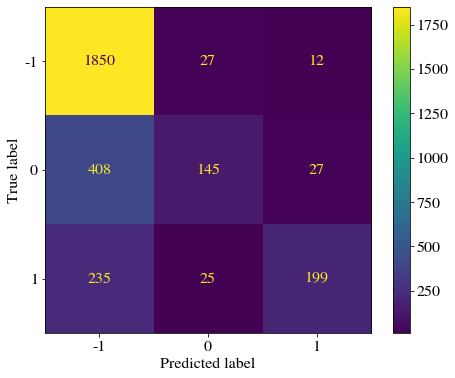

In [58]:
plot_confusion_matrix(estimator=text_classifier,
    X = X_test,
    y_true= y_test)

### Como las muestras están desbalanceadas la métrica accuracy no es la mejor para evaluar el modelo de clasificación lo cual se puede evidenciar si realizamos análisis más profundos. La aproximación debe de ser entonces optimizar el F-1 Score ya que este permite darle un peso igual a las muestras desbalanceadas combinando las métricas precisión y el recall ya que se desea que el algoritmo sea bueno por igual en la clasificación de tweets negativos, neutros o positivos 

In [60]:
print(classification_report(y_test, predictions_test))

              precision    recall  f1-score   support

          -1       0.74      0.98      0.84      1889
           0       0.74      0.25      0.37       580
           1       0.84      0.43      0.57       459

    accuracy                           0.75      2928
   macro avg       0.77      0.55      0.60      2928
weighted avg       0.76      0.75      0.71      2928



### Analizando:

#### Para los tweets negativos
- de todos los tweets predichos como negativos, el 74% en verdad son negativos
- se han identificado correctamente el 98% de los tweets negativos
- todo esto se combina en un f1 score de 0.84


#### Para los tweets neutros
- de todos los tweets predichos como neutros, el 74% en verdad son neutros
- se han identificado correctamente el 25% de los tweets neutros
- todo esto se combina en un f1 score de 0.37


#### Para los tweets positivos
- de todos los tweets predichos como neutros, el 84% en verdad son positivos
- se han identificado correctamente el 43% de los tweets positivos
- todo esto se combina en un f1 score de 0.57



#### Conclusiones de este primer modelo:

- El modelo está sesgado a valores negativos por las muestras no balanceadas
- El modelo no es capaz de identificar los tweets neutros ni los tweets positivos de manera correcta


### 5.1 Evaluación de Random Forest 

In [126]:
def evaluation_setence(test_sentence, model):
    
    cleaned_sentence = second_cleaning(first_cleaning(test_sentence))
    cleaned_sentence = [cleaned_sentence ]

    cleaned_sentence_vectorized = vectorizer.transform(cleaned_sentence).toarray()
    
    print(cleaned_sentence)
    
    return model.predict(cleaned_sentence_vectorized)
    

In [127]:
test_sentence = "the trip was not awful, it can be better but I am confortable with it"
evaluation_setence(test_sentence, text_classifier)

['the trip be not awful it can be well but be confortable with it']


array([-1], dtype=int64)

In [72]:
test_sentence = "the trip was good it, be better but I am confortable with it"
evaluation_setence(test_sentence)

['the trip be good it can be well but be confortable with it']


array([-1], dtype=int64)

## 6.1 Hyperparameter tunning with Optuna

https://coderzcolumn.com/tutorials/machine-learning/simple-guide-to-optuna-for-hyperparameters-optimization-tuning

### 6.1.1 Random Forest

In [78]:
import optuna

In [119]:
def objetive(trial):

    n_estimators = trial.suggest_int("n_estimators", 50, 1000, log=True)
    #eligiendo una cantidad de estimadores grande con el fin de tener en cuenta la gran cantidad de columnas que
    #el dataset tiene
    
    criterion = trial.suggest_categorical("criterion", ["gini","entropy"])
    #variando diferentes criterios
    
    max_depth =  trial.suggest_int("max_depth", 10, 100)
    #variando la profundidad de los árboles individuales
    
    max_features = trial.suggest_float("max_features", 0.2,0.6)
    
    
    #Training the model
    global model
    model = RandomForestClassifier(n_estimators = n_estimators,
                                            criterion= criterion,
                                            max_depth = max_depth,
                                            max_features = max_features)
    model.fit(X_train, y_train)
    
    
    #Evaluation of the model 
    predictions_test = model.predict(X_test)
    
    f1_average = f1_score(y_test,predictions_test, average='macro')
    
    print(classification_report(y_test, predictions_test))
    
    return f1_average    


#Para guardar el modelo
def callback(study, trial):
    global best_model
    if study.best_trial == trial:
        best_model = model

In [121]:
study_name = "random_forest"
storage = 'sqlite:///db_%s.db'%(study_name)

n_startup_trials = 15
n_trials         = 50

storage

'sqlite:///db_random_forest.db'

In [122]:
%%time
sampler = optuna.samplers.TPESampler(n_startup_trials=n_startup_trials)

study= optuna.create_study(study_name="random_forest", direction="maximize",
                          sampler= sampler, storage=storage)
study.optimize(objetive, n_trials=n_trials, callbacks=[callback])


#empezó a la 1:23
#10 a las 4:0

[I 2022-10-06 13:22:25,587] A new study created in RDB with name: random_forest
[I 2022-10-06 13:32:14,675] Trial 0 finished with value: 0.672316418602383 and parameters: {'n_estimators': 116, 'criterion': 'entropy', 'max_depth': 86, 'max_features': 0.3791029360454624}. Best is trial 0 with value: 0.672316418602383.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.58      0.46      0.51       580
           1       0.71      0.60      0.65       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 13:46:45,885] Trial 1 finished with value: 0.6723825294720731 and parameters: {'n_estimators': 199, 'criterion': 'gini', 'max_depth': 41, 'max_features': 0.49550236267223596}. Best is trial 1 with value: 0.6723825294720731.


              precision    recall  f1-score   support

          -1       0.81      0.91      0.86      1889
           0       0.60      0.45      0.51       580
           1       0.73      0.58      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 13:58:36,520] Trial 2 finished with value: 0.677269120224683 and parameters: {'n_estimators': 141, 'criterion': 'gini', 'max_depth': 53, 'max_features': 0.5951794889457714}. Best is trial 2 with value: 0.677269120224683.


              precision    recall  f1-score   support

          -1       0.81      0.91      0.86      1889
           0       0.60      0.46      0.52       580
           1       0.72      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 14:09:14,053] Trial 3 finished with value: 0.6811884584593332 and parameters: {'n_estimators': 317, 'criterion': 'entropy', 'max_depth': 88, 'max_features': 0.2247772910578537}. Best is trial 3 with value: 0.6811884584593332.


              precision    recall  f1-score   support

          -1       0.82      0.91      0.86      1889
           0       0.61      0.48      0.54       580
           1       0.71      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 14:13:57,854] Trial 4 finished with value: 0.6591153073833796 and parameters: {'n_estimators': 101, 'criterion': 'entropy', 'max_depth': 24, 'max_features': 0.4478692478195968}. Best is trial 3 with value: 0.6811884584593332.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.56      0.44      0.49       580
           1       0.71      0.57      0.63       459

    accuracy                           0.76      2928
   macro avg       0.69      0.64      0.66      2928
weighted avg       0.74      0.76      0.75      2928



[I 2022-10-06 14:19:05,355] Trial 5 finished with value: 0.6604381740545343 and parameters: {'n_estimators': 187, 'criterion': 'gini', 'max_depth': 24, 'max_features': 0.22320173216147732}. Best is trial 3 with value: 0.6811884584593332.


              precision    recall  f1-score   support

          -1       0.80      0.91      0.85      1889
           0       0.58      0.42      0.49       580
           1       0.73      0.57      0.64       459

    accuracy                           0.76      2928
   macro avg       0.70      0.63      0.66      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 15:01:09,532] Trial 6 finished with value: 0.6770988745844692 and parameters: {'n_estimators': 818, 'criterion': 'gini', 'max_depth': 99, 'max_features': 0.2878027635762713}. Best is trial 3 with value: 0.6811884584593332.


              precision    recall  f1-score   support

          -1       0.81      0.92      0.86      1889
           0       0.62      0.45      0.52       580
           1       0.73      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 15:04:05,911] Trial 7 finished with value: 0.6792624515898501 and parameters: {'n_estimators': 55, 'criterion': 'entropy', 'max_depth': 53, 'max_features': 0.4412131215781605}. Best is trial 3 with value: 0.6811884584593332.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.48      0.53       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 15:07:56,417] Trial 8 finished with value: 0.6856978129844137 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 64, 'max_features': 0.3747628544974033}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.61      0.49      0.54       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.67      0.69      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 15:30:09,246] Trial 9 finished with value: 0.6740125381674096 and parameters: {'n_estimators': 368, 'criterion': 'entropy', 'max_depth': 45, 'max_features': 0.5559613348208292}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1889
           0       0.59      0.46      0.51       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 15:58:56,994] Trial 10 finished with value: 0.6514550427138729 and parameters: {'n_estimators': 941, 'criterion': 'gini', 'max_depth': 19, 'max_features': 0.322547028043737}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.80      0.90      0.85      1889
           0       0.54      0.42      0.47       580
           1       0.73      0.56      0.64       459

    accuracy                           0.75      2928
   macro avg       0.69      0.63      0.65      2928
weighted avg       0.74      0.75      0.74      2928



[I 2022-10-06 16:07:58,633] Trial 11 finished with value: 0.6641960912594537 and parameters: {'n_estimators': 170, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 0.5425719658016224}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.56      0.46      0.50       580
           1       0.71      0.58      0.64       459

    accuracy                           0.76      2928
   macro avg       0.69      0.64      0.66      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 16:10:40,036] Trial 12 finished with value: 0.6812461239032793 and parameters: {'n_estimators': 86, 'criterion': 'entropy', 'max_depth': 88, 'max_features': 0.23464936972696693}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.91      0.86      1889
           0       0.61      0.47      0.53       580
           1       0.72      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.72      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 16:19:19,017] Trial 13 finished with value: 0.675245113563666 and parameters: {'n_estimators': 201, 'criterion': 'entropy', 'max_depth': 79, 'max_features': 0.314302814798742}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1889
           0       0.60      0.47      0.52       580
           1       0.71      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.68      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 16:50:20,964] Trial 14 finished with value: 0.673672167902319 and parameters: {'n_estimators': 891, 'criterion': 'entropy', 'max_depth': 36, 'max_features': 0.2651432496709158}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.91      0.86      1889
           0       0.59      0.46      0.51       580
           1       0.72      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 16:53:06,527] Trial 15 finished with value: 0.6787361664809982 and parameters: {'n_estimators': 57, 'criterion': 'entropy', 'max_depth': 70, 'max_features': 0.3594540092999166}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.46      0.52       580
           1       0.71      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 16:57:32,400] Trial 16 finished with value: 0.6771303912973009 and parameters: {'n_estimators': 83, 'criterion': 'entropy', 'max_depth': 66, 'max_features': 0.4191201342068049}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.59      0.47      0.52       580
           1       0.70      0.61      0.65       459

    accuracy                           0.77      2928
   macro avg       0.70      0.66      0.68      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 17:01:19,661] Trial 17 finished with value: 0.6808290625856869 and parameters: {'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 67, 'max_features': 0.3622051996932046}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.47      0.53       580
           1       0.71      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:03:58,529] Trial 18 finished with value: 0.6830637898955098 and parameters: {'n_estimators': 71, 'criterion': 'entropy', 'max_depth': 76, 'max_features': 0.2602911217742594}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.91      0.86      1889
           0       0.61      0.47      0.53       580
           1       0.72      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.72      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:06:16,366] Trial 19 finished with value: 0.6782727708377291 and parameters: {'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 75, 'max_features': 0.32742102692975505}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.59      0.47      0.53       580
           1       0.71      0.61      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:20:07,103] Trial 20 finished with value: 0.6769333269520441 and parameters: {'n_estimators': 342, 'criterion': 'entropy', 'max_depth': 62, 'max_features': 0.27210985538301663}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1889
           0       0.60      0.47      0.53       580
           1       0.71      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:22:51,965] Trial 21 finished with value: 0.6768151477909576 and parameters: {'n_estimators': 74, 'criterion': 'entropy', 'max_depth': 98, 'max_features': 0.2439082874049422}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.59      0.46      0.52       580
           1       0.72      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 17:26:46,909] Trial 22 finished with value: 0.6802336810814645 and parameters: {'n_estimators': 110, 'criterion': 'entropy', 'max_depth': 85, 'max_features': 0.2075423189037217}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.91      0.86      1889
           0       0.61      0.46      0.53       580
           1       0.72      0.60      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:30:10,324] Trial 23 finished with value: 0.6757732360183132 and parameters: {'n_estimators': 69, 'criterion': 'entropy', 'max_depth': 92, 'max_features': 0.2959615023467457}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.60      0.46      0.52       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.68      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 17:33:49,549] Trial 24 finished with value: 0.6778722995380075 and parameters: {'n_estimators': 93, 'criterion': 'entropy', 'max_depth': 78, 'max_features': 0.25239710697030493}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.59      0.47      0.52       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:37:44,419] Trial 25 finished with value: 0.67574618928112 and parameters: {'n_estimators': 127, 'criterion': 'entropy', 'max_depth': 58, 'max_features': 0.2031974232725339}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1889
           0       0.61      0.46      0.53       580
           1       0.72      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:50:18,037] Trial 26 finished with value: 0.6803613190010012 and parameters: {'n_estimators': 275, 'criterion': 'entropy', 'max_depth': 74, 'max_features': 0.3482119307128777}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.47      0.53       580
           1       0.71      0.61      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 17:55:48,059] Trial 27 finished with value: 0.6723052285611555 and parameters: {'n_estimators': 70, 'criterion': 'gini', 'max_depth': 80, 'max_features': 0.49391869671257244}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.91      0.86      1889
           0       0.59      0.45      0.51       580
           1       0.73      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 18:01:44,680] Trial 28 finished with value: 0.6764009519553676 and parameters: {'n_estimators': 151, 'criterion': 'entropy', 'max_depth': 92, 'max_features': 0.29127162207327395}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1889
           0       0.60      0.46      0.52       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 18:28:11,447] Trial 29 finished with value: 0.6800519595062422 and parameters: {'n_estimators': 486, 'criterion': 'entropy', 'max_depth': 84, 'max_features': 0.39096274337930775}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.47      0.53       580
           1       0.71      0.61      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 18:34:39,137] Trial 30 finished with value: 0.6840904804167435 and parameters: {'n_estimators': 120, 'criterion': 'entropy', 'max_depth': 60, 'max_features': 0.40287616216371364}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.61      0.49      0.54       580
           1       0.72      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 18:43:07,387] Trial 31 finished with value: 0.6803386304196177 and parameters: {'n_estimators': 112, 'criterion': 'entropy', 'max_depth': 62, 'max_features': 0.40733634446124717}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.47      0.53       580
           1       0.72      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 18:47:01,218] Trial 32 finished with value: 0.6846876309997785 and parameters: {'n_estimators': 63, 'criterion': 'entropy', 'max_depth': 47, 'max_features': 0.465403424593712}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.59      0.48      0.53       580
           1       0.72      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 18:50:30,402] Trial 33 finished with value: 0.6752983068318299 and parameters: {'n_estimators': 63, 'criterion': 'entropy', 'max_depth': 47, 'max_features': 0.4837193641888354}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.85      1889
           0       0.59      0.47      0.53       580
           1       0.71      0.59      0.65       459

    accuracy                           0.77      2928
   macro avg       0.70      0.66      0.68      2928
weighted avg       0.75      0.77      0.76      2928



[I 2022-10-06 18:58:59,245] Trial 34 finished with value: 0.6691558089695611 and parameters: {'n_estimators': 138, 'criterion': 'gini', 'max_depth': 56, 'max_features': 0.44864715248448284}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.59      0.45      0.51       580
           1       0.71      0.58      0.64       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 19:04:03,028] Trial 35 finished with value: 0.6771753308238272 and parameters: {'n_estimators': 95, 'criterion': 'entropy', 'max_depth': 47, 'max_features': 0.47773667168765355}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.58      0.47      0.52       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 19:07:33,278] Trial 36 finished with value: 0.6682667821243321 and parameters: {'n_estimators': 60, 'criterion': 'entropy', 'max_depth': 35, 'max_features': 0.5219348400832704}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.56      0.45      0.50       580
           1       0.72      0.60      0.65       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 19:13:30,573] Trial 37 finished with value: 0.6782161752306805 and parameters: {'n_estimators': 109, 'criterion': 'gini', 'max_depth': 51, 'max_features': 0.428295763587802}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.92      0.86      1889
           0       0.62      0.47      0.53       580
           1       0.73      0.58      0.64       459

    accuracy                           0.77      2928
   macro avg       0.72      0.65      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 19:16:08,846] Trial 38 finished with value: 0.683249586181946 and parameters: {'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 60, 'max_features': 0.4642639206197713}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.48      0.53       580
           1       0.72      0.61      0.66       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 19:19:19,275] Trial 39 finished with value: 0.6699613925305296 and parameters: {'n_estimators': 51, 'criterion': 'gini', 'max_depth': 60, 'max_features': 0.4647838106900555}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.91      0.85      1889
           0       0.60      0.44      0.51       580
           1       0.72      0.58      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.65      0.67      2928
weighted avg       0.75      0.77      0.75      2928



[I 2022-10-06 19:29:29,798] Trial 40 finished with value: 0.6708518259065572 and parameters: {'n_estimators': 234, 'criterion': 'entropy', 'max_depth': 41, 'max_features': 0.39225205115754225}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.58      0.46      0.51       580
           1       0.71      0.59      0.65       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 19:33:25,871] Trial 41 finished with value: 0.6748018721022148 and parameters: {'n_estimators': 66, 'criterion': 'entropy', 'max_depth': 69, 'max_features': 0.5148227680882158}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      1889
           0       0.59      0.48      0.53       580
           1       0.70      0.59      0.64       459

    accuracy                           0.76      2928
   macro avg       0.70      0.66      0.67      2928
weighted avg       0.75      0.76      0.76      2928



[I 2022-10-06 19:37:23,594] Trial 42 finished with value: 0.6727979450182087 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 52, 'max_features': 0.4594311559134372}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.58      0.46      0.51       580
           1       0.71      0.60      0.65       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 19:41:10,488] Trial 43 finished with value: 0.6800405328699504 and parameters: {'n_estimators': 59, 'criterion': 'entropy', 'max_depth': 63, 'max_features': 0.5804383348899776}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.59      0.48      0.53       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 19:45:40,434] Trial 44 finished with value: 0.6794357004779558 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 71, 'max_features': 0.42641558402804985}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.60      0.48      0.54       580
           1       0.71      0.59      0.64       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 19:51:13,792] Trial 45 finished with value: 0.6775125708991956 and parameters: {'n_estimators': 123, 'criterion': 'entropy', 'max_depth': 56, 'max_features': 0.38286571228420285}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.86      1889
           0       0.60      0.47      0.52       580
           1       0.71      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.71      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 19:54:01,795] Trial 46 finished with value: 0.6742837640240049 and parameters: {'n_estimators': 50, 'criterion': 'entropy', 'max_depth': 49, 'max_features': 0.5159480680585791}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.89      0.85      1889
           0       0.58      0.47      0.51       580
           1       0.71      0.61      0.66       459

    accuracy                           0.76      2928
   macro avg       0.70      0.66      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 20:01:47,229] Trial 47 finished with value: 0.6709770855681952 and parameters: {'n_estimators': 155, 'criterion': 'entropy', 'max_depth': 43, 'max_features': 0.40437928625142744}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.81      0.90      0.85      1889
           0       0.58      0.46      0.51       580
           1       0.71      0.59      0.65       459

    accuracy                           0.76      2928
   macro avg       0.70      0.65      0.67      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-06 20:04:03,925] Trial 48 finished with value: 0.6245045014945861 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 11, 'max_features': 0.33884442122360886}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.79      0.90      0.84      1889
           0       0.52      0.40      0.45       580
           1       0.72      0.49      0.58       459

    accuracy                           0.74      2928
   macro avg       0.67      0.60      0.62      2928
weighted avg       0.72      0.74      0.72      2928



[I 2022-10-06 20:41:51,685] Trial 49 finished with value: 0.6773683900687301 and parameters: {'n_estimators': 671, 'criterion': 'entropy', 'max_depth': 64, 'max_features': 0.44085916820753973}. Best is trial 8 with value: 0.6856978129844137.


              precision    recall  f1-score   support

          -1       0.82      0.90      0.86      1889
           0       0.59      0.47      0.53       580
           1       0.70      0.60      0.65       459

    accuracy                           0.77      2928
   macro avg       0.70      0.66      0.68      2928
weighted avg       0.76      0.77      0.76      2928

CPU times: total: 7h 11min 28s
Wall time: 7h 19min 26s


### 6.1.1.1 Best model RF

In [70]:
import pickle

In [123]:
best_model

RandomForestClassifier(criterion='entropy', max_depth=64,
                       max_features=0.3747628544974033, n_estimators=84)

In [171]:
# save the model to disk
filename = 'best-RF.sav'
pickle.dump(best_model, open(filename, 'wb'))

'''
# load the model from disk
best_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)
'''

In [124]:
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)


print("accuracy in train set: ",accuracy_score(y_train, predictions_train))
print("accuracy in test set: ",accuracy_score(y_test, predictions_test))


print("F1 in train set: ",f1_score(y_train, predictions_train, average='macro'))
print("F1 in test set: ",f1_score(y_test, predictions_test, average='macro'))


accuracy in train set:  0.9838627049180327
accuracy in test set:  0.773224043715847
F1 in train set:  0.977115968927999
F1 in test set:  0.6856978129844137


C:\Users\nico0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


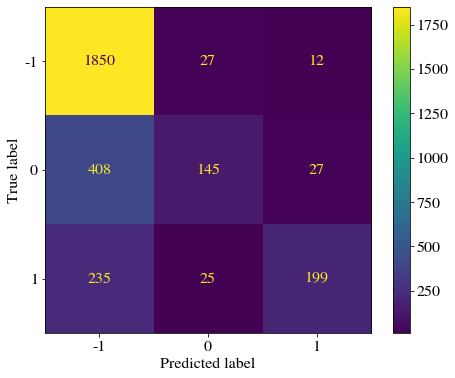

In [125]:
plot_confusion_matrix(estimator=text_classifier,
    X = X_test,
    y_true= y_test)

In [131]:
test_sentence = "the trip can be better but I am confortable with it"
evaluation_setence(test_sentence, best_model)

['the trip can be well but be confortable with it']


array([-1], dtype=int64)

El modelo de RF se equivoca en mayormente en tweets clasificados como neutros

### 6.1.2 XGboost classifier


Sitios web de hiperparámetros para ajustar en algoritmo XGBoost
- https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning/notebook
- https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76#:~:text=Arguably%2C%20there%20are%20six%20

- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
scale_pos_weight=1



### F1-score
Entendimiento de la métrica F-1
- https://www.baeldung.com/cs/multi-class-f1-score


#### Bias-variance tradeoff

https://elitedatascience.com/bias-variance-tradeoff

In [71]:
from xgboost import XGBClassifier

In [72]:
y_train_XGB = y_train +1
y_test_XGB = y_test +1 

In [81]:
def objetive_XGB(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_float('learning_rate', 0.01, 0.6)
    max_depth = trial.suggest_int('max_depth', 4, 20)
    min_child_weight = trial.suggest_float('min_child_weight', 0.5, 10)
    gamma = trial.suggest_float('gamma', 0.05, 0.4, log=True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1)
    
        
    # define and fit the model
    global XGBC
    XGBC = XGBClassifier(n_estimators=n_estimators,
                                learning_rate=learning_rate,
                                max_depth=max_depth,
                                min_child_weight=min_child_weight,
                                gamma=gamma,colsample_bytree=colsample_bytree)
        
    #Training the model    
    XGBC.fit(X_train, y_train_XGB)  #y_train+1: XGBoost debe de ser valores positivos
      
    
    #Evaluation of the model 
    predictions_test = XGBC.predict(X_test)
    
    f1_average = f1_score(y_test_XGB,predictions_test, average='macro')
    
    print(classification_report(y_test_XGB, predictions_test))
    
    return f1_average    


#Para guardar el modelo
def callback(study, trial):
    global best_model
    if study.best_trial == trial:
        best_model = XGBC

In [74]:
study_name = "XGBC"
storage = 'sqlite:///db_%s.db'%(study_name)

n_startup_trials = 15
n_trials         = 50

storage

'sqlite:///db_XGBC.db'

In [209]:
%%time
sampler = optuna.samplers.TPESampler(n_startup_trials=n_startup_trials)

study= optuna.create_study(study_name="XGBoost", direction="maximize",
                          sampler= sampler, storage=storage)
study.optimize(objetive_XGB, n_trials=n_trials, callbacks=[callback])

#empezó a las 11:15
#10 trials a las 12:00

[I 2022-10-06 23:15:34,617] A new study created in RDB with name: XGBoost
[I 2022-10-06 23:23:57,391] Trial 0 finished with value: 0.7042660238517051 and parameters: {'n_estimators': 184, 'learning_rate': 0.5799150614471924, 'max_depth': 19, 'min_child_weight': 6.16685134614367, 'gamma': 0.20589559486756528, 'colsample_bytree': 0.7425063258427529}. Best is trial 0 with value: 0.7042660238517051.


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1889
           1       0.60      0.55      0.58       580
           2       0.70      0.64      0.67       459

    accuracy                           0.78      2928
   macro avg       0.72      0.69      0.70      2928
weighted avg       0.77      0.78      0.78      2928



[I 2022-10-06 23:28:53,770] Trial 1 finished with value: 0.7174602840773324 and parameters: {'n_estimators': 170, 'learning_rate': 0.14241139460692034, 'max_depth': 18, 'min_child_weight': 7.934422736669782, 'gamma': 0.06468603412553652, 'colsample_bytree': 0.5066821790772302}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.76      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-06 23:30:01,591] Trial 2 finished with value: 0.7118656351883182 and parameters: {'n_estimators': 73, 'learning_rate': 0.5689970622707057, 'max_depth': 5, 'min_child_weight': 4.731154358042463, 'gamma': 0.08778105550501436, 'colsample_bytree': 0.8643011550120261}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.59       580
           2       0.75      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-06 23:35:16,016] Trial 3 finished with value: 0.7165919705773494 and parameters: {'n_estimators': 189, 'learning_rate': 0.3074204666029798, 'max_depth': 16, 'min_child_weight': 4.985610828426976, 'gamma': 0.17569972948434792, 'colsample_bytree': 0.547782890059343}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.57      0.60       580
           2       0.75      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-06 23:38:29,678] Trial 4 finished with value: 0.7090054274242045 and parameters: {'n_estimators': 140, 'learning_rate': 0.45343548391879174, 'max_depth': 8, 'min_child_weight': 7.190201809058912, 'gamma': 0.12378808237282887, 'colsample_bytree': 0.9008078327573799}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.73      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-06 23:41:20,795] Trial 5 finished with value: 0.7146863078179276 and parameters: {'n_estimators': 84, 'learning_rate': 0.1869150737031129, 'max_depth': 15, 'min_child_weight': 7.804284874463582, 'gamma': 0.128809111155823, 'colsample_bytree': 0.7196969464089941}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.54      0.58       580
           2       0.77      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-06 23:42:06,772] Trial 6 finished with value: 0.7126931244094942 and parameters: {'n_estimators': 31, 'learning_rate': 0.5573678798294681, 'max_depth': 12, 'min_child_weight': 3.03340852407378, 'gamma': 0.30997590469966246, 'colsample_bytree': 0.6141138430395245}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.63      0.54      0.58       580
           2       0.77      0.62      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-06 23:49:16,622] Trial 7 finished with value: 0.7091293041055974 and parameters: {'n_estimators': 177, 'learning_rate': 0.2998516934933004, 'max_depth': 17, 'min_child_weight': 6.600742803553113, 'gamma': 0.07801128291157886, 'colsample_bytree': 0.7934636182282799}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.73      0.62      0.67       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-06 23:49:45,802] Trial 8 finished with value: 0.673213165288438 and parameters: {'n_estimators': 38, 'learning_rate': 0.3907391882408654, 'max_depth': 4, 'min_child_weight': 1.806714482313227, 'gamma': 0.06250812967901474, 'colsample_bytree': 0.815713032796836}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.80      0.92      0.86      1889
           1       0.61      0.44      0.51       580
           2       0.76      0.58      0.66       459

    accuracy                           0.77      2928
   macro avg       0.72      0.64      0.67      2928
weighted avg       0.76      0.77      0.76      2928



[I 2022-10-06 23:51:15,179] Trial 9 finished with value: 0.6963060867984829 and parameters: {'n_estimators': 70, 'learning_rate': 0.2771901185120582, 'max_depth': 7, 'min_child_weight': 5.162331242249447, 'gamma': 0.09510895392035555, 'colsample_bytree': 0.9344448691040315}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.62      0.52      0.56       580
           2       0.74      0.59      0.66       459

    accuracy                           0.78      2928
   macro avg       0.73      0.67      0.70      2928
weighted avg       0.77      0.78      0.77      2928



[I 2022-10-06 23:57:05,914] Trial 10 finished with value: 0.7112678803492288 and parameters: {'n_estimators': 145, 'learning_rate': 0.3662510721308174, 'max_depth': 20, 'min_child_weight': 7.193980412079435, 'gamma': 0.27278462067137, 'colsample_bytree': 0.6078887468302361}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1889
           1       0.62      0.57      0.59       580
           2       0.72      0.63      0.67       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 00:00:20,410] Trial 11 finished with value: 0.7020672321623849 and parameters: {'n_estimators': 181, 'learning_rate': 0.12762810053128573, 'max_depth': 6, 'min_child_weight': 6.7758715887922385, 'gamma': 0.14576008306605637, 'colsample_bytree': 0.7989270214846448}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1889
           1       0.62      0.53      0.57       580
           2       0.74      0.61      0.67       459

    accuracy                           0.78      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.78      0.78      0.78      2928



[I 2022-10-07 00:02:40,613] Trial 12 finished with value: 0.6510512200891783 and parameters: {'n_estimators': 85, 'learning_rate': 0.02957712859612826, 'max_depth': 13, 'min_child_weight': 8.758509639591637, 'gamma': 0.28247098132123777, 'colsample_bytree': 0.6020217932142223}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.79      0.93      0.85      1889
           1       0.60      0.38      0.47       580
           2       0.78      0.53      0.63       459

    accuracy                           0.76      2928
   macro avg       0.72      0.62      0.65      2928
weighted avg       0.75      0.76      0.74      2928



[I 2022-10-07 00:04:24,384] Trial 13 finished with value: 0.7155915767836513 and parameters: {'n_estimators': 98, 'learning_rate': 0.533979734156532, 'max_depth': 9, 'min_child_weight': 5.4330663642793695, 'gamma': 0.23948777064911272, 'colsample_bytree': 0.5163231936952857}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.55      0.59       580
           2       0.75      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 00:12:36,536] Trial 14 finished with value: 0.6987758837868173 and parameters: {'n_estimators': 188, 'learning_rate': 0.3529371528522024, 'max_depth': 20, 'min_child_weight': 4.4757601296994505, 'gamma': 0.14709599781005306, 'colsample_bytree': 0.6852527326413234}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1889
           1       0.59      0.54      0.57       580
           2       0.72      0.61      0.66       459

    accuracy                           0.78      2928
   macro avg       0.72      0.68      0.70      2928
weighted avg       0.77      0.78      0.77      2928



[I 2022-10-07 00:16:50,874] Trial 15 finished with value: 0.7060667688629828 and parameters: {'n_estimators': 145, 'learning_rate': 0.19945088547550782, 'max_depth': 17, 'min_child_weight': 9.716627716831537, 'gamma': 0.39340797645574505, 'colsample_bytree': 0.5228961130432707}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.74      0.61      0.67       459

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.78      0.78      2928



[I 2022-10-07 00:21:35,484] Trial 16 finished with value: 0.7061735102376002 and parameters: {'n_estimators': 161, 'learning_rate': 0.047526492892016214, 'max_depth': 16, 'min_child_weight': 3.269627691283424, 'gamma': 0.051230167936556166, 'colsample_bytree': 0.5576101346806606}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1889
           1       0.64      0.52      0.57       580
           2       0.78      0.60      0.68       459

    accuracy                           0.79      2928
   macro avg       0.75      0.68      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 00:25:15,982] Trial 17 finished with value: 0.7114430219679054 and parameters: {'n_estimators': 122, 'learning_rate': 0.21401100846047344, 'max_depth': 13, 'min_child_weight': 8.742108709528724, 'gamma': 0.18377343723807593, 'colsample_bytree': 0.6606298085107734}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.75      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 00:29:07,387] Trial 18 finished with value: 0.7115992819463771 and parameters: {'n_estimators': 199, 'learning_rate': 0.10673053651374415, 'max_depth': 10, 'min_child_weight': 3.4474855362492383, 'gamma': 0.09840655883042103, 'colsample_bytree': 0.5062302903054688}. Best is trial 1 with value: 0.7174602840773324.


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.63      0.53      0.57       580
           2       0.78      0.62      0.69       459

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 00:32:32,725] Trial 19 finished with value: 0.7188420799719673 and parameters: {'n_estimators': 118, 'learning_rate': 0.24899375958727304, 'max_depth': 15, 'min_child_weight': 0.9864586449675801, 'gamma': 0.1799434887547653, 'colsample_bytree': 0.5711053462830326}. Best is trial 19 with value: 0.7188420799719673.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.55      0.59       580
           2       0.77      0.63      0.69       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 00:36:06,044] Trial 20 finished with value: 0.7106093792644681 and parameters: {'n_estimators': 117, 'learning_rate': 0.12326153436326917, 'max_depth': 14, 'min_child_weight': 0.8604399249232877, 'gamma': 0.06614107567942776, 'colsample_bytree': 0.665084907168912}. Best is trial 19 with value: 0.7188420799719673.


              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1889
           1       0.63      0.53      0.58       580
           2       0.77      0.61      0.68       459

    accuracy                           0.79      2928
   macro avg       0.75      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 00:41:04,322] Trial 21 finished with value: 0.7239600117832189 and parameters: {'n_estimators': 161, 'learning_rate': 0.2722542341344648, 'max_depth': 18, 'min_child_weight': 0.5056471290224569, 'gamma': 0.17539753307324613, 'colsample_bytree': 0.5656335365480727}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1889
           1       0.67      0.55      0.60       580
           2       0.76      0.63      0.69       459

    accuracy                           0.80      2928
   macro avg       0.76      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 00:45:22,488] Trial 22 finished with value: 0.7193041344605217 and parameters: {'n_estimators': 124, 'learning_rate': 0.24132130697778972, 'max_depth': 18, 'min_child_weight': 0.5724895569191952, 'gamma': 0.11210167177971089, 'colsample_bytree': 0.6041379343736012}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1889
           1       0.67      0.53      0.59       580
           2       0.75      0.63      0.69       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 00:49:47,663] Trial 23 finished with value: 0.718039591228714 and parameters: {'n_estimators': 123, 'learning_rate': 0.23284993689692152, 'max_depth': 18, 'min_child_weight': 0.6140399305562358, 'gamma': 0.10887028904103126, 'colsample_bytree': 0.5694984547878327}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1889
           1       0.67      0.54      0.60       580
           2       0.77      0.61      0.68       459

    accuracy                           0.80      2928
   macro avg       0.76      0.69      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 00:54:29,566] Trial 24 finished with value: 0.7191065166322024 and parameters: {'n_estimators': 159, 'learning_rate': 0.25076574294999177, 'max_depth': 15, 'min_child_weight': 2.0062244870386277, 'gamma': 0.16888191898328062, 'colsample_bytree': 0.6371523013439758}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.55      0.59       580
           2       0.75      0.64      0.69       459

    accuracy                           0.80      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 00:59:45,844] Trial 25 finished with value: 0.7105239553578405 and parameters: {'n_estimators': 157, 'learning_rate': 0.44068406067683374, 'max_depth': 18, 'min_child_weight': 1.8618722808213934, 'gamma': 0.15486720121425285, 'colsample_bytree': 0.6389866006828849}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.54      0.59       580
           2       0.72      0.63      0.67       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 01:04:07,634] Trial 26 finished with value: 0.7204155229407978 and parameters: {'n_estimators': 136, 'learning_rate': 0.33624293540843386, 'max_depth': 16, 'min_child_weight': 2.0223213785986385, 'gamma': 0.215384802711214, 'colsample_bytree': 0.7007212780255085}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.65      0.55      0.59       580
           2       0.74      0.65      0.69       459

    accuracy                           0.80      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 01:11:42,674] Trial 27 finished with value: 0.7163616943937304 and parameters: {'n_estimators': 130, 'learning_rate': 0.33061226231749036, 'max_depth': 19, 'min_child_weight': 2.417488814549329, 'gamma': 0.22962032646577396, 'colsample_bytree': 0.9989734725079212}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.54      0.59       580
           2       0.74      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 01:14:19,740] Trial 28 finished with value: 0.7204657752796062 and parameters: {'n_estimators': 104, 'learning_rate': 0.41047588028468507, 'max_depth': 11, 'min_child_weight': 1.3282414578967954, 'gamma': 0.12047988693343702, 'colsample_bytree': 0.7096540339285146}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.54      0.59       580
           2       0.76      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 01:15:44,586] Trial 29 finished with value: 0.7155419650634723 and parameters: {'n_estimators': 54, 'learning_rate': 0.4097271835823199, 'max_depth': 11, 'min_child_weight': 1.3130417551580336, 'gamma': 0.2124640593495723, 'colsample_bytree': 0.7326935443407998}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.54      0.58       580
           2       0.76      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 01:18:15,769] Trial 30 finished with value: 0.7163118001912765 and parameters: {'n_estimators': 99, 'learning_rate': 0.48710752064279744, 'max_depth': 11, 'min_child_weight': 2.6542627526707374, 'gamma': 0.35364318760248337, 'colsample_bytree': 0.7033263844711163}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.63      0.55      0.59       580
           2       0.76      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 01:23:03,779] Trial 31 finished with value: 0.7160238106831827 and parameters: {'n_estimators': 108, 'learning_rate': 0.2827236181983391, 'max_depth': 19, 'min_child_weight': 1.3604417097649908, 'gamma': 0.12080944201291152, 'colsample_bytree': 0.7607960943784388}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.53      0.58       580
           2       0.76      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 01:27:56,010] Trial 32 finished with value: 0.7212571882436031 and parameters: {'n_estimators': 135, 'learning_rate': 0.33849821698599397, 'max_depth': 17, 'min_child_weight': 3.8049477091116044, 'gamma': 0.20024283570669202, 'colsample_bytree': 0.6836068956764642}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.55      0.59       580
           2       0.76      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 01:33:21,298] Trial 33 finished with value: 0.7109045581377057 and parameters: {'n_estimators': 138, 'learning_rate': 0.38241873143523664, 'max_depth': 17, 'min_child_weight': 4.204763600294205, 'gamma': 0.20170071340869802, 'colsample_bytree': 0.7601414347339218}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1889
           1       0.62      0.56      0.58       580
           2       0.73      0.64      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 01:38:08,819] Trial 34 finished with value: 0.7190714274948401 and parameters: {'n_estimators': 169, 'learning_rate': 0.33337852495116943, 'max_depth': 13, 'min_child_weight': 3.9959525871438397, 'gamma': 0.24395816221468522, 'colsample_bytree': 0.6935355689398445}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.57      0.60       580
           2       0.74      0.65      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 01:43:45,205] Trial 35 finished with value: 0.7133480963951825 and parameters: {'n_estimators': 151, 'learning_rate': 0.43689847699150414, 'max_depth': 16, 'min_child_weight': 2.455358339980109, 'gamma': 0.20470122846382363, 'colsample_bytree': 0.7599454300859761}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.59       580
           2       0.74      0.64      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 01:47:40,681] Trial 36 finished with value: 0.7138635649869767 and parameters: {'n_estimators': 109, 'learning_rate': 0.32513495772111417, 'max_depth': 14, 'min_child_weight': 3.7483043361913775, 'gamma': 0.16287303780833604, 'colsample_bytree': 0.8386543955988296}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.61      0.56      0.59       580
           2       0.75      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 01:51:10,567] Trial 37 finished with value: 0.7169719072193527 and parameters: {'n_estimators': 137, 'learning_rate': 0.4958928462623515, 'max_depth': 11, 'min_child_weight': 1.4309968649286073, 'gamma': 0.13119772044993785, 'colsample_bytree': 0.7363412911092202}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.55      0.59       580
           2       0.74      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 01:51:25,992] Trial 38 finished with value: 0.6601998612391694 and parameters: {'n_estimators': 11, 'learning_rate': 0.4097369172236814, 'max_depth': 9, 'min_child_weight': 3.0382725713096344, 'gamma': 0.1902998849461925, 'colsample_bytree': 0.666846560837163}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.80      0.92      0.85      1889
           1       0.58      0.41      0.48       580
           2       0.76      0.56      0.65       459

    accuracy                           0.76      2928
   macro avg       0.71      0.63      0.66      2928
weighted avg       0.75      0.76      0.75      2928



[I 2022-10-07 01:57:08,396] Trial 39 finished with value: 0.7232685258547336 and parameters: {'n_estimators': 171, 'learning_rate': 0.4762879772216093, 'max_depth': 17, 'min_child_weight': 2.154137794146332, 'gamma': 0.27886307199175575, 'colsample_bytree': 0.6389565079407542}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.63      0.57      0.60       580
           2       0.74      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 02:03:53,171] Trial 40 finished with value: 0.7206326956151977 and parameters: {'n_estimators': 174, 'learning_rate': 0.4769505635335035, 'max_depth': 20, 'min_child_weight': 2.6081563404827417, 'gamma': 0.3068115859497845, 'colsample_bytree': 0.6429265470690765}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.64      0.56      0.60       580
           2       0.74      0.65      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 02:10:44,698] Trial 41 finished with value: 0.7101589626719034 and parameters: {'n_estimators': 173, 'learning_rate': 0.5913830729473237, 'max_depth': 20, 'min_child_weight': 2.676522964466784, 'gamma': 0.31873037464508214, 'colsample_bytree': 0.6491876324485549}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1889
           1       0.60      0.56      0.58       580
           2       0.74      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 02:17:42,102] Trial 42 finished with value: 0.7125681794770234 and parameters: {'n_estimators': 195, 'learning_rate': 0.4916997058940543, 'max_depth': 19, 'min_child_weight': 1.4965320970717149, 'gamma': 0.26190841565566536, 'colsample_bytree': 0.6147861801194137}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.73      0.64      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 02:22:53,475] Trial 43 finished with value: 0.7195154099698652 and parameters: {'n_estimators': 169, 'learning_rate': 0.5415735130343615, 'max_depth': 17, 'min_child_weight': 2.261694238953041, 'gamma': 0.30555994176891815, 'colsample_bytree': 0.5829894396112684}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.74      0.65      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 02:28:59,936] Trial 44 finished with value: 0.7071374090068013 and parameters: {'n_estimators': 182, 'learning_rate': 0.45226559549513295, 'max_depth': 20, 'min_child_weight': 3.5588657440130333, 'gamma': 0.33492991043082626, 'colsample_bytree': 0.5394570307014216}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.73      0.61      0.67       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 02:34:29,984] Trial 45 finished with value: 0.7123169061083382 and parameters: {'n_estimators': 151, 'learning_rate': 0.5094885352960733, 'max_depth': 19, 'min_child_weight': 2.9008145449764777, 'gamma': 0.3955361979861524, 'colsample_bytree': 0.6337892697676638}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.63      0.55      0.59       580
           2       0.73      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 02:40:42,312] Trial 46 finished with value: 0.716960115351282 and parameters: {'n_estimators': 166, 'learning_rate': 0.4132661854935695, 'max_depth': 18, 'min_child_weight': 1.0763193711124384, 'gamma': 0.2663042187947567, 'colsample_bytree': 0.6835568970393385}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.65      0.54      0.59       580
           2       0.73      0.65      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 02:47:21,865] Trial 47 finished with value: 0.7165191602379729 and parameters: {'n_estimators': 177, 'learning_rate': 0.3642331906366971, 'max_depth': 17, 'min_child_weight': 1.6546192137166327, 'gamma': 0.13494112164169886, 'colsample_bytree': 0.7263503727096656}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.54      0.58       580
           2       0.74      0.65      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 02:52:51,343] Trial 48 finished with value: 0.7081666899685546 and parameters: {'n_estimators': 189, 'learning_rate': 0.47268421490382706, 'max_depth': 12, 'min_child_weight': 5.962356722723646, 'gamma': 0.2866611797012676, 'colsample_bytree': 0.7832911936974942}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1889
           1       0.60      0.56      0.58       580
           2       0.73      0.63      0.68       459

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.78      0.78      2928



[I 2022-10-07 02:54:08,608] Trial 49 finished with value: 0.7041690648097713 and parameters: {'n_estimators': 88, 'learning_rate': 0.30220121223256236, 'max_depth': 7, 'min_child_weight': 4.583385090550537, 'gamma': 0.07830768108457836, 'colsample_bytree': 0.5925874515939508}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.61      0.53      0.57       580
           2       0.76      0.61      0.68       459

    accuracy                           0.78      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.78      0.78      0.78      2928

CPU times: total: 2d 7h 24min 32s
Wall time: 3h 38min 34s


In [82]:
n_trials         = 49

study= optuna.create_study(study_name="XGBoost", direction="maximize",
                           storage=storage, load_if_exists=True)
study.optimize(objetive_XGB, n_trials=n_trials, callbacks=[callback])

[I 2022-10-07 10:03:50,072] Using an existing study with name 'XGBoost' instead of creating a new one.
[I 2022-10-07 10:06:55,708] Trial 51 finished with value: 0.7192258366225109 and parameters: {'n_estimators': 74, 'learning_rate': 0.5214177377987478, 'max_depth': 20, 'min_child_weight': 2.3093914374629447, 'gamma': 0.25074893869281195, 'colsample_bytree': 0.6223129177273073}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.76      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 10:09:58,719] Trial 52 finished with value: 0.7121383229723266 and parameters: {'n_estimators': 93, 'learning_rate': 0.5597215379368758, 'max_depth': 19, 'min_child_weight': 3.203836601463176, 'gamma': 0.2255330383505065, 'colsample_bytree': 0.5379391250566083}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.63      0.55      0.59       580
           2       0.75      0.62      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 10:12:42,219] Trial 53 finished with value: 0.7161267629182069 and parameters: {'n_estimators': 63, 'learning_rate': 0.47529126092117646, 'max_depth': 20, 'min_child_weight': 1.044749831613169, 'gamma': 0.3614963711832447, 'colsample_bytree': 0.711860772845866}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.56      0.60       580
           2       0.75      0.62      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 10:15:34,166] Trial 54 finished with value: 0.7133640005409528 and parameters: {'n_estimators': 78, 'learning_rate': 0.39383939515182353, 'max_depth': 18, 'min_child_weight': 1.7689246900930962, 'gamma': 0.2935172870342079, 'colsample_bytree': 0.674713547417156}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.54      0.58       580
           2       0.75      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 10:17:16,831] Trial 55 finished with value: 0.7036581427624004 and parameters: {'n_estimators': 52, 'learning_rate': 0.17308995742699343, 'max_depth': 16, 'min_child_weight': 2.778556160415275, 'gamma': 0.19217503802179758, 'colsample_bytree': 0.6516471857718189}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1889
           1       0.63      0.53      0.57       580
           2       0.76      0.60      0.67       459

    accuracy                           0.79      2928
   macro avg       0.74      0.68      0.70      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 10:22:16,854] Trial 56 finished with value: 0.7128951955025574 and parameters: {'n_estimators': 164, 'learning_rate': 0.4281185088939349, 'max_depth': 17, 'min_child_weight': 0.5878748343187696, 'gamma': 0.14251515840546722, 'colsample_bytree': 0.5826199952459252}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.64      0.53      0.58       580
           2       0.73      0.64      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.69      0.71      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 10:26:16,941] Trial 57 finished with value: 0.7181978039444624 and parameters: {'n_estimators': 147, 'learning_rate': 0.4628712330390833, 'max_depth': 14, 'min_child_weight': 2.061167230046274, 'gamma': 0.15815513240310244, 'colsample_bytree': 0.6233341865249438}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.64      0.56      0.59       580
           2       0.74      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 10:31:18,219] Trial 58 finished with value: 0.7135330304833278 and parameters: {'n_estimators': 157, 'learning_rate': 0.2714924828855574, 'max_depth': 19, 'min_child_weight': 3.850396888137275, 'gamma': 0.22948686815603844, 'colsample_bytree': 0.5494386077382859}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.74      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 10:35:06,658] Trial 59 finished with value: 0.7096875238736287 and parameters: {'n_estimators': 113, 'learning_rate': 0.5472186578504679, 'max_depth': 18, 'min_child_weight': 4.938344909877692, 'gamma': 0.2696102351653108, 'colsample_bytree': 0.6023434691193539}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.73      0.62      0.67       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 10:37:01,649] Trial 60 finished with value: 0.7204239973184713 and parameters: {'n_estimators': 102, 'learning_rate': 0.5137984150124613, 'max_depth': 10, 'min_child_weight': 1.1661885824222364, 'gamma': 0.09910818938639665, 'colsample_bytree': 0.5642482909339389}. Best is trial 21 with value: 0.7239600117832189.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.75      0.65      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 10:38:53,485] Trial 61 finished with value: 0.7256215831186356 and parameters: {'n_estimators': 100, 'learning_rate': 0.5729149934287615, 'max_depth': 10, 'min_child_weight': 1.1904338916514714, 'gamma': 0.09486260385754756, 'colsample_bytree': 0.5560317804865206}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.65      0.55      0.60       580
           2       0.75      0.66      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 10:41:46,974] Trial 62 finished with value: 0.7243821078297347 and parameters: {'n_estimators': 179, 'learning_rate': 0.5779020826471382, 'max_depth': 9, 'min_child_weight': 0.8528359832002418, 'gamma': 0.07881654849061759, 'colsample_bytree': 0.5278888133748278}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.63      0.57      0.60       580
           2       0.76      0.64      0.69       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 10:44:16,837] Trial 63 finished with value: 0.717312608831579 and parameters: {'n_estimators': 176, 'learning_rate': 0.5713850892113499, 'max_depth': 8, 'min_child_weight': 0.805870224123779, 'gamma': 0.08652238103662561, 'colsample_bytree': 0.509029619989664}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.57      0.60       580
           2       0.75      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 10:47:10,981] Trial 64 finished with value: 0.7225694676375608 and parameters: {'n_estimators': 183, 'learning_rate': 0.5967169399471484, 'max_depth': 9, 'min_child_weight': 1.632034174475505, 'gamma': 0.06245772330515444, 'colsample_bytree': 0.5191331932306023}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1889
           1       0.63      0.57      0.60       580
           2       0.76      0.64      0.69       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 10:50:08,865] Trial 65 finished with value: 0.7172195844942012 and parameters: {'n_estimators': 186, 'learning_rate': 0.5846227068357898, 'max_depth': 9, 'min_child_weight': 0.5354282089345446, 'gamma': 0.05636170663025206, 'colsample_bytree': 0.5226703775559861}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.63      0.56      0.59       580
           2       0.73      0.64      0.68       459

    accuracy                           0.80      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 10:53:06,994] Trial 66 finished with value: 0.7212266353183162 and parameters: {'n_estimators': 200, 'learning_rate': 0.5649554173010011, 'max_depth': 8, 'min_child_weight': 1.6963285797726948, 'gamma': 0.0640404997694099, 'colsample_bytree': 0.5402247459589136}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.57      0.59       580
           2       0.76      0.65      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 10:56:18,868] Trial 67 finished with value: 0.7132167739022585 and parameters: {'n_estimators': 183, 'learning_rate': 0.5996103717068184, 'max_depth': 10, 'min_child_weight': 5.5321740693904395, 'gamma': 0.07045596954908266, 'colsample_bytree': 0.5234824267228917}. Best is trial 61 with value: 0.7256215831186356.


              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1889
           1       0.61      0.58      0.60       580
           2       0.73      0.63      0.67       459

    accuracy                           0.79      2928
   macro avg       0.73      0.70      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 10:57:58,433] Trial 68 finished with value: 0.726033605940363 and parameters: {'n_estimators': 131, 'learning_rate': 0.5273166950221009, 'max_depth': 7, 'min_child_weight': 0.9481882173733873, 'gamma': 0.07339346672741849, 'colsample_bytree': 0.5000701727417606}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.64      0.56      0.60       580
           2       0.77      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 10:58:59,847] Trial 69 finished with value: 0.7165699300085634 and parameters: {'n_estimators': 95, 'learning_rate': 0.5333215832332042, 'max_depth': 5, 'min_child_weight': 0.8429606408141727, 'gamma': 0.07373973432769265, 'colsample_bytree': 0.5546321982912623}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.62      0.54      0.58       580
           2       0.77      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 11:00:39,975] Trial 70 finished with value: 0.7230276341119675 and parameters: {'n_estimators': 130, 'learning_rate': 0.5768260051890454, 'max_depth': 7, 'min_child_weight': 2.0782186701279315, 'gamma': 0.05777834299914321, 'colsample_bytree': 0.5064877313270767}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.76      0.66      0.70       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:02:48,772] Trial 71 finished with value: 0.7154449771279978 and parameters: {'n_estimators': 189, 'learning_rate': 0.5516446928691534, 'max_depth': 6, 'min_child_weight': 2.069955102993295, 'gamma': 0.05659039812849959, 'colsample_bytree': 0.5003276111281073}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.61      0.55      0.58       580
           2       0.77      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 11:04:28,114] Trial 72 finished with value: 0.7244848677621535 and parameters: {'n_estimators': 125, 'learning_rate': 0.5794771938978369, 'max_depth': 7, 'min_child_weight': 1.5549747867897787, 'gamma': 0.05531529786234706, 'colsample_bytree': 0.5202315742140217}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1889
           1       0.63      0.55      0.59       580
           2       0.78      0.65      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:06:08,411] Trial 73 finished with value: 0.7229983158934027 and parameters: {'n_estimators': 124, 'learning_rate': 0.5268173499188318, 'max_depth': 7, 'min_child_weight': 1.1831450084875355, 'gamma': 0.0508603751141032, 'colsample_bytree': 0.5307557456328156}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.57      0.60       580
           2       0.77      0.64      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:07:52,693] Trial 74 finished with value: 0.7253849900352615 and parameters: {'n_estimators': 128, 'learning_rate': 0.568512091358776, 'max_depth': 7, 'min_child_weight': 0.8250380815692707, 'gamma': 0.0508691880434778, 'colsample_bytree': 0.5337473657412477}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.63      0.55      0.59       580
           2       0.77      0.66      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:09:18,744] Trial 75 finished with value: 0.7176846553266745 and parameters: {'n_estimators': 128, 'learning_rate': 0.5692208368320728, 'max_depth': 5, 'min_child_weight': 0.8608649455894443, 'gamma': 0.05515511835678575, 'colsample_bytree': 0.5810530148415085}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.61      0.56      0.58       580
           2       0.76      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:10:57,343] Trial 76 finished with value: 0.7160163408935357 and parameters: {'n_estimators': 131, 'learning_rate': 0.5832190569703263, 'max_depth': 6, 'min_child_weight': 0.5085397164175367, 'gamma': 0.06057285611772004, 'colsample_bytree': 0.5585080883278747}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.53      0.57       580
           2       0.76      0.66      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.78      0.79      0.79      2928



[I 2022-10-07 11:12:28,753] Trial 77 finished with value: 0.7256504664582358 and parameters: {'n_estimators': 116, 'learning_rate': 0.5452942901109209, 'max_depth': 7, 'min_child_weight': 1.3641810692616072, 'gamma': 0.0834882827335788, 'colsample_bytree': 0.5022085860157998}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.77      0.66      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:14:19,348] Trial 78 finished with value: 0.7239879920274125 and parameters: {'n_estimators': 118, 'learning_rate': 0.5008834761200937, 'max_depth': 8, 'min_child_weight': 1.401211200664031, 'gamma': 0.08690957057787839, 'colsample_bytree': 0.545193601588783}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.64      0.57      0.60       580
           2       0.76      0.64      0.69       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:16:11,822] Trial 79 finished with value: 0.7182532349956556 and parameters: {'n_estimators': 116, 'learning_rate': 0.5050489464908364, 'max_depth': 8, 'min_child_weight': 1.4222903820890815, 'gamma': 0.08476840034965932, 'colsample_bytree': 0.5706965141635004}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.54      0.57       580
           2       0.77      0.66      0.71       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:17:13,701] Trial 80 finished with value: 0.7215501319253911 and parameters: {'n_estimators': 112, 'learning_rate': 0.5418852387394172, 'max_depth': 4, 'min_child_weight': 0.8145700230654531, 'gamma': 0.09292076370185715, 'colsample_bytree': 0.5306555717394907}. Best is trial 68 with value: 0.726033605940363.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.79      0.64      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:19:01,102] Trial 81 finished with value: 0.7273665394628872 and parameters: {'n_estimators': 142, 'learning_rate': 0.5612248381888127, 'max_depth': 6, 'min_child_weight': 1.1531747976809779, 'gamma': 0.0804830131014324, 'colsample_bytree': 0.5519942461740373}. Best is trial 81 with value: 0.7273665394628872.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.63      0.58      0.60       580
           2       0.76      0.66      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:20:47,709] Trial 82 finished with value: 0.7271339120842056 and parameters: {'n_estimators': 142, 'learning_rate': 0.5545504761921762, 'max_depth': 6, 'min_child_weight': 1.1973629586863308, 'gamma': 0.07956662363047792, 'colsample_bytree': 0.5448068914514177}. Best is trial 81 with value: 0.7273665394628872.


              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1889
           1       0.63      0.58      0.60       580
           2       0.77      0.64      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:22:17,504] Trial 83 finished with value: 0.7196489911006951 and parameters: {'n_estimators': 120, 'learning_rate': 0.5567879224001113, 'max_depth': 6, 'min_child_weight': 1.2127083739328737, 'gamma': 0.0816835924823694, 'colsample_bytree': 0.5458716795686223}. Best is trial 81 with value: 0.7273665394628872.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.76      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:23:51,510] Trial 84 finished with value: 0.7312663475976694 and parameters: {'n_estimators': 145, 'learning_rate': 0.5367817871060182, 'max_depth': 5, 'min_child_weight': 1.4415179916716323, 'gamma': 0.07396947814670253, 'colsample_bytree': 0.5135948938407181}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.64      0.57      0.60       580
           2       0.77      0.67      0.72       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.80      0.80      0.80      2928



[I 2022-10-07 11:25:27,960] Trial 85 finished with value: 0.7158031254590153 and parameters: {'n_estimators': 139, 'learning_rate': 0.5315177552220668, 'max_depth': 5, 'min_child_weight': 1.010025971162782, 'gamma': 0.06848961550608963, 'colsample_bytree': 0.5141810828239003}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.61      0.55      0.58       580
           2       0.77      0.63      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:27:12,914] Trial 86 finished with value: 0.7235134485450354 and parameters: {'n_estimators': 142, 'learning_rate': 0.5775058629158325, 'max_depth': 7, 'min_child_weight': 1.851851923903102, 'gamma': 0.07426456929036561, 'colsample_bytree': 0.504205411249285}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.63      0.57      0.60       580
           2       0.76      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:28:52,134] Trial 87 finished with value: 0.7232652908770959 and parameters: {'n_estimators': 151, 'learning_rate': 0.5522353568772003, 'max_depth': 6, 'min_child_weight': 0.760599453987169, 'gamma': 0.10889745299272256, 'colsample_bytree': 0.5301315155456511}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.62      0.55      0.58       580
           2       0.78      0.66      0.71       459

    accuracy                           0.80      2928
   macro avg       0.75      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:30:01,261] Trial 88 finished with value: 0.7194099766470418 and parameters: {'n_estimators': 143, 'learning_rate': 0.5662747846961512, 'max_depth': 4, 'min_child_weight': 1.5442148474379822, 'gamma': 0.09394284181094173, 'colsample_bytree': 0.5000492107264984}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.77      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:31:18,629] Trial 89 finished with value: 0.7258697405434171 and parameters: {'n_estimators': 107, 'learning_rate': 0.5371438556660748, 'max_depth': 7, 'min_child_weight': 1.2240721484393302, 'gamma': 0.07921883223721861, 'colsample_bytree': 0.5176757839882359}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.64      0.56      0.60       580
           2       0.76      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:32:38,319] Trial 90 finished with value: 0.7105138362459821 and parameters: {'n_estimators': 106, 'learning_rate': 0.5395601037003048, 'max_depth': 7, 'min_child_weight': 7.51825448803604, 'gamma': 0.10136982432540526, 'colsample_bytree': 0.5152870413418769}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.75      0.63      0.68       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



[I 2022-10-07 11:34:11,613] Trial 91 finished with value: 0.7196024471864836 and parameters: {'n_estimators': 148, 'learning_rate': 0.5856293171067538, 'max_depth': 5, 'min_child_weight': 1.2466472959570956, 'gamma': 0.07774651548666082, 'colsample_bytree': 0.5302681648967408}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.61      0.56      0.58       580
           2       0.77      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:36:29,128] Trial 92 finished with value: 0.7182628682591959 and parameters: {'n_estimators': 126, 'learning_rate': 0.5224579452928729, 'max_depth': 6, 'min_child_weight': 1.029151972724883, 'gamma': 0.06765589498556283, 'colsample_bytree': 0.8842808971794043}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.76      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:38:33,534] Trial 93 finished with value: 0.6865439918983481 and parameters: {'n_estimators': 134, 'learning_rate': 0.07465714832213322, 'max_depth': 7, 'min_child_weight': 1.8226484007383048, 'gamma': 0.08136461959793236, 'colsample_bytree': 0.5571207140858081}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.81      0.92      0.86      1889
           1       0.61      0.46      0.52       580
           2       0.79      0.59      0.68       459

    accuracy                           0.78      2928
   macro avg       0.74      0.66      0.69      2928
weighted avg       0.77      0.78      0.77      2928



[I 2022-10-07 11:40:19,198] Trial 94 finished with value: 0.7237684965593904 and parameters: {'n_estimators': 112, 'learning_rate': 0.5524502830406512, 'max_depth': 8, 'min_child_weight': 1.462864679333404, 'gamma': 0.07188249801509844, 'colsample_bytree': 0.5158707704626522}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.63      0.56      0.59       580
           2       0.76      0.65      0.70       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:41:56,315] Trial 95 finished with value: 0.7199541880013518 and parameters: {'n_estimators': 134, 'learning_rate': 0.598497665078562, 'max_depth': 5, 'min_child_weight': 0.7310888574858083, 'gamma': 0.09060916543342767, 'colsample_bytree': 0.591711736440738}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1889
           1       0.62      0.56      0.59       580
           2       0.76      0.64      0.70       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:43:12,811] Trial 96 finished with value: 0.7180056041772188 and parameters: {'n_estimators': 100, 'learning_rate': 0.5612260484499145, 'max_depth': 6, 'min_child_weight': 1.2182043203387918, 'gamma': 0.0764628021848618, 'colsample_bytree': 0.5375109902836135}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.57      0.59       580
           2       0.75      0.64      0.69       459

    accuracy                           0.79      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.79      0.79      2928



[I 2022-10-07 11:45:33,073] Trial 97 finished with value: 0.7216277849034634 and parameters: {'n_estimators': 155, 'learning_rate': 0.5382358222901691, 'max_depth': 7, 'min_child_weight': 0.928477275197026, 'gamma': 0.053486084446244204, 'colsample_bytree': 0.5721784419080727}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1889
           1       0.62      0.55      0.58       580
           2       0.75      0.66      0.71       459

    accuracy                           0.80      2928
   macro avg       0.74      0.71      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:47:38,636] Trial 98 finished with value: 0.7200291411330374 and parameters: {'n_estimators': 122, 'learning_rate': 0.5088566444560831, 'max_depth': 9, 'min_child_weight': 1.6276322206438993, 'gamma': 0.059563892303678374, 'colsample_bytree': 0.5244892205385786}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.63      0.55      0.59       580
           2       0.76      0.64      0.70       459

    accuracy                           0.80      2928
   macro avg       0.74      0.70      0.72      2928
weighted avg       0.79      0.80      0.79      2928



[I 2022-10-07 11:48:51,073] Trial 99 finished with value: 0.707550452436291 and parameters: {'n_estimators': 90, 'learning_rate': 0.4896364627260675, 'max_depth': 6, 'min_child_weight': 2.453956462178636, 'gamma': 0.08129734702008869, 'colsample_bytree': 0.544732694590273}. Best is trial 84 with value: 0.7312663475976694.


              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1889
           1       0.60      0.53      0.57       580
           2       0.76      0.62      0.69       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.71      2928
weighted avg       0.78      0.79      0.78      2928



In [83]:
best_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=0.5135948938407181, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None,
              gamma=0.07396947814670253, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5367817871060182, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=5, max_leaves=0,
              min_child_weight=1.4415179916716323, missing=nan,
              monotone_constraints='()', n_estimators=145, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [84]:
best_model.save_model("xgb_model.json")

In [88]:
predictions_train = best_model.predict(X_train)
predictions_test = best_model.predict(X_test)


print("accuracy in train set: ",accuracy_score(y_train_XGB, predictions_train))
print("accuracy in test set: ",accuracy_score(y_test_XGB, predictions_test))


print("F1 in train set: ",f1_score(y_train_XGB, predictions_train, average='macro'))
print("F1 in test set: ",f1_score(y_test_XGB, predictions_test, average='macro'))

accuracy in train set:  0.9259733606557377
accuracy in test set:  0.8019125683060109
F1 in train set:  0.9033658546752928
F1 in test set:  0.7312663475976694


In [89]:
print(classification_report(y_test_XGB, predictions_test))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1889
           1       0.64      0.57      0.60       580
           2       0.77      0.67      0.72       459

    accuracy                           0.80      2928
   macro avg       0.75      0.71      0.73      2928
weighted avg       0.80      0.80      0.80      2928



### Analizando:

#### Para los tweets negativos
- de todos los tweets predichos como negativos, el 85% en verdad son negativos
- se han identificado correctamente el 91% de los tweets negativos
- todo esto se combina en un f1 score de 0.88


#### Para los tweets neutros
- de todos los tweets predichos como neutros, el 64% en verdad son neutros
- se han identificado correctamente el 57% de los tweets neutros
- todo esto se combina en un f1 score de 0.60


#### Para los tweets positivos
- de todos los tweets predichos como neutros, el 77% en verdad son positivos
- se han identificado correctamente el 67% de los tweets positivos
- todo esto se combina en un f1 score de 0.72



#### Conclusiones del modelo XGBoost:

- El modelo sigue sesgado a valores negativos por las muestras no balanceadas sin embargo, se desempeña mejor que el random forest en las demás clasificaciones lo cual significa que el XGBoost es más robusto

In [86]:
best_model2 = XGBClassifier()
best_model2.load_model("xgb_model.json")

C:\Users\nico0\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


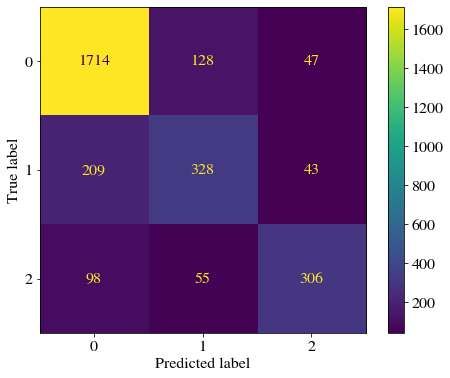

In [92]:
plot_confusion_matrix(estimator=best_model2,
    X = X_test,
    y_true= y_test_XGB)

### Análisis de búsqueda de hiperparámetros

In [94]:
optuna.visualization.is_available()

True

In [96]:
optuna.visualization.plot_optimization_history(study, target_name="F1-score")

In [99]:
optuna.visualization.plot_param_importances(study, target_name="F1-score")

## 6.2 Modelo preentrenado de Textblob

In [76]:
from textblob import TextBlob

In [39]:
X_train, X_test, y_train,y_test = train_test_split(tweets['cleaning_tweets_2'] ,
                                                   tweets['airline_sentiment_number'],
                                                   test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((11712,), (11712,), (2928,), (2928,))

In [79]:
for idx in range(20):
    polarity = TextBlob(X_train.iloc[idx]).polarity
    print("--",X_train.iloc[idx],polarity, round(polarity) )

-- you be offer we room for people 0.0 0
-- jfk nyc staff be amazing the jetblue send an email with detail but it be disappointing experience 5.551115123125783e-17 0
-- well the last update be in the right direction at least ll keep my finger cross -0.0035714285714285726 0
-- flight still sit at dfw wait for baggage to be load 0.0 0
-- be your companion pass break today purchase error invalid loyalty member account status a 0.0 0
-- push hour on hold priceless 1.0 1
-- have be try to reach your customer service for two day have receive zero response never travel aa again 0.0 0
-- if you can out today would be great it our honeymoon and this delay you have put damper on iy 0.8 1
-- have be call you for straight day and no one pick up sure there be storm but there be also holler 0.35 0
-- what go on at have be sit at the gate for 0.0 0
-- delay be understandable but look at the time of the the flight and boarding time weird -0.5 0
-- not cool at the gate turn out my flight from fll to ja

In [83]:
predictions_train = [round(TextBlob(X_train.iloc[idx]).polarity) for idx in range(len(X_train))]
predictions_test = [round(TextBlob(X_test.iloc[idx]).polarity) for idx in range(len(X_test))]

In [85]:
predictions_train[:10], predictions_test[:10]

([0, 0, 0, 0, 0, 1, 0, 1, 0, 0], [0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [5]:
round(-0.5)

0

In [88]:
y_train = y_train.values
y_test = y_test.values

In [96]:
print("accuracy in train set: ",accuracy_score(y_train, predictions_train))
print("accuracy in test set: ",accuracy_score(y_test, predictions_test))
print("\n")

print("F1 in train set: ",f1_score(y_train, predictions_train, average='macro'))
print("F1 in test set: ",f1_score(y_test, predictions_test, average='macro'))

print(classification_report(y_test, predictions_test))

accuracy in train set:  0.2667349726775956
accuracy in test set:  0.25136612021857924


F1 in train set:  0.25797568550350575
F1 in test set:  0.24405365948976263
              precision    recall  f1-score   support

          -1       0.94      0.05      0.09      1889
           0       0.21      0.94      0.34       580
           1       0.51      0.21      0.30       459

    accuracy                           0.25      2928
   macro avg       0.55      0.40      0.24      2928
weighted avg       0.73      0.25      0.17      2928



Los resultados usando **TextBlob** están bastante lejos de lo realizar una clasificación del sentimiento de los tweets:


- Negativos: de los tweets que predice como negativos, el 94% de ellos lo son pero de todos los tweets negativos existentes sólo clasifica el 5% de ellos


- Neutros: de los tweets que predice como neutros, solo  el 21% de ellos lo son pero de todos los tweets neutros existentes clasifica de manera correcta el 94% de ellos


- Positivos: de los tweets que predice como positivos, el 51% de ellos lo son pero de todos los tweets positivos existentes sólo clasifica el 21% de ellos

## 6.3 Modelo preentrenado de Spacy-Textblob

In [114]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

In [119]:
def sentiment_spacytextblob(text):
    doc = nlp(text)
    return round(doc._.blob.polarity)


In [120]:
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'
sentiment_spacytextblob(text)                  

0

In [121]:
predictions_train = [sentiment_spacytextblob(X_train.iloc[idx]) for idx in range(len(X_train))]
predictions_test =  [sentiment_spacytextblob(X_train.iloc[idx]) for idx in range(len(X_test))]

In [122]:
print("accuracy in train set: ",accuracy_score(y_train, predictions_train))
print("accuracy in test set: ",accuracy_score(y_test, predictions_test))
print("\n")

print("F1 in train set: ",f1_score(y_train, predictions_train, average='macro'))
print("F1 in test set: ",f1_score(y_test, predictions_test, average='macro'))

print(classification_report(y_test, predictions_test))

accuracy in train set:  0.2667349726775956
accuracy in test set:  0.2062841530054645


F1 in train set:  0.25797568550350575
F1 in test set:  0.15590560582362598
              precision    recall  f1-score   support

          -1       0.65      0.03      0.05      1889
           0       0.20      0.90      0.32       580
           1       0.15      0.07      0.09       459

    accuracy                           0.21      2928
   macro avg       0.33      0.33      0.16      2928
weighted avg       0.48      0.21      0.11      2928



Los resultados usando **SpacyTextBlob** están bastante lejos de lo realizar una clasificación del sentimiento de los tweets:


- Negativos: de los tweets que predice como negativos, el 64% de ellos lo son pero de todos los tweets negativos existentes sólo clasifica el 3% de ellos


- Neutros: de los tweets que predice como neutros, solo  el 20% de ellos lo son pero de todos los tweets neutros existentes clasifica de manera correcta el 90% de ellos


- Positivos: de los tweets que predice como positivos, el 15% de ellos lo son pero de todos los tweets positivos existentes sólo clasifica el 7% de ellos

## 6.4 Modelo preentrenado de Vader 


In [127]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [133]:
def sentiment_vader(text):
    analyzer = SentimentIntensityAnalyzer()
    vs = analyzer.polarity_scores(sentence)
    return round(vs[max(vs)])

sentence = "The food was great!" 
sentiment_vader(sentence)

1

In [134]:
predictions_train = [sentiment_vader(X_train.iloc[idx]) for idx in range(len(X_train))]
predictions_test =  [sentiment_vader(X_train.iloc[idx]) for idx in range(len(X_test))]

In [135]:
print("accuracy in train set: ",accuracy_score(y_train, predictions_train))
print("accuracy in test set: ",accuracy_score(y_test, predictions_test))
print("\n")

print("F1 in train set: ",f1_score(y_train, predictions_train, average='macro'))
print("F1 in test set: ",f1_score(y_test, predictions_test, average='macro'))

print(classification_report(y_test, predictions_test))

accuracy in train set:  0.16256830601092895
accuracy in test set:  0.1567622950819672


F1 in train set:  0.09322365844104974
F1 in test set:  0.09034543844109832
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      1889
           0       0.00      0.00      0.00       580
           1       0.16      1.00      0.27       459

    accuracy                           0.16      2928
   macro avg       0.05      0.33      0.09      2928
weighted avg       0.02      0.16      0.04      2928



C:\Users\nico0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nico0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nico0\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Vader** clasificó todos los tweets como positivos, esta es la razón de tener un recall de 1.00 i.e de todos los tweets positivos, clasificó el 100% de ellos como positivos, pero de los clasificados como positivos, solo el 16% de ellos lo eran.

## 6.5 Modelo preentrenado de la nube Azure

In [71]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [15]:
language_key = '3b6fe5bd676b41f085f210d3bcf5cabc'
language_endpoint = 'https://nicolastextsentiment.cognitiveservices.azure.com/'

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

In [16]:
# Authenticate the client using your key and endpoint 
def authenticate_client():
    ta_credential = AzureKeyCredential(language_key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=language_endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [36]:
def sentiment_number(sentiment):
    if sentiment=='positive':
        return 1
    elif sentiment=='neutral':
        return 0
    else:
        return -1

def sentiment_calculation(doc_result, idx):
    
    '''
    Esta función recibe un objeto de Azure 
    y retorna la clasificación de sentimiento
    con mayor puntaje
    '''
    positive = doc_result[idx].confidence_scores.positive
    neutral =  doc_result[idx].confidence_scores.neutral
    negative = doc_result[idx].confidence_scores.negative
    
    sentiments = {'positive':positive,'neutral':neutral,'negative':negative}
    
    max_sentiment_value = sentiment_number(max(sentiments, key = sentiments.get)) 
    
    return sentiment_number(max(sentiments, key = sentiments.get)) 

In [49]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(tweets, test_size=0.2, random_state=42)

In [80]:
sentiment_true_values = tweets['airline_sentiment_number'].values

In [56]:
allCleanedTweets = list(tweets['cleaning_tweets_2'])
allCleanedTweets[:10]

['what say',
 'plus you have add commercial to the experience tacky',
 'do not today must mean need to take another trip',
 'it really aggressive to blast obnoxious entertainment in your guest face amp they have little recourse',
 'and it really big bad thing about it',
 'seriously would pay flight for seat that do not have this play it really the only bad thing about fly va',
 'yes nearly every time fly vx this ear worm won go away',
 'really miss prime opportunity for man without hat parody there',
 'well do not but now do',
 'it be amazing and arrive an hour early you re too good to I']

In [57]:
len(allCleanedTweets)

14640

In [68]:
sentiments = []


#Se cargan tweets de 10 en 10 a la nube de Azure
#puesto que es más económico computacionalmente
#hacer las peticiones por bloques a una a una

for i in range(0,len(allCleanedTweets),10):
    result = client.analyze_sentiment(AllCleanedTweets[i:i+10], show_opinion_mining=True)
    #result es el objeto que Azure prepara para realizar la clasificación
    
    doc_result = [doc for doc in result if not doc.is_error] 
    
    for j in range(len(doc_result)):
        sentiments.append(sentiment_calculation(doc_result, idx=j))


HttpResponseError: (403) Out of call volume quota for TextAnalytics F0 pricing tier. Please retry after 27 days. To increase your call volume switch to a paid tier.
Code: 403
Message: Out of call volume quota for TextAnalytics F0 pricing tier. Please retry after 27 days. To increase your call volume switch to a paid tier.

In [99]:
len(sentiments),len(sentiments)/len(sentiment_true_values)

(3956, 0.27021857923497267)

### Se ha alcanzado el límite de llamadas de Microsoft Azure, de tal manera que sólo se logró alcanzar a clasificiar 3956 datos, es decir  el 27%.

### Solo se alcanzó a clasificar los datos de train, sin embargo, como esto es un modelo pre-entrenado, se espera que la clasificación en el conjunto de test sea muy similar

In [81]:
print("accuracy in train set: ",accuracy_score(sentiment_true_values[:len(sentiments)], sentiments))
#print("accuracy in test set: ",accuracy_score(y_test, predictions_test))
#print("\n")

print("F1 in train set: ",f1_score(sentiment_true_values[:len(sentiments)], sentiments, average='macro'))
#print("F1 in test set: ",f1_score(y_test, predictions_test, average='macro'))


accuracy in train set:  0.4368048533872599
F1 in train set:  0.3984714423821483


In [98]:
print(classification_report(sentiment_true_values[:len(sentiments)], 
                      sentiments))

              precision    recall  f1-score   support

          -1       0.74      0.43      0.54      2564
           0       0.25      0.43      0.32       796
           1       0.26      0.48      0.33       596

    accuracy                           0.44      3956
   macro avg       0.42      0.45      0.40      3956
weighted avg       0.57      0.44      0.47      3956



Los resultados usando **Microsoft Azure** si bien son los terceros mejores resultados, no son resultados satisfactorios


- Negativos: de los tweets que predice como negativos, el 74% de ellos lo son pero de todos los tweets negativos existentes sólo clasifica el 43% de ellos


- Neutros: de los tweets que predice como neutros, solo  el 25% de ellos lo son y de los tweets neutros existentes clasifica de manera correcta el 43% de ellos


- Positivos: de los tweets que predice como positivos, el 26% de ellos lo son y de todos los tweets positivos existentes sólo clasifica correctamente el 48% de ellos

In [92]:
data_for_confusion_matrix = {'y_actual': sentiment_true_values[:len(sentiments)],
        'y_predicted':sentiments
        }

df = pd.DataFrame(data_for_confusion_matrix)
confusion_matrix = pd.crosstab(df['y_actual'], df['y_predicted'],
                               rownames=['Actual'], colnames=['Predicted'],
                              margins=True)

In [94]:
confusion_matrix

Predicted    -1     0     1   All
Actual                           
-1         1100   861   603  2564
0           233   344   219   796
1           150   162   284   596
All        1483  1367  1106  3956

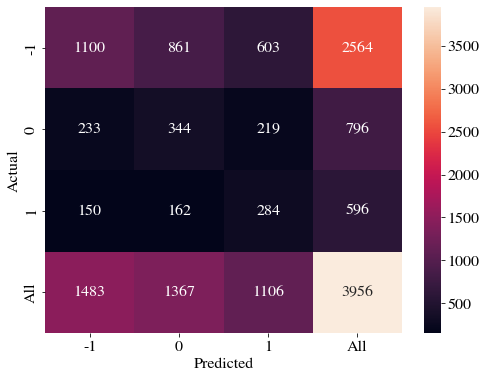

In [95]:
sns.heatmap(confusion_matrix, annot=True, fmt = 'd')
plt.show()

In [100]:
import pickle

In [101]:
with open("sentiments_azure", "wb") as fp:   #Pickling
    pickle.dump(sentiments, fp)

In [106]:
with open("sentiments_azure", "rb") as fp:   # Unpickling
    sentiments_loaded = pickle.load(fp)

In [107]:
sentiments_loaded == sentiments

True

## 7. Conclusiones



| Modelo          | Accuracy train | Accuracy test | F1 score train | F1 score test  |
| :-              | :-:            | :-:           | :-:            |  :-:           |
|XGBoost          | 0.930          | 0.801         |    0.903       | 0.731          |
|Random Forest    | 0.983          | 0.773         |    0.977       | 0.685          |
|Microsoft Azure  | 0.436          | ---           |    0.400       | ---            |
|TextBlob         | 0.267          | 0.251         |    0.258       | 0.244          |
|Spacy            | 0.267          | 0.206         |    0.258       | 0.156          |
|Vader            | 0.162          | 0.157         |    0.093       | 0.0903         |


El mejor modelo para la clasificación de sentimientos de los tweets es el XGBoost classifier debido a su valor de F1 en el  conjunto de test

## 8. Mejoras y perspectivas futuras


- Entrenar con el Corpus largo de Spacy

- Convertir Emojis a palabras y procesarlos

- cross validation de los datos para obtener resultados más robustos

### 8.1 Propuesta para conversión de emojis a texto

In [134]:
import emoji

In [135]:
text = "game is on 🔥 🔥"
emoji.demojize(text, delimiters=("", ""))  # 'game is on fire fire'

'game is on fire fire'

In [158]:
emoji.demojize(tweets.iloc[18]['text'], delimiters=("", ""))

'I red_heart flying @VirginAmerica. smiling_facethumbs_up'